In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import numbers
from datetime import datetime

from scipy.stats import norm
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from xgboost import plot_importance


pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)



plt.rcParams['figure.figsize'] = [10, 5]

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


train.head(50).reservation_id[0]
#test.head(25)

'07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152'

In [6]:
train['is_train'] = 1
test['is_train'] = 0



combined_df = pd.concat([train.drop('amount_spent_per_room_night_scaled', axis=1), test])
combined_df

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,is_train
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,1
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,1
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,1
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01/12/15,12/01/16,13/01/16,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,1
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20/01/16,20/01/16,21/01/16,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,1
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22/08/16,20/10/16,25/10/16,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,1
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10/09/16,18/09/16,24/09/16,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,1
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03/08/16,21/11/16,24/11/16,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1


In [7]:
train.describe(include='all')

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,is_train
count,341424,341424,341424,341424,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424,341424.000000,341424,341424,341424,341424,341424.000000,341424.0
unique,341424,1621,1532,1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,101327,6,4,32,NaN,NaN
top,416121faee21482f1d7dc3346d3e7e423e56fadfc38d61...,02/09/16,08/10/16,21/10/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,NaN,NaN
freq,1,1353,460,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67618,NaN,50,120623,312481,35331,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,NaN,1.124209,NaN,NaN,NaN,NaN,7.720801,1.0
std,NaN,NaN,NaN,NaN,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,NaN,0.329821,NaN,NaN,NaN,NaN,1.090109,0.0
min,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.600397,1.0
25%,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,7.187260,1.0
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,NaN,1.000000,NaN,NaN,NaN,NaN,7.860814,1.0
75%,NaN,NaN,NaN,NaN,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,NaN,8.419144,1.0


1. Room nights has a lower limit outlier of -45.
2. Resort Type code is probably the same as mentioned on Club Mahindra's site: Beach, City, Dessert, Hill Station, Himalayan, Jungle, Waterfront
3. 

# Univariate Analysis

In [8]:
all_features = combined_df.columns.drop(['reservation_id', 'memberid', 'booking_date', 'checkin_date', 'checkout_date', 'resort_id'])



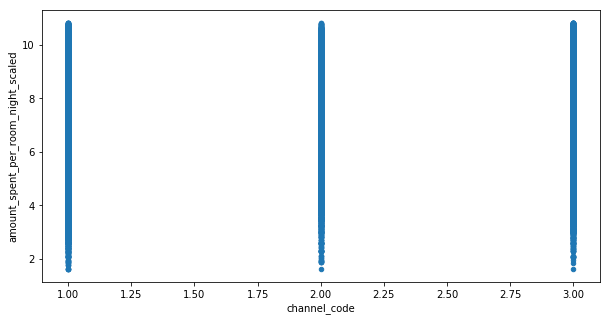

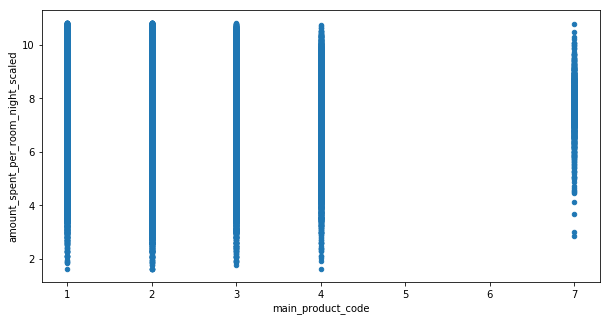

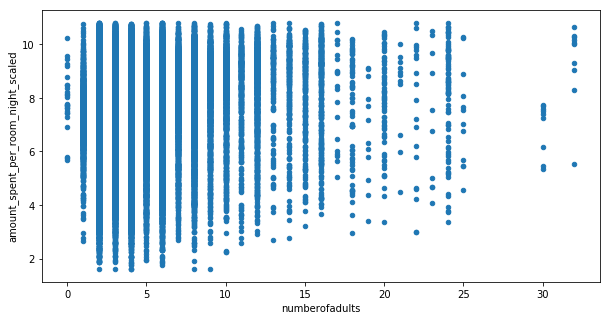

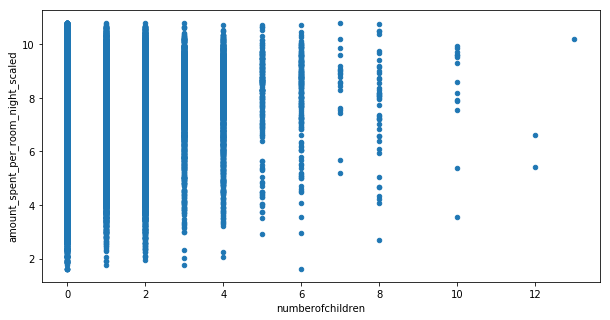

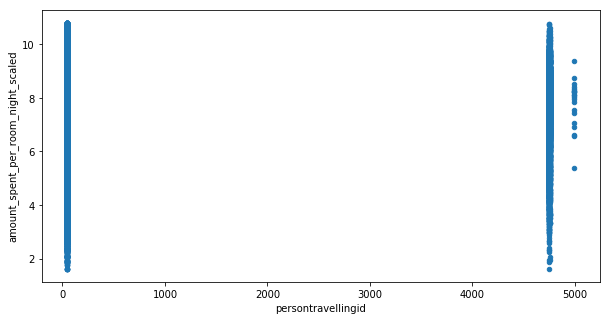

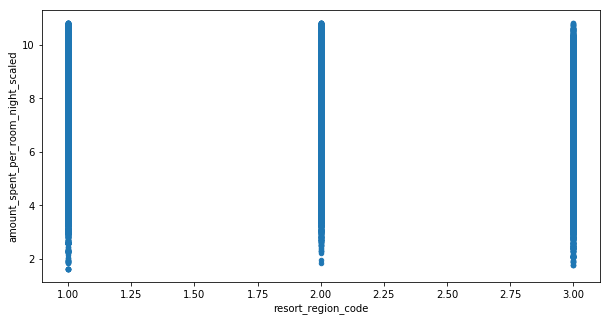

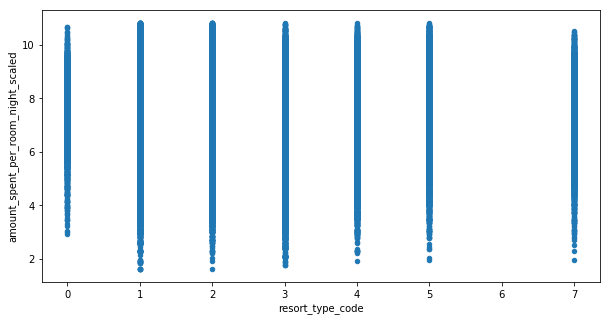

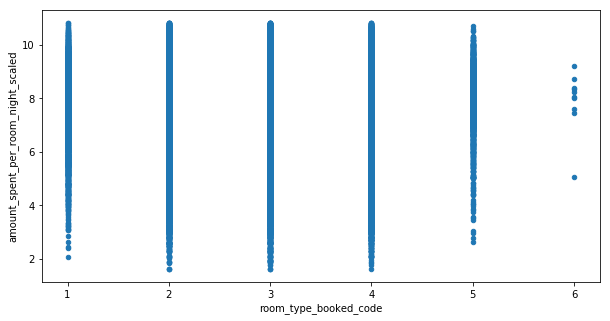

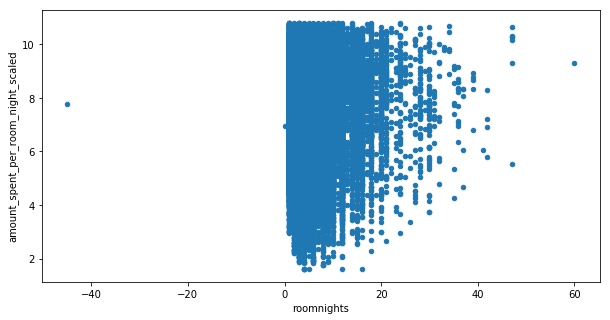

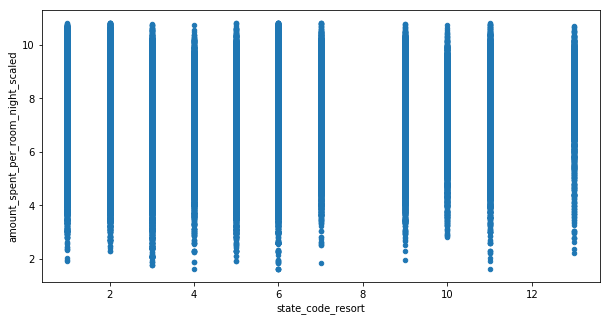

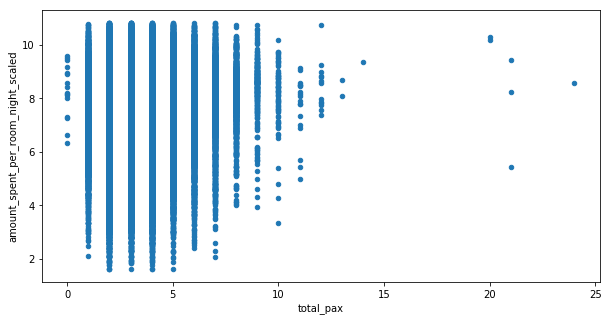

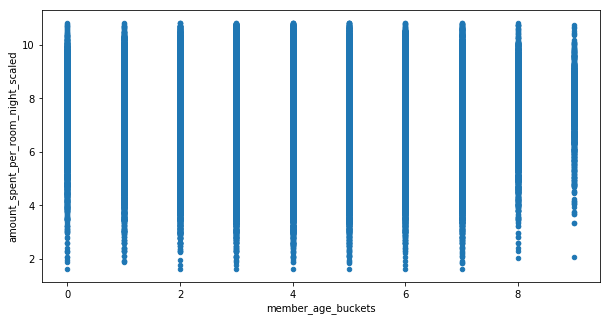

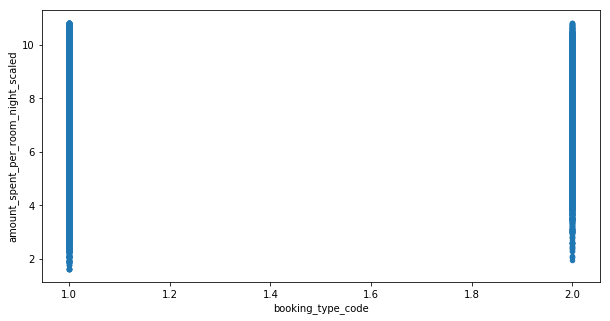

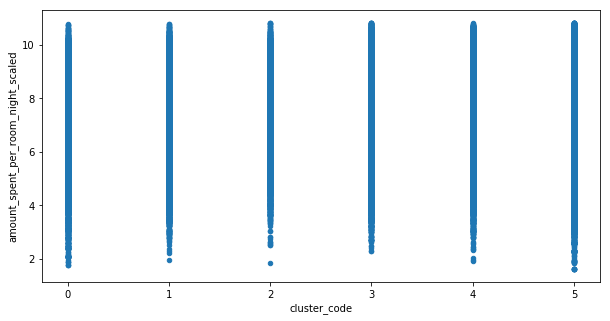

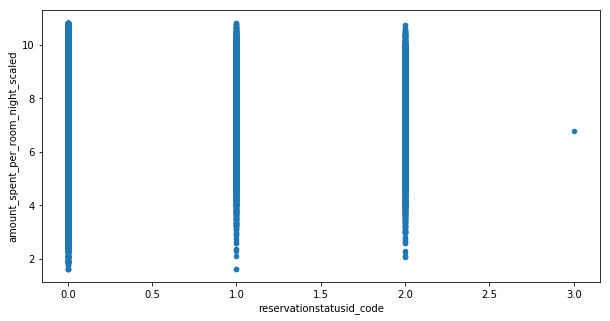

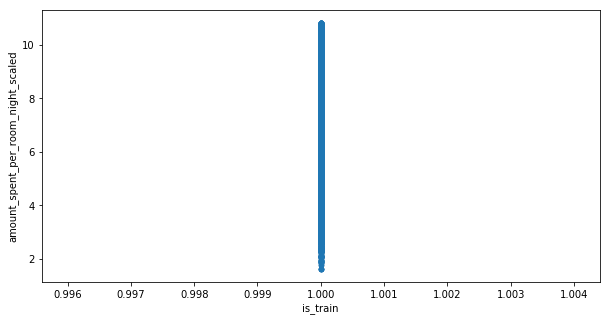

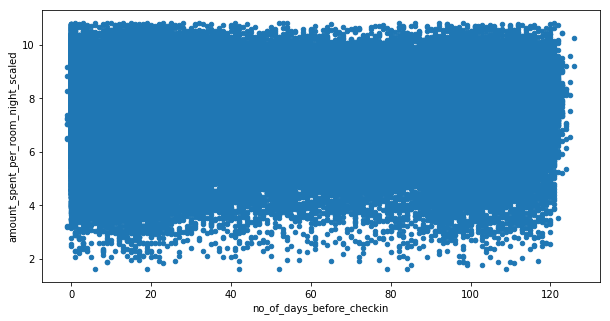

In [43]:
for feature in all_features:
    data = pd.concat([train[target], combined_df[combined_df.is_train == 1][feature]], axis=1)
    data.plot.scatter(x=feature, y=target);

In [44]:
for feature in all_features:
    data = pd.concat([train[target], combined_df[combined_df.is_train == 1][feature]], axis=1)
    fig = sns.boxplot(x=feature, y=target, data=data)

NameError: name 'c' is not defined

KeyError: 'season_holidayed_code'

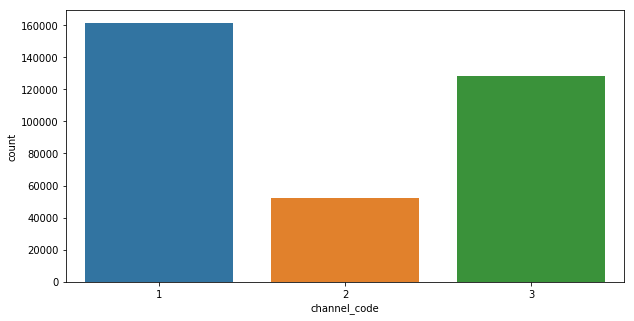

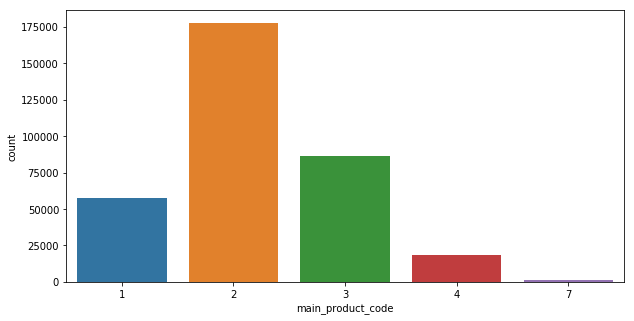

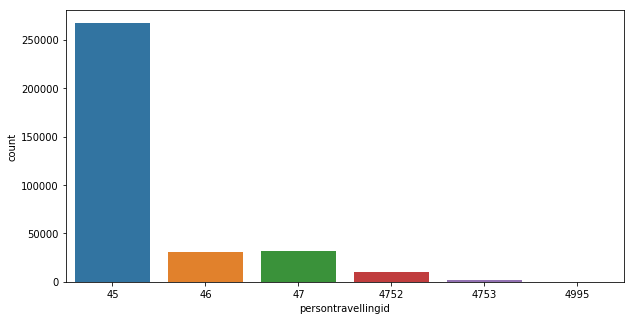

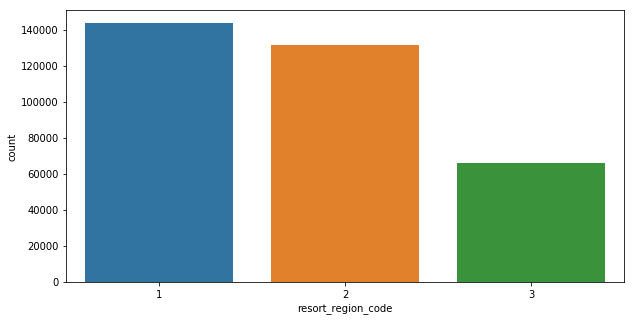

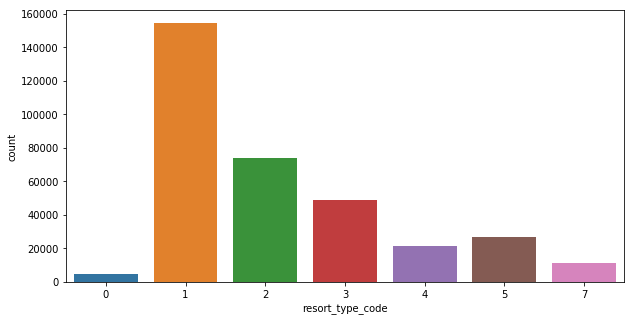

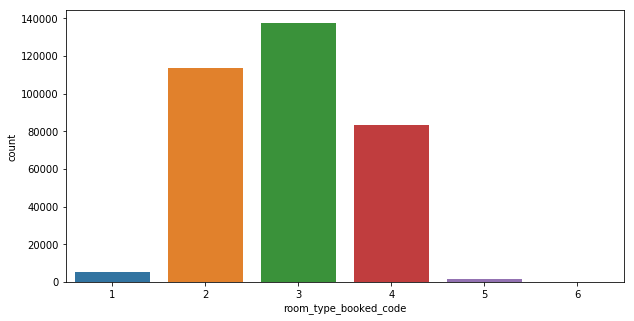

In [45]:
categorical_features = ['channel_code', 'main_product_code', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'season_holidayed_code', 'state_code_residence',
                        'member_age_buckets', 'booking_type_code','cluster_code', 'reservationstatusid_code']
i=1
for feature in categorical_features:
    plt.figure(i)
    sns.countplot(train[feature])
    i=i+1

In [6]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'is_train'],
      dtype='object')

## Feature Engineering

### no_of_days_before_checkin

In [9]:

def get_datetime(date):
    parsed_date = datetime.strptime(date, '%d/%m/%y')
    
    if ((parsed_date - datetime.now()) > timedelta(days=0)):
        parsed_date = parsed_date.replace(year=(parsed_date.year -100))
        
        
    return parsed_date

combined_df['booking_date'] = combined_df['booking_date'].apply(get_datetime)

combined_df['checkin_date'] = combined_df['checkin_date'].apply(get_datetime)


combined_df['no_of_days_before_checkin'] = (combined_df['checkin_date'] - combined_df['booking_date']).dt.days
combined_df['no_of_days_before_checkin'].describe()

count    488189.000000
mean         46.119677
std          38.693097
min       -2219.000000
25%          15.000000
50%          33.000000
75%          82.000000
max         177.000000
Name: no_of_days_before_checkin, dtype: float64

Surprisingly some values are negative, that is the chekin date is before the date of booking. These can be artificial data points. Checking.

In [10]:
combined_df.dtypes

combined_df[combined_df['no_of_days_before_checkin'] < 0]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,is_train,no_of_days_before_checkin
15,821a5e5313029b1bbec6ec738a1b34d6d14c82fca97c47...,2018-04-05,2012-03-08,11/03/12,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,7b68caeb153ac83aeab0b9a679709c558d57a6c9d2bdf6...,F,C,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,1,-2219
34,a80d2fbea1195021307a13a44642855c60f46145dcf29c...,2018-03-31,2012-03-12,18/03/12,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,d4eee99d5c3238cdda52479fb34125e15208d394af34e7...,E,C,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,-2210
60,51fe7242f55c79aacb499f957c746445ccb51de3c8d206...,2018-04-05,2012-03-24,25/03/12,3,2,2,0,45,3,3,3,1,2.0,6.0,3,4,I,1,a24896d1582d8b6c0de997d8b7435962e33580ba80839d...,A,C,f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a81433...,1,-2203
79,548605b68da37dd5c8555a37650910ce9f110e793b4619...,2018-04-05,2012-03-21,25/03/12,1,3,3,1,45,3,3,2,6,2.0,4.0,5,3,E,1,3bb1aa01c771c2217fe08bae162569a3177da7d09ae6be...,F,A,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,1,-2206
81,3ac8796577c899cd0177b6f9638515e4feab55d8a72b8b...,2018-04-05,2012-03-23,26/03/12,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,fa856d4dde8f88ed2855a74e2468cedd802ee253434a6c...,E,C,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,1,-2204
113,4d73a3304416c4bff78b47c6b307a07568d7286d946e3e...,2018-04-06,2012-04-09,11/04/12,1,2,3,1,45,1,2,2,4,3.0,1.0,11,6,D,1,c2eaeada5db1e75552e54382c408fe1c600679060b052c...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,1,-2188
116,8e7c40db97f7088ea2249bb9da85b1cfce31c8b537dcfa...,2018-04-06,2012-04-14,15/04/12,1,3,4,0,45,1,2,2,2,3.0,1.0,11,4,G,1,48a9cdd22b472fe4aa225acd45acdbe246de12fade4a59...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,1,-2183
129,085264337c2af42038a81b4ec4d9e278d9699e5662d404...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,-2178
130,7294817a3becfb22650a6e4cf0dd7d2a3a1a3969e1e01d...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,-2178
147,e36df886dd8222cad63291754719419d5ff50b44e525e0...,2018-04-06,2012-04-22,26/04/12,3,3,4,0,45,1,1,3,1,3.0,9.0,6,3,B,2,0beacf60d9f72cdfe3f4b8f1f439c605b9bc37ca3a3922...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,1,-2175


Looks like booking_date for the above reservations was not available and has been artificially imputed. Imputing these values with a -1

In [11]:
combined_df['no_of_days_before_checkin'] = combined_df['no_of_days_before_checkin'].clip(-1, 177)
combined_df[combined_df['no_of_days_before_checkin'] < 0]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,is_train,no_of_days_before_checkin
15,821a5e5313029b1bbec6ec738a1b34d6d14c82fca97c47...,2018-04-05,2012-03-08,11/03/12,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,7b68caeb153ac83aeab0b9a679709c558d57a6c9d2bdf6...,F,C,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,1,-1
34,a80d2fbea1195021307a13a44642855c60f46145dcf29c...,2018-03-31,2012-03-12,18/03/12,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,d4eee99d5c3238cdda52479fb34125e15208d394af34e7...,E,C,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,-1
60,51fe7242f55c79aacb499f957c746445ccb51de3c8d206...,2018-04-05,2012-03-24,25/03/12,3,2,2,0,45,3,3,3,1,2.0,6.0,3,4,I,1,a24896d1582d8b6c0de997d8b7435962e33580ba80839d...,A,C,f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a81433...,1,-1
79,548605b68da37dd5c8555a37650910ce9f110e793b4619...,2018-04-05,2012-03-21,25/03/12,1,3,3,1,45,3,3,2,6,2.0,4.0,5,3,E,1,3bb1aa01c771c2217fe08bae162569a3177da7d09ae6be...,F,A,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,1,-1
81,3ac8796577c899cd0177b6f9638515e4feab55d8a72b8b...,2018-04-05,2012-03-23,26/03/12,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,fa856d4dde8f88ed2855a74e2468cedd802ee253434a6c...,E,C,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,1,-1
113,4d73a3304416c4bff78b47c6b307a07568d7286d946e3e...,2018-04-06,2012-04-09,11/04/12,1,2,3,1,45,1,2,2,4,3.0,1.0,11,6,D,1,c2eaeada5db1e75552e54382c408fe1c600679060b052c...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,1,-1
116,8e7c40db97f7088ea2249bb9da85b1cfce31c8b537dcfa...,2018-04-06,2012-04-14,15/04/12,1,3,4,0,45,1,2,2,2,3.0,1.0,11,4,G,1,48a9cdd22b472fe4aa225acd45acdbe246de12fade4a59...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,1,-1
129,085264337c2af42038a81b4ec4d9e278d9699e5662d404...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,-1
130,7294817a3becfb22650a6e4cf0dd7d2a3a1a3969e1e01d...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,-1
147,e36df886dd8222cad63291754719419d5ff50b44e525e0...,2018-04-06,2012-04-22,26/04/12,3,3,4,0,45,1,1,3,1,3.0,9.0,6,3,B,2,0beacf60d9f72cdfe3f4b8f1f439c605b9bc37ca3a3922...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,1,-1


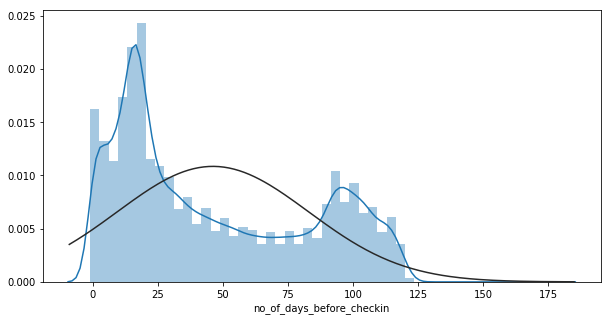

In [12]:
sns.distplot(combined_df['no_of_days_before_checkin'], fit=norm);
fig = plt.figure()

In [14]:
#dropping date features for analysis will add later

all_features = combined_df.columns.drop(['reservation_id', 'memberid', 'booking_date', 'checkin_date', 'checkout_date', 'resort_id'])

target = 'amount_spent_per_room_night_scaled'
combined_df[all_features].dtypes



channel_code                   int64
main_product_code              int64
numberofadults                 int64
numberofchildren               int64
persontravellingid             int64
resort_region_code             int64
resort_type_code               int64
room_type_booked_code          int64
roomnights                     int64
season_holidayed_code        float64
state_code_residence         float64
state_code_resort              int64
total_pax                      int64
member_age_buckets            object
booking_type_code              int64
cluster_code                  object
reservationstatusid_code      object
is_train                       int64
no_of_days_before_checkin      int64
dtype: object

In [15]:
#Label encoding categorical features
categorical_features = ['member_age_buckets', 'cluster_code', 'reservationstatusid_code']


for cat_feature in categorical_features:
    label_enc = LabelEncoder()
    combined_df[cat_feature] = label_enc.fit_transform(combined_df[cat_feature])
        

        
combined_df[all_features].dtypes

channel_code                   int64
main_product_code              int64
numberofadults                 int64
numberofchildren               int64
persontravellingid             int64
resort_region_code             int64
resort_type_code               int64
room_type_booked_code          int64
roomnights                     int64
season_holidayed_code        float64
state_code_residence         float64
state_code_resort              int64
total_pax                      int64
member_age_buckets             int64
booking_type_code              int64
cluster_code                   int64
reservationstatusid_code       int64
is_train                       int64
no_of_days_before_checkin      int64
dtype: object

### Bivariate Analysis

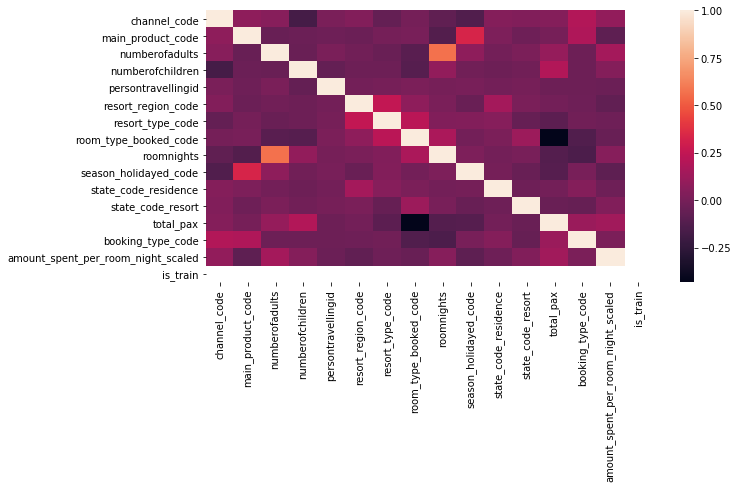

In [161]:
corrmat = train.corr()
sns.heatmap(corrmat);

## Missing Data

In [16]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
state_code_residence,4764,0.013953
season_holidayed_code,114,0.000334
is_train,0,0.000000
resort_type_code,0,0.000000
booking_date,0,0.000000
checkin_date,0,0.000000
checkout_date,0,0.000000
channel_code,0,0.000000
main_product_code,0,0.000000
numberofadults,0,0.000000


In [17]:
#only state_code_residence and season_holidayed_code have missing values dropping them for a baseline model

#analyzing complete dataframe now

total = combined_df.isnull().sum().sort_values(ascending=False)
percent = (combined_df.isnull().sum()/combined_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
state_code_residence,7024,0.014388
season_holidayed_code,149,0.000305
no_of_days_before_checkin,0,0.000000
resort_type_code,0,0.000000
booking_date,0,0.000000
checkin_date,0,0.000000
checkout_date,0,0.000000
channel_code,0,0.000000
main_product_code,0,0.000000
numberofadults,0,0.000000


8.0

In [18]:
#combined_df = combined_df.drop(['state_code_residence', 'season_holidayed_code'], axis =1)

combined_df['state_code_residence'].fillna(combined_df['state_code_residence'].mode()[0], inplace=True)
combined_df['season_holidayed_code'].fillna(combined_df['season_holidayed_code'].mode()[0], inplace=True)

total = combined_df.isnull().sum().sort_values(ascending=False)
percent = (combined_df.isnull().sum()/combined_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
no_of_days_before_checkin,0,0.0
room_type_booked_code,0,0.0
booking_date,0,0.0
checkin_date,0,0.0
checkout_date,0,0.0
channel_code,0,0.0
main_product_code,0,0.0
numberofadults,0,0.0
numberofchildren,0,0.0
persontravellingid,0,0.0


In [19]:
combined_df[all_features].dtypes

channel_code                   int64
main_product_code              int64
numberofadults                 int64
numberofchildren               int64
persontravellingid             int64
resort_region_code             int64
resort_type_code               int64
room_type_booked_code          int64
roomnights                     int64
season_holidayed_code        float64
state_code_residence         float64
state_code_resort              int64
total_pax                      int64
member_age_buckets             int64
booking_type_code              int64
cluster_code                   int64
reservationstatusid_code       int64
is_train                       int64
no_of_days_before_checkin      int64
dtype: object

In [37]:
#Label encoding categorical features
categorical_features = ['member_age_buckets', 'cluster_code', 'reservationstatusid_code']


for cat_feature in categorical_features:
    label_enc = LabelEncoder()
    combined_df[cat_feature] = label_enc.fit_transform(combined_df[cat_feature])
        

combined_df[all_features].dtypes

channel_code                 int64
main_product_code            int64
numberofadults               int64
numberofchildren             int64
persontravellingid           int64
resort_region_code           int64
resort_type_code             int64
room_type_booked_code        int64
roomnights                   int64
state_code_resort            int64
total_pax                    int64
member_age_buckets           int64
booking_type_code            int64
cluster_code                 int64
reservationstatusid_code     int64
is_train                     int64
no_of_days_before_checkin    int64
dtype: object

## Validation split

In [20]:
train = combined_df [ combined_df['is_train'] == 1][all_features].drop('is_train', axis=1)
test = combined_df [ combined_df['is_train'] == 0][all_features].drop('is_train', axis=1)


#train.dtypes
train['amount_spent_per_room_night_scaled']  = pd.read_csv('train.csv')['amount_spent_per_room_night_scaled']
test['reservation_id'] = pd.read_csv('test.csv')['reservation_id']
train

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,no_of_days_before_checkin,amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,5,2,0,7.706428
1,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,5,0,78,6.662563
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,4,0,4,7.871602
3,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,3,0,40,5.344943
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,3,0,103,7.059346
5,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,5,1,5,0,42,8.167707
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,5,1,1,0,0,6.449838
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,5,1,5,0,59,7.046172
8,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,5,1,1,0,8,5.394203
9,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,5,1,4,0,110,6.561412


In [21]:
kf = RepeatedKFold(n_splits=8, n_repeats=10, random_state=7) 

for train_index, valid_index in kf.split(train):
      X_train, X_valid = train.ix[train_index].drop('amount_spent_per_room_night_scaled', axis =1), train.ix[valid_index].drop('amount_spent_per_room_night_scaled', axis =1) 
      y_train, y_valid = train.ix[train_index, 'amount_spent_per_room_night_scaled'], train.ix[valid_index, 'amount_spent_per_room_night_scaled']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


## Modeling

In [257]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=7)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 5)

[0]	validation_0-rmse:6.58927	validation_1-rmse:6.584
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:5.94759	validation_1-rmse:5.94225
[2]	validation_0-rmse:5.3723	validation_1-rmse:5.36696
[3]	validation_0-rmse:4.85673	validation_1-rmse:4.85133
[4]	validation_0-rmse:4.39468	validation_1-rmse:4.38944
[5]	validation_0-rmse:3.98134	validation_1-rmse:3.97614
[6]	validation_0-rmse:3.61177	validation_1-rmse:3.60653
[7]	validation_0-rmse:3.28194	validation_1-rmse:3.27676
[8]	validation_0-rmse:2.98835	validation_1-rmse:2.98331
[9]	validation_0-rmse:2.72703	validation_1-rmse:2.72209
[10]	validation_0-rmse:2.49545	validation_1-rmse:2.49061
[11]	validation_0-rmse:2.29063	validation_1-rmse:2.28579
[12]	validation_0-rmse:2.11015	validation_1-rmse:2.10547
[13]	validation_0-rmse:1.95173	validation_1-rmse:1.94714
[14]	validation_0-rmse:1.81296	validation_1-rmse:1.80848


[141]	validation_0-rmse:1.00625	validation_1-rmse:1.01536
[142]	validation_0-rmse:1.00619	validation_1-rmse:1.01534
[143]	validation_0-rmse:1.00615	validation_1-rmse:1.01535
[144]	validation_0-rmse:1.00607	validation_1-rmse:1.01534
Stopping. Best iteration:
[139]	validation_0-rmse:1.00636	validation_1-rmse:1.01533



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=300, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=7, silent=True, subsample=0.8)

### Feature Importance

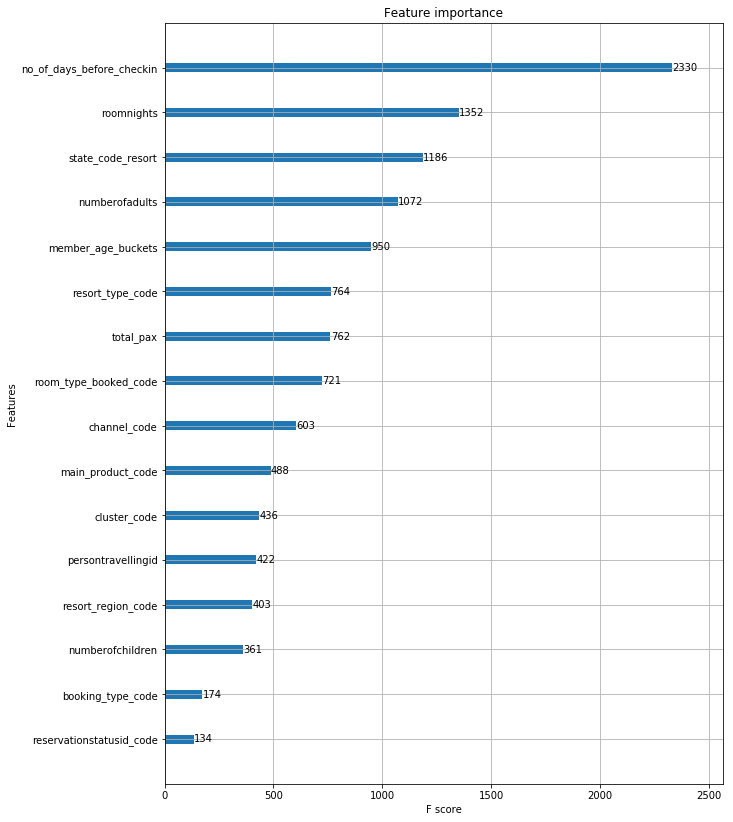

In [171]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

In [172]:
Y_test = model.predict(test.drop('reservation_id', axis =1))
Y_test

array([ 7.89490175,  7.48760986,  7.66816235, ...,  8.31729412,
        7.59237385,  7.03384352], dtype=float32)

In [173]:
Y_test = model.predict(test.drop('reservation_id', axis =1))


submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('Feature_engineering1_club_mahindra.csv', index=False)

In [108]:
test.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'state_code_resort', 'total_pax', 'member_age_buckets',
       'booking_type_code', 'cluster_code', 'reservationstatusid_code'],
      dtype='object')

## Hyper Parameter Tuning

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribut

ValueError: Invalid parameter rate_drop for estimator XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1). Check the list of available parameters with `estimator.get_params().keys()`.

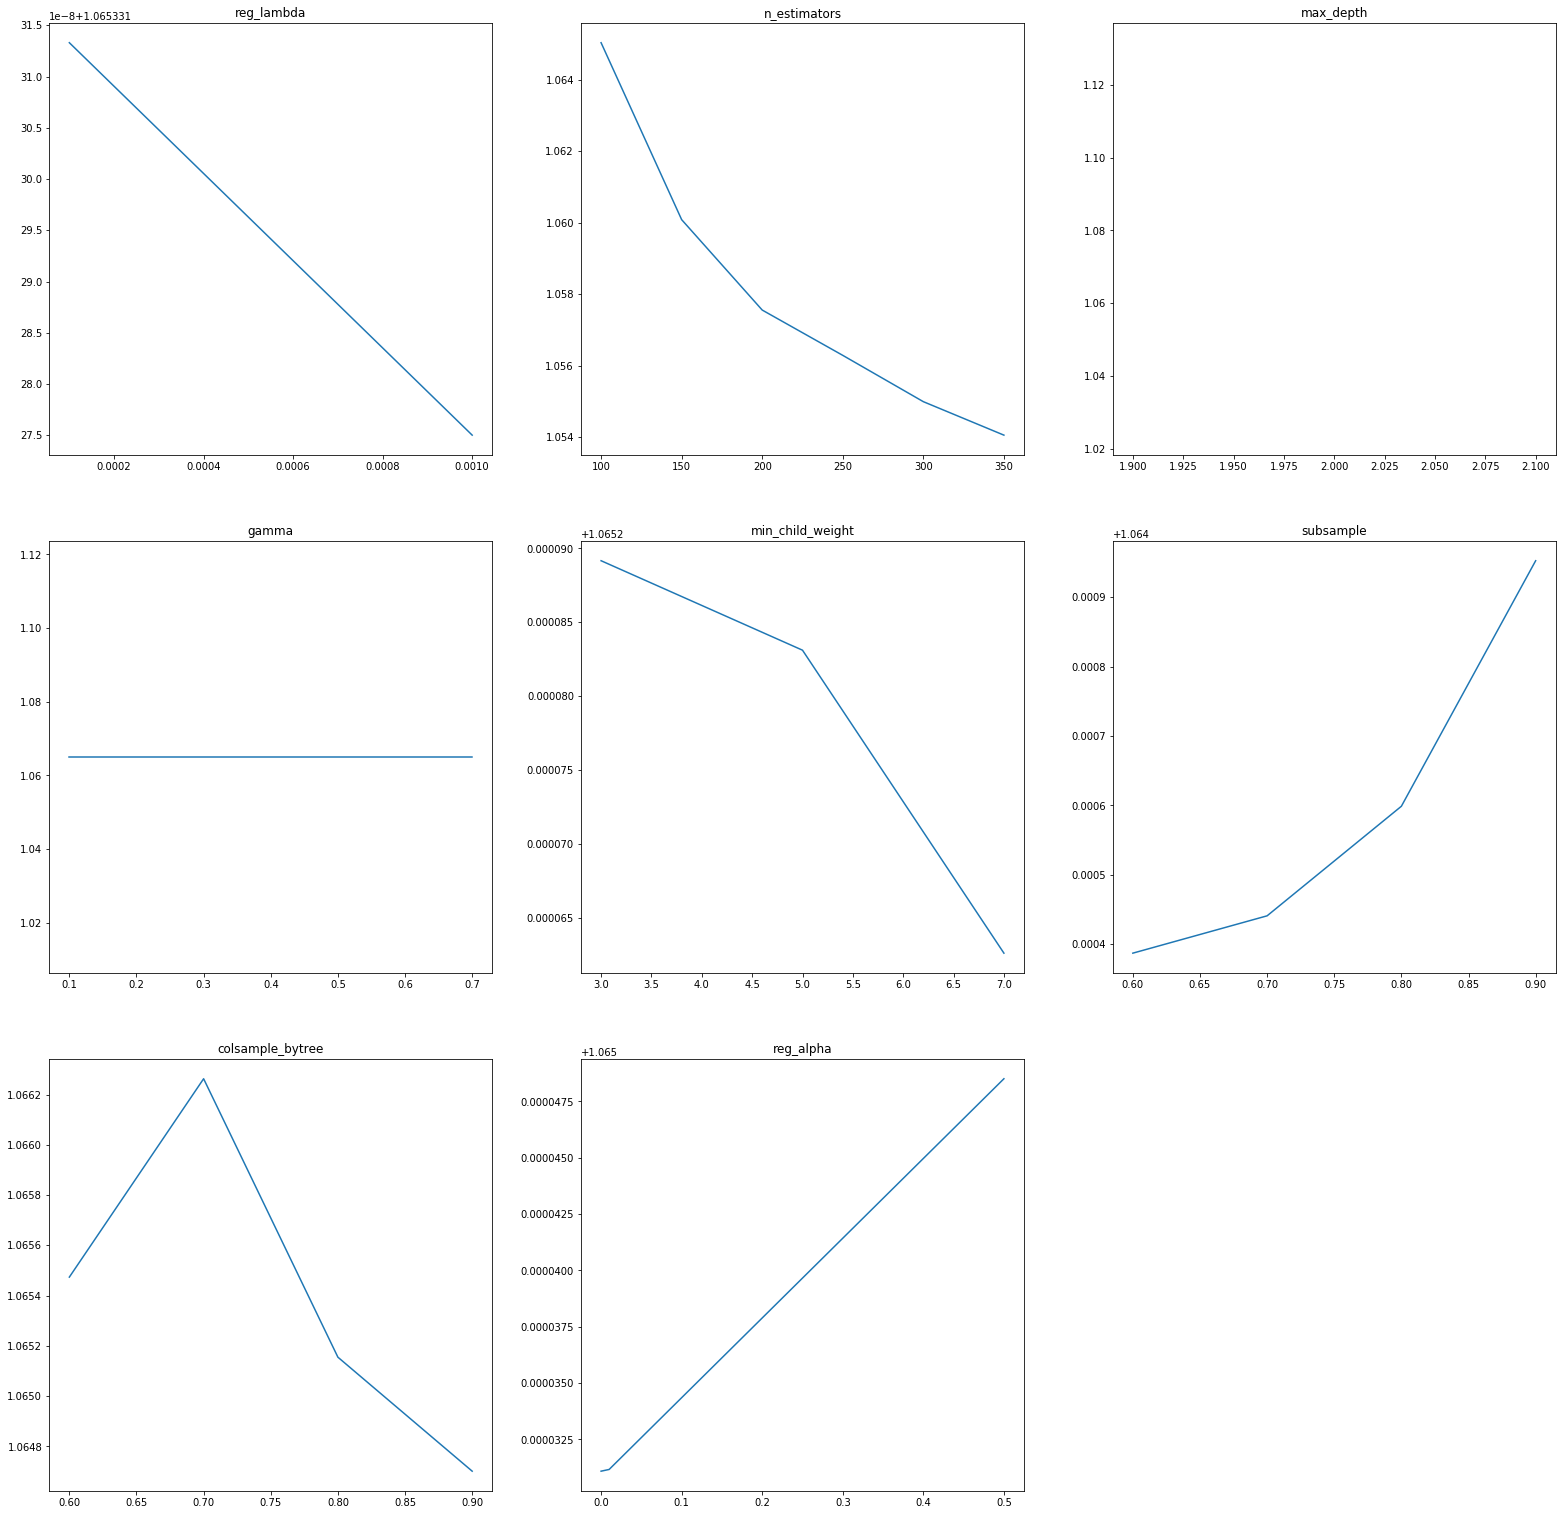

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer



# parameters and ranges to plot

param_grid = {
           
              #"eta": np.arange(0.01, 0.015, 0.05),
              "reg_lambda": [0.001, 0.01],
              "n_estimators": np.arange(2, 200, 100),
              "max_depth": np.arange(2, 3),
              
              "gamma": np.arange(0.1, 0.9, 0.3),
              "min_child_weight": np.arange(3, 7, 2),
              
              "subsample": np.arange(0.6, 0.9, 0.1),
              "colsample_bytree": np.arange(0.6, 0.9, 0.1),
              
              "reg_alpha": [0, 0.01, 0.5],
}

model_tuned = XGBRegressor(random_state=7)


def evaluate_param(parameter, num_range, index):
    c
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,3,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df



model_tuned = XGBRegressor(random_state=7)
index = 1
plt.figure(figsize=(27,27))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1


Drawing inspiration from the graphs above:

In [196]:
param_grid = {
              "learning_rate": [.03, 0.05, .07],
              "reg_lambda": [0.0001, 0.001],
              "n_estimators": np.arange(50, 300, 50),
              "max_depth": np.arange(6,9),
              
              
              "min_child_weight": np.arange(5, 9),
              
              "subsample": np.arange(0.3, 0.6, 0.1),
              "colsample_bytree": np.arange(0.3, 0.5, 0.1),
              
              "reg_alpha": [0, 0.01, 0.5],
              
}

Moving forward, fixing learning_rate to .03, and n_estimators to 300

In [197]:
#Tuning max_depth and min_child_weight

In [204]:
param_grid = {
              "learning_rate": [.03],
              "n_estimators": [300],
              "max_depth": np.arange(6,9),
              "min_child_weight": np.arange(5, 9),
}


fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[0]	validation_0-rmse:7.08819	validation_1-rmse:7.08307
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.87969	validation_1-rmse:6.87458
[2]	validation_0-rmse:6.6776	validation_1-rmse:6.67248
[3]	validation_0-rmse:6.48171	validation_1-rmse:6.47659
[4]	validation_0-rmse:6.29192	validation_1-rmse:6.28679
[5]	validation_0-rmse:6.10793	validation_1-rmse:6.10281
[6]	validation_0-rmse:5.92965	validation_1-rmse:5.9245
[7]	validation_0-rmse:5.75686	validation_1-rmse:5.75173
[8]	validation_0-rmse:5.58947	validation_1-rmse:5.58433
[9]	validation_0-rmse:5.42719	validation_1-rmse:5.42202
[10]	validation_0-rmse:5.27	validation_1-rmse:5.26481
[11]	validation_0-rmse:5.11766	validation_1-rmse:5.11247
[12]	validation_0-rmse:4.97013	validation_1-rmse:4.96492
[13]	validation_0-rmse:4.82719	validation_1-rmse:4.8219

[141]	validation_0-rmse:1.02624	validation_1-rmse:1.02711
[142]	validation_0-rmse:1.02596	validation_1-rmse:1.02687
[143]	validation_0-rmse:1.02569	validation_1-rmse:1.02663
[144]	validation_0-rmse:1.02543	validation_1-rmse:1.0264
[145]	validation_0-rmse:1.02517	validation_1-rmse:1.02618
[146]	validation_0-rmse:1.02494	validation_1-rmse:1.02598
[147]	validation_0-rmse:1.0247	validation_1-rmse:1.02579
[148]	validation_0-rmse:1.02451	validation_1-rmse:1.02564
[149]	validation_0-rmse:1.02428	validation_1-rmse:1.02546
[150]	validation_0-rmse:1.02409	validation_1-rmse:1.0253
[151]	validation_0-rmse:1.02388	validation_1-rmse:1.02514
[152]	validation_0-rmse:1.02371	validation_1-rmse:1.02501
[153]	validation_0-rmse:1.02352	validation_1-rmse:1.02487
[154]	validation_0-rmse:1.02335	validation_1-rmse:1.02474
[155]	validation_0-rmse:1.02319	validation_1-rmse:1.02463
[156]	validation_0-rmse:1.02304	validation_1-rmse:1.02451
[157]	validation_0-rmse:1.02287	validation_1-rmse:1.02438
[158]	validation_

[283]	validation_0-rmse:1.01628	validation_1-rmse:1.02114
[284]	validation_0-rmse:1.01626	validation_1-rmse:1.02114
[285]	validation_0-rmse:1.01623	validation_1-rmse:1.02112
[286]	validation_0-rmse:1.01619	validation_1-rmse:1.02112
[287]	validation_0-rmse:1.01614	validation_1-rmse:1.0211
[288]	validation_0-rmse:1.01612	validation_1-rmse:1.0211
[289]	validation_0-rmse:1.0161	validation_1-rmse:1.0211
[290]	validation_0-rmse:1.01605	validation_1-rmse:1.02106
[291]	validation_0-rmse:1.01602	validation_1-rmse:1.02106
[292]	validation_0-rmse:1.016	validation_1-rmse:1.02106
[293]	validation_0-rmse:1.01598	validation_1-rmse:1.02105
[294]	validation_0-rmse:1.01596	validation_1-rmse:1.02106
[295]	validation_0-rmse:1.01593	validation_1-rmse:1.02105
[296]	validation_0-rmse:1.01592	validation_1-rmse:1.02105
[297]	validation_0-rmse:1.01589	validation_1-rmse:1.02106
[298]	validation_0-rmse:1.01584	validation_1-rmse:1.02103
[299]	validation_0-rmse:1.01582	validation_1-rmse:1.02102
[0]	validation_0-rms

[124]	validation_0-rmse:1.03698	validation_1-rmse:1.03666
[125]	validation_0-rmse:1.0362	validation_1-rmse:1.03594
[126]	validation_0-rmse:1.03542	validation_1-rmse:1.03521
[127]	validation_0-rmse:1.03469	validation_1-rmse:1.03453
[128]	validation_0-rmse:1.03397	validation_1-rmse:1.03386
[129]	validation_0-rmse:1.03335	validation_1-rmse:1.0333
[130]	validation_0-rmse:1.03273	validation_1-rmse:1.03273
[131]	validation_0-rmse:1.03215	validation_1-rmse:1.03219
[132]	validation_0-rmse:1.03156	validation_1-rmse:1.03167
[133]	validation_0-rmse:1.03104	validation_1-rmse:1.03119
[134]	validation_0-rmse:1.03054	validation_1-rmse:1.03073
[135]	validation_0-rmse:1.03009	validation_1-rmse:1.03034
[136]	validation_0-rmse:1.02966	validation_1-rmse:1.02995
[137]	validation_0-rmse:1.02926	validation_1-rmse:1.02961
[138]	validation_0-rmse:1.02885	validation_1-rmse:1.02924
[139]	validation_0-rmse:1.02848	validation_1-rmse:1.02892
[140]	validation_0-rmse:1.02808	validation_1-rmse:1.02858
[141]	validation

[266]	validation_0-rmse:1.01713	validation_1-rmse:1.02099
[267]	validation_0-rmse:1.01711	validation_1-rmse:1.02099
[268]	validation_0-rmse:1.01708	validation_1-rmse:1.02097
[269]	validation_0-rmse:1.01704	validation_1-rmse:1.02096
[270]	validation_0-rmse:1.01699	validation_1-rmse:1.02093
[271]	validation_0-rmse:1.01697	validation_1-rmse:1.02093
[272]	validation_0-rmse:1.01691	validation_1-rmse:1.02089
[273]	validation_0-rmse:1.0169	validation_1-rmse:1.02089
[274]	validation_0-rmse:1.01687	validation_1-rmse:1.02087
[275]	validation_0-rmse:1.01683	validation_1-rmse:1.02085
[276]	validation_0-rmse:1.0168	validation_1-rmse:1.02084
[277]	validation_0-rmse:1.01673	validation_1-rmse:1.02081
[278]	validation_0-rmse:1.01672	validation_1-rmse:1.0208
[279]	validation_0-rmse:1.01668	validation_1-rmse:1.02077
[280]	validation_0-rmse:1.01667	validation_1-rmse:1.02077
[281]	validation_0-rmse:1.01666	validation_1-rmse:1.02077
[282]	validation_0-rmse:1.01664	validation_1-rmse:1.02076
[283]	validation_

[108]	validation_0-rmse:1.06618	validation_1-rmse:1.06463
[109]	validation_0-rmse:1.06388	validation_1-rmse:1.0624
[110]	validation_0-rmse:1.06178	validation_1-rmse:1.06037
[111]	validation_0-rmse:1.05983	validation_1-rmse:1.05849
[112]	validation_0-rmse:1.05797	validation_1-rmse:1.05671
[113]	validation_0-rmse:1.05612	validation_1-rmse:1.05494
[114]	validation_0-rmse:1.05444	validation_1-rmse:1.05332
[115]	validation_0-rmse:1.05277	validation_1-rmse:1.05171
[116]	validation_0-rmse:1.05126	validation_1-rmse:1.05026
[117]	validation_0-rmse:1.04984	validation_1-rmse:1.0489
[118]	validation_0-rmse:1.04849	validation_1-rmse:1.04762
[119]	validation_0-rmse:1.04714	validation_1-rmse:1.04632
[120]	validation_0-rmse:1.04593	validation_1-rmse:1.04516
[121]	validation_0-rmse:1.04478	validation_1-rmse:1.04406
[122]	validation_0-rmse:1.04366	validation_1-rmse:1.04301
[123]	validation_0-rmse:1.04254	validation_1-rmse:1.04196
[124]	validation_0-rmse:1.04156	validation_1-rmse:1.04104
[125]	validation

[250]	validation_0-rmse:1.01744	validation_1-rmse:1.02095
[251]	validation_0-rmse:1.01739	validation_1-rmse:1.02092
[252]	validation_0-rmse:1.01736	validation_1-rmse:1.02093
[253]	validation_0-rmse:1.01731	validation_1-rmse:1.02089
[254]	validation_0-rmse:1.01728	validation_1-rmse:1.02089
[255]	validation_0-rmse:1.01726	validation_1-rmse:1.02089
[256]	validation_0-rmse:1.01723	validation_1-rmse:1.02087
[257]	validation_0-rmse:1.01716	validation_1-rmse:1.02084
[258]	validation_0-rmse:1.01714	validation_1-rmse:1.02084
[259]	validation_0-rmse:1.01709	validation_1-rmse:1.02082
[260]	validation_0-rmse:1.01703	validation_1-rmse:1.02079
[261]	validation_0-rmse:1.01699	validation_1-rmse:1.02079
[262]	validation_0-rmse:1.01697	validation_1-rmse:1.02079
[263]	validation_0-rmse:1.01692	validation_1-rmse:1.02076
[264]	validation_0-rmse:1.01689	validation_1-rmse:1.02075
[265]	validation_0-rmse:1.01685	validation_1-rmse:1.02076
[266]	validation_0-rmse:1.0168	validation_1-rmse:1.02073
[267]	validatio

[91]	validation_0-rmse:1.11212	validation_1-rmse:1.11009
[92]	validation_0-rmse:1.10709	validation_1-rmse:1.10515
[93]	validation_0-rmse:1.10231	validation_1-rmse:1.10044
[94]	validation_0-rmse:1.09781	validation_1-rmse:1.096
[95]	validation_0-rmse:1.09354	validation_1-rmse:1.09182
[96]	validation_0-rmse:1.08949	validation_1-rmse:1.08783
[97]	validation_0-rmse:1.08572	validation_1-rmse:1.08413
[98]	validation_0-rmse:1.08213	validation_1-rmse:1.08063
[99]	validation_0-rmse:1.07874	validation_1-rmse:1.07731
[100]	validation_0-rmse:1.07553	validation_1-rmse:1.07417
[101]	validation_0-rmse:1.07254	validation_1-rmse:1.07126
[102]	validation_0-rmse:1.0697	validation_1-rmse:1.06848
[103]	validation_0-rmse:1.06702	validation_1-rmse:1.06587
[104]	validation_0-rmse:1.06439	validation_1-rmse:1.06332
[105]	validation_0-rmse:1.06203	validation_1-rmse:1.06101
[106]	validation_0-rmse:1.05973	validation_1-rmse:1.05878
[107]	validation_0-rmse:1.05757	validation_1-rmse:1.05668
[108]	validation_0-rmse:1.

[233]	validation_0-rmse:1.01829	validation_1-rmse:1.02188
[234]	validation_0-rmse:1.01822	validation_1-rmse:1.02182
[235]	validation_0-rmse:1.01819	validation_1-rmse:1.02182
[236]	validation_0-rmse:1.01816	validation_1-rmse:1.02182
[237]	validation_0-rmse:1.0181	validation_1-rmse:1.02178
[238]	validation_0-rmse:1.01807	validation_1-rmse:1.02177
[239]	validation_0-rmse:1.01805	validation_1-rmse:1.02177
[240]	validation_0-rmse:1.01798	validation_1-rmse:1.02171
[241]	validation_0-rmse:1.01795	validation_1-rmse:1.02171
[242]	validation_0-rmse:1.01788	validation_1-rmse:1.02168
[243]	validation_0-rmse:1.01784	validation_1-rmse:1.02167
[244]	validation_0-rmse:1.01782	validation_1-rmse:1.02166
[245]	validation_0-rmse:1.01778	validation_1-rmse:1.02163
[246]	validation_0-rmse:1.01774	validation_1-rmse:1.02162
[247]	validation_0-rmse:1.01771	validation_1-rmse:1.0216
[248]	validation_0-rmse:1.01768	validation_1-rmse:1.0216
[249]	validation_0-rmse:1.01762	validation_1-rmse:1.02155
[250]	validation_

[74]	validation_0-rmse:1.26516	validation_1-rmse:1.26152
[75]	validation_0-rmse:1.25237	validation_1-rmse:1.2488
[76]	validation_0-rmse:1.24024	validation_1-rmse:1.23677
[77]	validation_0-rmse:1.22871	validation_1-rmse:1.22531
[78]	validation_0-rmse:1.21768	validation_1-rmse:1.21437
[79]	validation_0-rmse:1.20729	validation_1-rmse:1.20406
[80]	validation_0-rmse:1.19739	validation_1-rmse:1.19425
[81]	validation_0-rmse:1.188	validation_1-rmse:1.18494
[82]	validation_0-rmse:1.17911	validation_1-rmse:1.17611
[83]	validation_0-rmse:1.17069	validation_1-rmse:1.16776
[84]	validation_0-rmse:1.16265	validation_1-rmse:1.1598
[85]	validation_0-rmse:1.15509	validation_1-rmse:1.15231
[86]	validation_0-rmse:1.14784	validation_1-rmse:1.14515
[87]	validation_0-rmse:1.14105	validation_1-rmse:1.13844
[88]	validation_0-rmse:1.13461	validation_1-rmse:1.13209
[89]	validation_0-rmse:1.12853	validation_1-rmse:1.12609
[90]	validation_0-rmse:1.12267	validation_1-rmse:1.1203
[91]	validation_0-rmse:1.11721	valid

[217]	validation_0-rmse:1.01902	validation_1-rmse:1.02178
[218]	validation_0-rmse:1.01899	validation_1-rmse:1.02176
[219]	validation_0-rmse:1.01892	validation_1-rmse:1.02171
[220]	validation_0-rmse:1.01887	validation_1-rmse:1.0217
[221]	validation_0-rmse:1.0188	validation_1-rmse:1.02168
[222]	validation_0-rmse:1.01878	validation_1-rmse:1.02168
[223]	validation_0-rmse:1.01874	validation_1-rmse:1.02165
[224]	validation_0-rmse:1.01871	validation_1-rmse:1.02165
[225]	validation_0-rmse:1.01867	validation_1-rmse:1.02163
[226]	validation_0-rmse:1.01861	validation_1-rmse:1.02159
[227]	validation_0-rmse:1.01856	validation_1-rmse:1.02155
[228]	validation_0-rmse:1.01854	validation_1-rmse:1.02155
[229]	validation_0-rmse:1.01851	validation_1-rmse:1.02155
[230]	validation_0-rmse:1.01849	validation_1-rmse:1.02154
[231]	validation_0-rmse:1.01844	validation_1-rmse:1.02153
[232]	validation_0-rmse:1.01839	validation_1-rmse:1.02152
[233]	validation_0-rmse:1.01836	validation_1-rmse:1.02152
[234]	validation

[58]	validation_0-rmse:1.60166	validation_1-rmse:1.59642
[59]	validation_0-rmse:1.57443	validation_1-rmse:1.56923
[60]	validation_0-rmse:1.54822	validation_1-rmse:1.54307
[61]	validation_0-rmse:1.5232	validation_1-rmse:1.51809
[62]	validation_0-rmse:1.49927	validation_1-rmse:1.4942
[63]	validation_0-rmse:1.47639	validation_1-rmse:1.47137
[64]	validation_0-rmse:1.45441	validation_1-rmse:1.44946
[65]	validation_0-rmse:1.43345	validation_1-rmse:1.42856
[66]	validation_0-rmse:1.41344	validation_1-rmse:1.40862
[67]	validation_0-rmse:1.39435	validation_1-rmse:1.38958
[68]	validation_0-rmse:1.37596	validation_1-rmse:1.37128
[69]	validation_0-rmse:1.35852	validation_1-rmse:1.35389
[70]	validation_0-rmse:1.34183	validation_1-rmse:1.33728
[71]	validation_0-rmse:1.32597	validation_1-rmse:1.3215
[72]	validation_0-rmse:1.31089	validation_1-rmse:1.30649
[73]	validation_0-rmse:1.29648	validation_1-rmse:1.29217
[74]	validation_0-rmse:1.28275	validation_1-rmse:1.27849
[75]	validation_0-rmse:1.26965	val

[201]	validation_0-rmse:1.02	validation_1-rmse:1.02217
[202]	validation_0-rmse:1.01993	validation_1-rmse:1.02214
[203]	validation_0-rmse:1.01989	validation_1-rmse:1.02211
[204]	validation_0-rmse:1.01983	validation_1-rmse:1.02205
[205]	validation_0-rmse:1.01978	validation_1-rmse:1.02203
[206]	validation_0-rmse:1.01971	validation_1-rmse:1.02197
[207]	validation_0-rmse:1.01961	validation_1-rmse:1.0219
[208]	validation_0-rmse:1.01955	validation_1-rmse:1.02188
[209]	validation_0-rmse:1.01946	validation_1-rmse:1.02182
[210]	validation_0-rmse:1.01941	validation_1-rmse:1.0218
[211]	validation_0-rmse:1.01933	validation_1-rmse:1.02174
[212]	validation_0-rmse:1.01927	validation_1-rmse:1.02171
[213]	validation_0-rmse:1.01921	validation_1-rmse:1.02168
[214]	validation_0-rmse:1.01915	validation_1-rmse:1.02166
[215]	validation_0-rmse:1.01909	validation_1-rmse:1.02162
[216]	validation_0-rmse:1.01905	validation_1-rmse:1.02161
[217]	validation_0-rmse:1.01899	validation_1-rmse:1.02159
[218]	validation_0-

[41]	validation_0-rmse:2.25226	validation_1-rmse:2.24712
[42]	validation_0-rmse:2.19864	validation_1-rmse:2.19351
[43]	validation_0-rmse:2.14701	validation_1-rmse:2.14191
[44]	validation_0-rmse:2.09722	validation_1-rmse:2.09216
[45]	validation_0-rmse:2.0493	validation_1-rmse:2.04426
[46]	validation_0-rmse:2.0032	validation_1-rmse:1.99818
[47]	validation_0-rmse:1.9588	validation_1-rmse:1.9538
[48]	validation_0-rmse:1.91612	validation_1-rmse:1.91116
[49]	validation_0-rmse:1.87508	validation_1-rmse:1.87019
[50]	validation_0-rmse:1.83565	validation_1-rmse:1.8308
[51]	validation_0-rmse:1.79776	validation_1-rmse:1.79295
[52]	validation_0-rmse:1.76138	validation_1-rmse:1.75662
[53]	validation_0-rmse:1.72643	validation_1-rmse:1.7217
[54]	validation_0-rmse:1.69293	validation_1-rmse:1.6882
[55]	validation_0-rmse:1.66072	validation_1-rmse:1.65605
[56]	validation_0-rmse:1.62989	validation_1-rmse:1.62528
[57]	validation_0-rmse:1.60036	validation_1-rmse:1.5958
[58]	validation_0-rmse:1.57207	validati

[184]	validation_0-rmse:1.02058	validation_1-rmse:1.02263
[185]	validation_0-rmse:1.02053	validation_1-rmse:1.02261
[186]	validation_0-rmse:1.02046	validation_1-rmse:1.02257
[187]	validation_0-rmse:1.0204	validation_1-rmse:1.02254
[188]	validation_0-rmse:1.02031	validation_1-rmse:1.02248
[189]	validation_0-rmse:1.02025	validation_1-rmse:1.02244
[190]	validation_0-rmse:1.0202	validation_1-rmse:1.02242
[191]	validation_0-rmse:1.02015	validation_1-rmse:1.02241
[192]	validation_0-rmse:1.02011	validation_1-rmse:1.02238
[193]	validation_0-rmse:1.02008	validation_1-rmse:1.02237
[194]	validation_0-rmse:1.02003	validation_1-rmse:1.02236
[195]	validation_0-rmse:1.01995	validation_1-rmse:1.02232
[196]	validation_0-rmse:1.01991	validation_1-rmse:1.0223
[197]	validation_0-rmse:1.01986	validation_1-rmse:1.02228
[198]	validation_0-rmse:1.01981	validation_1-rmse:1.02225
[199]	validation_0-rmse:1.01978	validation_1-rmse:1.02224
[200]	validation_0-rmse:1.01972	validation_1-rmse:1.02221
[201]	validation_

[24]	validation_0-rmse:3.53057	validation_1-rmse:3.52519
[25]	validation_0-rmse:3.43384	validation_1-rmse:3.42843
[26]	validation_0-rmse:3.34026	validation_1-rmse:3.33484
[27]	validation_0-rmse:3.24973	validation_1-rmse:3.2443
[28]	validation_0-rmse:3.16222	validation_1-rmse:3.15676
[29]	validation_0-rmse:3.07759	validation_1-rmse:3.07215
[30]	validation_0-rmse:2.99579	validation_1-rmse:2.99033
[31]	validation_0-rmse:2.9167	validation_1-rmse:2.91127
[32]	validation_0-rmse:2.84028	validation_1-rmse:2.83483
[33]	validation_0-rmse:2.76646	validation_1-rmse:2.76099
[34]	validation_0-rmse:2.69516	validation_1-rmse:2.68967
[35]	validation_0-rmse:2.62628	validation_1-rmse:2.62081
[36]	validation_0-rmse:2.5598	validation_1-rmse:2.5543
[37]	validation_0-rmse:2.49563	validation_1-rmse:2.49016
[38]	validation_0-rmse:2.43373	validation_1-rmse:2.42825
[39]	validation_0-rmse:2.37398	validation_1-rmse:2.36848
[40]	validation_0-rmse:2.31636	validation_1-rmse:2.31089
[41]	validation_0-rmse:2.26079	vali

[168]	validation_0-rmse:1.02231	validation_1-rmse:1.02384
[169]	validation_0-rmse:1.0222	validation_1-rmse:1.02376
[170]	validation_0-rmse:1.0221	validation_1-rmse:1.02367
[171]	validation_0-rmse:1.02198	validation_1-rmse:1.02358
[172]	validation_0-rmse:1.02188	validation_1-rmse:1.02351
[173]	validation_0-rmse:1.02179	validation_1-rmse:1.02344
[174]	validation_0-rmse:1.02166	validation_1-rmse:1.02334
[175]	validation_0-rmse:1.0216	validation_1-rmse:1.0233
[176]	validation_0-rmse:1.02152	validation_1-rmse:1.02326
[177]	validation_0-rmse:1.0214	validation_1-rmse:1.02316
[178]	validation_0-rmse:1.02134	validation_1-rmse:1.02312
[179]	validation_0-rmse:1.02127	validation_1-rmse:1.02308
[180]	validation_0-rmse:1.02119	validation_1-rmse:1.02301
[181]	validation_0-rmse:1.02111	validation_1-rmse:1.02295
[182]	validation_0-rmse:1.02105	validation_1-rmse:1.02291
[183]	validation_0-rmse:1.021	validation_1-rmse:1.02289
[184]	validation_0-rmse:1.02096	validation_1-rmse:1.02286
[185]	validation_0-rm

[8]	validation_0-rmse:5.60034	validation_1-rmse:5.5949
[9]	validation_0-rmse:5.43907	validation_1-rmse:5.43358
[10]	validation_0-rmse:5.2829	validation_1-rmse:5.27737
[11]	validation_0-rmse:5.13151	validation_1-rmse:5.12595
[12]	validation_0-rmse:4.98485	validation_1-rmse:4.97928
[13]	validation_0-rmse:4.84279	validation_1-rmse:4.83717
[14]	validation_0-rmse:4.70521	validation_1-rmse:4.69956
[15]	validation_0-rmse:4.57187	validation_1-rmse:4.56621
[16]	validation_0-rmse:4.44283	validation_1-rmse:4.43713
[17]	validation_0-rmse:4.31776	validation_1-rmse:4.31208
[18]	validation_0-rmse:4.19668	validation_1-rmse:4.19099
[19]	validation_0-rmse:4.07951	validation_1-rmse:4.07383
[20]	validation_0-rmse:3.96605	validation_1-rmse:3.96034
[21]	validation_0-rmse:3.85622	validation_1-rmse:3.8505
[22]	validation_0-rmse:3.74999	validation_1-rmse:3.74424
[23]	validation_0-rmse:3.64714	validation_1-rmse:3.64141
[24]	validation_0-rmse:3.54761	validation_1-rmse:3.54188
[25]	validation_0-rmse:3.45131	valid

[152]	validation_0-rmse:1.02636	validation_1-rmse:1.02701
[153]	validation_0-rmse:1.02612	validation_1-rmse:1.0268
[154]	validation_0-rmse:1.02589	validation_1-rmse:1.02661
[155]	validation_0-rmse:1.02567	validation_1-rmse:1.02642
[156]	validation_0-rmse:1.02543	validation_1-rmse:1.0262
[157]	validation_0-rmse:1.02517	validation_1-rmse:1.02599
[158]	validation_0-rmse:1.02496	validation_1-rmse:1.02582
[159]	validation_0-rmse:1.02474	validation_1-rmse:1.02563
[160]	validation_0-rmse:1.02451	validation_1-rmse:1.02544
[161]	validation_0-rmse:1.02433	validation_1-rmse:1.0253
[162]	validation_0-rmse:1.02416	validation_1-rmse:1.02515
[163]	validation_0-rmse:1.02395	validation_1-rmse:1.02497
[164]	validation_0-rmse:1.02378	validation_1-rmse:1.02484
[165]	validation_0-rmse:1.02363	validation_1-rmse:1.02471
[166]	validation_0-rmse:1.02346	validation_1-rmse:1.02457
[167]	validation_0-rmse:1.02331	validation_1-rmse:1.02445
[168]	validation_0-rmse:1.02314	validation_1-rmse:1.02431
[169]	validation_

[294]	validation_0-rmse:1.01576	validation_1-rmse:1.02035
[295]	validation_0-rmse:1.01574	validation_1-rmse:1.02034
[296]	validation_0-rmse:1.01572	validation_1-rmse:1.02034
[297]	validation_0-rmse:1.0157	validation_1-rmse:1.02033
[298]	validation_0-rmse:1.01567	validation_1-rmse:1.02032
[299]	validation_0-rmse:1.01564	validation_1-rmse:1.02032
[0]	validation_0-rmse:7.08819	validation_1-rmse:7.08307
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.87969	validation_1-rmse:6.87458
[2]	validation_0-rmse:6.6776	validation_1-rmse:6.67248
[3]	validation_0-rmse:6.48171	validation_1-rmse:6.47659
[4]	validation_0-rmse:6.29192	validation_1-rmse:6.28679
[5]	validation_0-rmse:6.10793	validation_1-rmse:6.10281
[6]	validation_0-rmse:5.92965	validation_1-rmse:5.9245
[7]	validation_0-rmse:5.75686	validation_1-rmse:5.75173
[8]	validation_0-rmse:5.58947	validation_1-rmse:5

[135]	validation_0-rmse:1.02866	validation_1-rmse:1.0291
[136]	validation_0-rmse:1.02823	validation_1-rmse:1.02872
[137]	validation_0-rmse:1.02788	validation_1-rmse:1.0284
[138]	validation_0-rmse:1.02751	validation_1-rmse:1.02807
[139]	validation_0-rmse:1.02717	validation_1-rmse:1.02779
[140]	validation_0-rmse:1.02686	validation_1-rmse:1.02752
[141]	validation_0-rmse:1.02657	validation_1-rmse:1.02727
[142]	validation_0-rmse:1.02626	validation_1-rmse:1.02699
[143]	validation_0-rmse:1.02596	validation_1-rmse:1.02673
[144]	validation_0-rmse:1.0257	validation_1-rmse:1.0265
[145]	validation_0-rmse:1.02545	validation_1-rmse:1.0263
[146]	validation_0-rmse:1.0252	validation_1-rmse:1.0261
[147]	validation_0-rmse:1.02499	validation_1-rmse:1.02593
[148]	validation_0-rmse:1.02478	validation_1-rmse:1.02576
[149]	validation_0-rmse:1.02454	validation_1-rmse:1.02555
[150]	validation_0-rmse:1.02435	validation_1-rmse:1.0254
[151]	validation_0-rmse:1.02414	validation_1-rmse:1.02523
[152]	validation_0-rms

[278]	validation_0-rmse:1.01661	validation_1-rmse:1.02116
[279]	validation_0-rmse:1.01657	validation_1-rmse:1.02116
[280]	validation_0-rmse:1.01654	validation_1-rmse:1.02115
[281]	validation_0-rmse:1.0165	validation_1-rmse:1.02115
[282]	validation_0-rmse:1.01644	validation_1-rmse:1.02113
[283]	validation_0-rmse:1.01641	validation_1-rmse:1.02112
[284]	validation_0-rmse:1.01638	validation_1-rmse:1.02111
[285]	validation_0-rmse:1.01633	validation_1-rmse:1.02109
[286]	validation_0-rmse:1.0163	validation_1-rmse:1.02108
[287]	validation_0-rmse:1.01625	validation_1-rmse:1.02105
[288]	validation_0-rmse:1.01622	validation_1-rmse:1.02105
[289]	validation_0-rmse:1.01621	validation_1-rmse:1.02105
[290]	validation_0-rmse:1.01618	validation_1-rmse:1.02105
[291]	validation_0-rmse:1.01609	validation_1-rmse:1.02101
[292]	validation_0-rmse:1.01605	validation_1-rmse:1.02098
[293]	validation_0-rmse:1.01602	validation_1-rmse:1.02099
[294]	validation_0-rmse:1.01598	validation_1-rmse:1.02098
[295]	validation

[118]	validation_0-rmse:1.04288	validation_1-rmse:1.04226
[119]	validation_0-rmse:1.04177	validation_1-rmse:1.04122
[120]	validation_0-rmse:1.04069	validation_1-rmse:1.04019
[121]	validation_0-rmse:1.03966	validation_1-rmse:1.0392
[122]	validation_0-rmse:1.03872	validation_1-rmse:1.03831
[123]	validation_0-rmse:1.03781	validation_1-rmse:1.03744
[124]	validation_0-rmse:1.03693	validation_1-rmse:1.03662
[125]	validation_0-rmse:1.0361	validation_1-rmse:1.03582
[126]	validation_0-rmse:1.03534	validation_1-rmse:1.03513
[127]	validation_0-rmse:1.03463	validation_1-rmse:1.03446
[128]	validation_0-rmse:1.03396	validation_1-rmse:1.03382
[129]	validation_0-rmse:1.03327	validation_1-rmse:1.03318
[130]	validation_0-rmse:1.03265	validation_1-rmse:1.0326
[131]	validation_0-rmse:1.03209	validation_1-rmse:1.0321
[132]	validation_0-rmse:1.03154	validation_1-rmse:1.03159
[133]	validation_0-rmse:1.03104	validation_1-rmse:1.03116
[134]	validation_0-rmse:1.03055	validation_1-rmse:1.03072
[135]	validation_0

[260]	validation_0-rmse:1.01742	validation_1-rmse:1.02089
[261]	validation_0-rmse:1.01739	validation_1-rmse:1.02087
[262]	validation_0-rmse:1.01733	validation_1-rmse:1.02084
[263]	validation_0-rmse:1.0173	validation_1-rmse:1.02082
[264]	validation_0-rmse:1.01727	validation_1-rmse:1.02082
[265]	validation_0-rmse:1.01718	validation_1-rmse:1.02077
[266]	validation_0-rmse:1.01713	validation_1-rmse:1.02074
[267]	validation_0-rmse:1.01711	validation_1-rmse:1.02073
[268]	validation_0-rmse:1.01709	validation_1-rmse:1.02072
[269]	validation_0-rmse:1.01705	validation_1-rmse:1.02069
[270]	validation_0-rmse:1.01697	validation_1-rmse:1.02064
[271]	validation_0-rmse:1.01695	validation_1-rmse:1.02064
[272]	validation_0-rmse:1.01694	validation_1-rmse:1.02064
[273]	validation_0-rmse:1.01686	validation_1-rmse:1.0206
[274]	validation_0-rmse:1.01679	validation_1-rmse:1.02056
[275]	validation_0-rmse:1.01675	validation_1-rmse:1.02056
[276]	validation_0-rmse:1.01671	validation_1-rmse:1.02054
[277]	validation

[102]	validation_0-rmse:1.08235	validation_1-rmse:1.08046
[103]	validation_0-rmse:1.07927	validation_1-rmse:1.07748
[104]	validation_0-rmse:1.07643	validation_1-rmse:1.07471
[105]	validation_0-rmse:1.07362	validation_1-rmse:1.07197
[106]	validation_0-rmse:1.07103	validation_1-rmse:1.06945
[107]	validation_0-rmse:1.06861	validation_1-rmse:1.06708
[108]	validation_0-rmse:1.06632	validation_1-rmse:1.06487
[109]	validation_0-rmse:1.06404	validation_1-rmse:1.06266
[110]	validation_0-rmse:1.062	validation_1-rmse:1.06068
[111]	validation_0-rmse:1.05994	validation_1-rmse:1.05867
[112]	validation_0-rmse:1.05804	validation_1-rmse:1.05684
[113]	validation_0-rmse:1.05618	validation_1-rmse:1.05504
[114]	validation_0-rmse:1.05453	validation_1-rmse:1.05345
[115]	validation_0-rmse:1.05293	validation_1-rmse:1.05191
[116]	validation_0-rmse:1.05143	validation_1-rmse:1.05046
[117]	validation_0-rmse:1.05002	validation_1-rmse:1.04911
[118]	validation_0-rmse:1.04864	validation_1-rmse:1.0478
[119]	validation_

[244]	validation_0-rmse:1.01801	validation_1-rmse:1.02119
[245]	validation_0-rmse:1.01797	validation_1-rmse:1.02116
[246]	validation_0-rmse:1.01793	validation_1-rmse:1.02116
[247]	validation_0-rmse:1.01783	validation_1-rmse:1.0211
[248]	validation_0-rmse:1.01777	validation_1-rmse:1.02106
[249]	validation_0-rmse:1.01773	validation_1-rmse:1.02107
[250]	validation_0-rmse:1.0177	validation_1-rmse:1.02106
[251]	validation_0-rmse:1.01765	validation_1-rmse:1.02103
[252]	validation_0-rmse:1.01763	validation_1-rmse:1.02103
[253]	validation_0-rmse:1.0176	validation_1-rmse:1.02103
[254]	validation_0-rmse:1.01755	validation_1-rmse:1.02101
[255]	validation_0-rmse:1.0175	validation_1-rmse:1.02099
[256]	validation_0-rmse:1.01746	validation_1-rmse:1.02099
[257]	validation_0-rmse:1.01743	validation_1-rmse:1.02098
[258]	validation_0-rmse:1.01737	validation_1-rmse:1.02096
[259]	validation_0-rmse:1.01731	validation_1-rmse:1.02093
[260]	validation_0-rmse:1.01729	validation_1-rmse:1.02093
[261]	validation_0

[85]	validation_0-rmse:1.14498	validation_1-rmse:1.14439
[86]	validation_0-rmse:1.13785	validation_1-rmse:1.13739
[87]	validation_0-rmse:1.1311	validation_1-rmse:1.13075
[88]	validation_0-rmse:1.12471	validation_1-rmse:1.12447
[89]	validation_0-rmse:1.11869	validation_1-rmse:1.11856
[90]	validation_0-rmse:1.11297	validation_1-rmse:1.11296
[91]	validation_0-rmse:1.1076	validation_1-rmse:1.10769
[92]	validation_0-rmse:1.10249	validation_1-rmse:1.10268
[93]	validation_0-rmse:1.09764	validation_1-rmse:1.09795
[94]	validation_0-rmse:1.0931	validation_1-rmse:1.09352
[95]	validation_0-rmse:1.08879	validation_1-rmse:1.08932
[96]	validation_0-rmse:1.08475	validation_1-rmse:1.08539
[97]	validation_0-rmse:1.08083	validation_1-rmse:1.08159
[98]	validation_0-rmse:1.07716	validation_1-rmse:1.07803
[99]	validation_0-rmse:1.07371	validation_1-rmse:1.07467
[100]	validation_0-rmse:1.07048	validation_1-rmse:1.07156
[101]	validation_0-rmse:1.06744	validation_1-rmse:1.06862
[102]	validation_0-rmse:1.06456	

[228]	validation_0-rmse:1.01238	validation_1-rmse:1.0205
[229]	validation_0-rmse:1.01234	validation_1-rmse:1.0205
[230]	validation_0-rmse:1.01229	validation_1-rmse:1.02049
[231]	validation_0-rmse:1.01225	validation_1-rmse:1.02049
[232]	validation_0-rmse:1.01221	validation_1-rmse:1.02049
[233]	validation_0-rmse:1.01218	validation_1-rmse:1.02048
[234]	validation_0-rmse:1.01214	validation_1-rmse:1.02047
[235]	validation_0-rmse:1.0121	validation_1-rmse:1.02046
[236]	validation_0-rmse:1.01206	validation_1-rmse:1.02046
[237]	validation_0-rmse:1.01204	validation_1-rmse:1.02046
[238]	validation_0-rmse:1.012	validation_1-rmse:1.02046
[239]	validation_0-rmse:1.01197	validation_1-rmse:1.02046
[240]	validation_0-rmse:1.01192	validation_1-rmse:1.02047
[241]	validation_0-rmse:1.01188	validation_1-rmse:1.02048
[242]	validation_0-rmse:1.01185	validation_1-rmse:1.02048
[243]	validation_0-rmse:1.01181	validation_1-rmse:1.02048
Stopping. Best iteration:
[238]	validation_0-rmse:1.012	validation_1-rmse:1.0

[124]	validation_0-rmse:1.03181	validation_1-rmse:1.03467
[125]	validation_0-rmse:1.03096	validation_1-rmse:1.03389
[126]	validation_0-rmse:1.03017	validation_1-rmse:1.03319
[127]	validation_0-rmse:1.02942	validation_1-rmse:1.03253
[128]	validation_0-rmse:1.02873	validation_1-rmse:1.0319
[129]	validation_0-rmse:1.02808	validation_1-rmse:1.03134
[130]	validation_0-rmse:1.02744	validation_1-rmse:1.03075
[131]	validation_0-rmse:1.02685	validation_1-rmse:1.03026
[132]	validation_0-rmse:1.02624	validation_1-rmse:1.02971
[133]	validation_0-rmse:1.0257	validation_1-rmse:1.02923
[134]	validation_0-rmse:1.02518	validation_1-rmse:1.02877
[135]	validation_0-rmse:1.02472	validation_1-rmse:1.02838
[136]	validation_0-rmse:1.02428	validation_1-rmse:1.02799
[137]	validation_0-rmse:1.02381	validation_1-rmse:1.02759
[138]	validation_0-rmse:1.02339	validation_1-rmse:1.02723
[139]	validation_0-rmse:1.02298	validation_1-rmse:1.02689
[140]	validation_0-rmse:1.02264	validation_1-rmse:1.0266
[141]	validation_

[266]	validation_0-rmse:1.01058	validation_1-rmse:1.01992
[267]	validation_0-rmse:1.01052	validation_1-rmse:1.0199
[268]	validation_0-rmse:1.01043	validation_1-rmse:1.01987
[269]	validation_0-rmse:1.01043	validation_1-rmse:1.01987
[270]	validation_0-rmse:1.01041	validation_1-rmse:1.01987
[271]	validation_0-rmse:1.01034	validation_1-rmse:1.01984
[272]	validation_0-rmse:1.01029	validation_1-rmse:1.01984
[273]	validation_0-rmse:1.01028	validation_1-rmse:1.01984
[274]	validation_0-rmse:1.01026	validation_1-rmse:1.01984
[275]	validation_0-rmse:1.01024	validation_1-rmse:1.01984
[276]	validation_0-rmse:1.01021	validation_1-rmse:1.01983
[277]	validation_0-rmse:1.01013	validation_1-rmse:1.01981
[278]	validation_0-rmse:1.0101	validation_1-rmse:1.01981
[279]	validation_0-rmse:1.01001	validation_1-rmse:1.01977
[280]	validation_0-rmse:1.00997	validation_1-rmse:1.01974
[281]	validation_0-rmse:1.00994	validation_1-rmse:1.01975
[282]	validation_0-rmse:1.00993	validation_1-rmse:1.01975
[283]	validation

[107]	validation_0-rmse:1.06359	validation_1-rmse:1.06464
[108]	validation_0-rmse:1.06126	validation_1-rmse:1.06242
[109]	validation_0-rmse:1.059	validation_1-rmse:1.06024
[110]	validation_0-rmse:1.0569	validation_1-rmse:1.05823
[111]	validation_0-rmse:1.05483	validation_1-rmse:1.05626
[112]	validation_0-rmse:1.05296	validation_1-rmse:1.05448
[113]	validation_0-rmse:1.05117	validation_1-rmse:1.05277
[114]	validation_0-rmse:1.0495	validation_1-rmse:1.05119
[115]	validation_0-rmse:1.04792	validation_1-rmse:1.04969
[116]	validation_0-rmse:1.04633	validation_1-rmse:1.04818
[117]	validation_0-rmse:1.04479	validation_1-rmse:1.04673
[118]	validation_0-rmse:1.04344	validation_1-rmse:1.04547
[119]	validation_0-rmse:1.04214	validation_1-rmse:1.04425
[120]	validation_0-rmse:1.04091	validation_1-rmse:1.04312
[121]	validation_0-rmse:1.03974	validation_1-rmse:1.04201
[122]	validation_0-rmse:1.03854	validation_1-rmse:1.04089
[123]	validation_0-rmse:1.0375	validation_1-rmse:1.03993
[124]	validation_0-

[249]	validation_0-rmse:1.01187	validation_1-rmse:1.02022
[250]	validation_0-rmse:1.01183	validation_1-rmse:1.02022
[251]	validation_0-rmse:1.01179	validation_1-rmse:1.02019
[252]	validation_0-rmse:1.01175	validation_1-rmse:1.0202
[253]	validation_0-rmse:1.01171	validation_1-rmse:1.02018
[254]	validation_0-rmse:1.01168	validation_1-rmse:1.02018
[255]	validation_0-rmse:1.0116	validation_1-rmse:1.02017
[256]	validation_0-rmse:1.01156	validation_1-rmse:1.02017
[257]	validation_0-rmse:1.01151	validation_1-rmse:1.02014
[258]	validation_0-rmse:1.01146	validation_1-rmse:1.02013
[259]	validation_0-rmse:1.01139	validation_1-rmse:1.02011
[260]	validation_0-rmse:1.01135	validation_1-rmse:1.02008
[261]	validation_0-rmse:1.01132	validation_1-rmse:1.02009
[262]	validation_0-rmse:1.01128	validation_1-rmse:1.02006
[263]	validation_0-rmse:1.01125	validation_1-rmse:1.02007
[264]	validation_0-rmse:1.0112	validation_1-rmse:1.02007
[265]	validation_0-rmse:1.01118	validation_1-rmse:1.02006
[266]	validation_

[90]	validation_0-rmse:1.11305	validation_1-rmse:1.11295
[91]	validation_0-rmse:1.10764	validation_1-rmse:1.10766
[92]	validation_0-rmse:1.10254	validation_1-rmse:1.10265
[93]	validation_0-rmse:1.09772	validation_1-rmse:1.09795
[94]	validation_0-rmse:1.09319	validation_1-rmse:1.09351
[95]	validation_0-rmse:1.08887	validation_1-rmse:1.08933
[96]	validation_0-rmse:1.08481	validation_1-rmse:1.08533
[97]	validation_0-rmse:1.08092	validation_1-rmse:1.08156
[98]	validation_0-rmse:1.0773	validation_1-rmse:1.07806
[99]	validation_0-rmse:1.0739	validation_1-rmse:1.07475
[100]	validation_0-rmse:1.07063	validation_1-rmse:1.07159
[101]	validation_0-rmse:1.06761	validation_1-rmse:1.06868
[102]	validation_0-rmse:1.06474	validation_1-rmse:1.06588
[103]	validation_0-rmse:1.06194	validation_1-rmse:1.06321
[104]	validation_0-rmse:1.05937	validation_1-rmse:1.06073
[105]	validation_0-rmse:1.05695	validation_1-rmse:1.05837
[106]	validation_0-rmse:1.0547	validation_1-rmse:1.05621
[107]	validation_0-rmse:1.0

[232]	validation_0-rmse:1.01229	validation_1-rmse:1.0206
[233]	validation_0-rmse:1.01224	validation_1-rmse:1.02058
[234]	validation_0-rmse:1.01218	validation_1-rmse:1.02055
[235]	validation_0-rmse:1.01214	validation_1-rmse:1.02053
[236]	validation_0-rmse:1.01211	validation_1-rmse:1.02053
[237]	validation_0-rmse:1.01205	validation_1-rmse:1.02053
[238]	validation_0-rmse:1.01202	validation_1-rmse:1.02052
[239]	validation_0-rmse:1.01194	validation_1-rmse:1.02049
[240]	validation_0-rmse:1.01189	validation_1-rmse:1.0205
[241]	validation_0-rmse:1.01186	validation_1-rmse:1.02049
[242]	validation_0-rmse:1.01179	validation_1-rmse:1.02047
[243]	validation_0-rmse:1.01176	validation_1-rmse:1.02047
[244]	validation_0-rmse:1.0117	validation_1-rmse:1.02048
[245]	validation_0-rmse:1.01165	validation_1-rmse:1.02046
[246]	validation_0-rmse:1.01162	validation_1-rmse:1.02047
[247]	validation_0-rmse:1.01158	validation_1-rmse:1.02047
[248]	validation_0-rmse:1.01155	validation_1-rmse:1.02048
[249]	validation_

[121]	validation_0-rmse:1.03489	validation_1-rmse:1.03733
[122]	validation_0-rmse:1.03387	validation_1-rmse:1.0364
[123]	validation_0-rmse:1.03298	validation_1-rmse:1.03558
[124]	validation_0-rmse:1.03208	validation_1-rmse:1.03477
[125]	validation_0-rmse:1.03127	validation_1-rmse:1.03402
[126]	validation_0-rmse:1.03051	validation_1-rmse:1.03332
[127]	validation_0-rmse:1.02976	validation_1-rmse:1.03264
[128]	validation_0-rmse:1.02908	validation_1-rmse:1.03202
[129]	validation_0-rmse:1.02835	validation_1-rmse:1.03136
[130]	validation_0-rmse:1.02772	validation_1-rmse:1.03078
[131]	validation_0-rmse:1.02711	validation_1-rmse:1.03025
[132]	validation_0-rmse:1.02657	validation_1-rmse:1.02977
[133]	validation_0-rmse:1.02602	validation_1-rmse:1.02929
[134]	validation_0-rmse:1.02551	validation_1-rmse:1.02883
[135]	validation_0-rmse:1.02499	validation_1-rmse:1.02837
[136]	validation_0-rmse:1.02453	validation_1-rmse:1.02797
[137]	validation_0-rmse:1.02407	validation_1-rmse:1.0276
[138]	validation

[263]	validation_0-rmse:1.01118	validation_1-rmse:1.0196
[264]	validation_0-rmse:1.01114	validation_1-rmse:1.0196
[265]	validation_0-rmse:1.01107	validation_1-rmse:1.01958
[266]	validation_0-rmse:1.011	validation_1-rmse:1.01955
[267]	validation_0-rmse:1.01096	validation_1-rmse:1.01957
[268]	validation_0-rmse:1.01094	validation_1-rmse:1.01957
[269]	validation_0-rmse:1.01089	validation_1-rmse:1.01954
[270]	validation_0-rmse:1.01085	validation_1-rmse:1.01955
[271]	validation_0-rmse:1.0108	validation_1-rmse:1.01952
[272]	validation_0-rmse:1.01076	validation_1-rmse:1.01949
[273]	validation_0-rmse:1.01071	validation_1-rmse:1.0195
[274]	validation_0-rmse:1.01066	validation_1-rmse:1.01947
[275]	validation_0-rmse:1.01062	validation_1-rmse:1.01944
[276]	validation_0-rmse:1.0106	validation_1-rmse:1.01944
[277]	validation_0-rmse:1.01054	validation_1-rmse:1.01942
[278]	validation_0-rmse:1.01052	validation_1-rmse:1.01941
[279]	validation_0-rmse:1.01048	validation_1-rmse:1.01943
[280]	validation_0-rm

[104]	validation_0-rmse:1.0716	validation_1-rmse:1.07223
[105]	validation_0-rmse:1.06877	validation_1-rmse:1.06951
[106]	validation_0-rmse:1.06618	validation_1-rmse:1.06701
[107]	validation_0-rmse:1.06372	validation_1-rmse:1.06463
[108]	validation_0-rmse:1.06139	validation_1-rmse:1.0624
[109]	validation_0-rmse:1.05914	validation_1-rmse:1.06026
[110]	validation_0-rmse:1.05706	validation_1-rmse:1.05828
[111]	validation_0-rmse:1.055	validation_1-rmse:1.05632
[112]	validation_0-rmse:1.05306	validation_1-rmse:1.05448
[113]	validation_0-rmse:1.0513	validation_1-rmse:1.05279
[114]	validation_0-rmse:1.04959	validation_1-rmse:1.05119
[115]	validation_0-rmse:1.04797	validation_1-rmse:1.04967
[116]	validation_0-rmse:1.04643	validation_1-rmse:1.04822
[117]	validation_0-rmse:1.04499	validation_1-rmse:1.04685
[118]	validation_0-rmse:1.04364	validation_1-rmse:1.04557
[119]	validation_0-rmse:1.04227	validation_1-rmse:1.04429
[120]	validation_0-rmse:1.04105	validation_1-rmse:1.04314
[121]	validation_0-

[246]	validation_0-rmse:1.01224	validation_1-rmse:1.02021
[247]	validation_0-rmse:1.01219	validation_1-rmse:1.02018
[248]	validation_0-rmse:1.01215	validation_1-rmse:1.02017
[249]	validation_0-rmse:1.01208	validation_1-rmse:1.02016
[250]	validation_0-rmse:1.01206	validation_1-rmse:1.02015
[251]	validation_0-rmse:1.01198	validation_1-rmse:1.02013
[252]	validation_0-rmse:1.01196	validation_1-rmse:1.02012
[253]	validation_0-rmse:1.01192	validation_1-rmse:1.02012
[254]	validation_0-rmse:1.01185	validation_1-rmse:1.02011
[255]	validation_0-rmse:1.01178	validation_1-rmse:1.02008
[256]	validation_0-rmse:1.01174	validation_1-rmse:1.02008
[257]	validation_0-rmse:1.01168	validation_1-rmse:1.02005
[258]	validation_0-rmse:1.01165	validation_1-rmse:1.02005
[259]	validation_0-rmse:1.0116	validation_1-rmse:1.02003
[260]	validation_0-rmse:1.01155	validation_1-rmse:1.02002
[261]	validation_0-rmse:1.01148	validation_1-rmse:1.02001
[262]	validation_0-rmse:1.01146	validation_1-rmse:1.02
[263]	validation_0

[91]	validation_0-rmse:1.10766	validation_1-rmse:1.10763
[92]	validation_0-rmse:1.10255	validation_1-rmse:1.10265
[93]	validation_0-rmse:1.09772	validation_1-rmse:1.09793
[94]	validation_0-rmse:1.09319	validation_1-rmse:1.0935
[95]	validation_0-rmse:1.08892	validation_1-rmse:1.08934
[96]	validation_0-rmse:1.08485	validation_1-rmse:1.08539
[97]	validation_0-rmse:1.081	validation_1-rmse:1.08166
[98]	validation_0-rmse:1.07738	validation_1-rmse:1.07815
[99]	validation_0-rmse:1.07395	validation_1-rmse:1.07481
[100]	validation_0-rmse:1.07067	validation_1-rmse:1.07162
[101]	validation_0-rmse:1.06758	validation_1-rmse:1.06865
[102]	validation_0-rmse:1.06472	validation_1-rmse:1.06587
[103]	validation_0-rmse:1.062	validation_1-rmse:1.06325
[104]	validation_0-rmse:1.05946	validation_1-rmse:1.06079
[105]	validation_0-rmse:1.05705	validation_1-rmse:1.05848
[106]	validation_0-rmse:1.05471	validation_1-rmse:1.05625
[107]	validation_0-rmse:1.05259	validation_1-rmse:1.05421
[108]	validation_0-rmse:1.05

[233]	validation_0-rmse:1.0121	validation_1-rmse:1.02041
[234]	validation_0-rmse:1.01204	validation_1-rmse:1.02041
[235]	validation_0-rmse:1.01199	validation_1-rmse:1.0204
[236]	validation_0-rmse:1.01196	validation_1-rmse:1.02039
[237]	validation_0-rmse:1.01189	validation_1-rmse:1.02038
[238]	validation_0-rmse:1.01184	validation_1-rmse:1.02036
[239]	validation_0-rmse:1.01179	validation_1-rmse:1.02037
[240]	validation_0-rmse:1.01177	validation_1-rmse:1.02036
[241]	validation_0-rmse:1.0117	validation_1-rmse:1.02034
[242]	validation_0-rmse:1.01168	validation_1-rmse:1.02034
[243]	validation_0-rmse:1.01165	validation_1-rmse:1.02035
[244]	validation_0-rmse:1.0116	validation_1-rmse:1.02034
[245]	validation_0-rmse:1.01153	validation_1-rmse:1.02029
[246]	validation_0-rmse:1.01149	validation_1-rmse:1.02028
[247]	validation_0-rmse:1.01145	validation_1-rmse:1.02026
[248]	validation_0-rmse:1.01141	validation_1-rmse:1.02026
[249]	validation_0-rmse:1.01135	validation_1-rmse:1.02027
[250]	validation_0

[120]	validation_0-rmse:1.0358	validation_1-rmse:1.03828
[121]	validation_0-rmse:1.0348	validation_1-rmse:1.03734
[122]	validation_0-rmse:1.03381	validation_1-rmse:1.03644
[123]	validation_0-rmse:1.03292	validation_1-rmse:1.03561
[124]	validation_0-rmse:1.03205	validation_1-rmse:1.03481
[125]	validation_0-rmse:1.0312	validation_1-rmse:1.03403
[126]	validation_0-rmse:1.03038	validation_1-rmse:1.0333
[127]	validation_0-rmse:1.02964	validation_1-rmse:1.03262
[128]	validation_0-rmse:1.02895	validation_1-rmse:1.03203
[129]	validation_0-rmse:1.02831	validation_1-rmse:1.03147
[130]	validation_0-rmse:1.02764	validation_1-rmse:1.03087
[131]	validation_0-rmse:1.02708	validation_1-rmse:1.03035
[132]	validation_0-rmse:1.02651	validation_1-rmse:1.02985
[133]	validation_0-rmse:1.02595	validation_1-rmse:1.02937
[134]	validation_0-rmse:1.02545	validation_1-rmse:1.02893
[135]	validation_0-rmse:1.02497	validation_1-rmse:1.02851
[136]	validation_0-rmse:1.02453	validation_1-rmse:1.02815
[137]	validation_0

[262]	validation_0-rmse:1.01117	validation_1-rmse:1.01985
[263]	validation_0-rmse:1.01112	validation_1-rmse:1.01983
[264]	validation_0-rmse:1.0111	validation_1-rmse:1.01984
[265]	validation_0-rmse:1.01105	validation_1-rmse:1.01982
[266]	validation_0-rmse:1.011	validation_1-rmse:1.01979
[267]	validation_0-rmse:1.01097	validation_1-rmse:1.0198
[268]	validation_0-rmse:1.01095	validation_1-rmse:1.01979
[269]	validation_0-rmse:1.01093	validation_1-rmse:1.01979
[270]	validation_0-rmse:1.01091	validation_1-rmse:1.01978
[271]	validation_0-rmse:1.01085	validation_1-rmse:1.01978
[272]	validation_0-rmse:1.01081	validation_1-rmse:1.01979
[273]	validation_0-rmse:1.01077	validation_1-rmse:1.01978
[274]	validation_0-rmse:1.01073	validation_1-rmse:1.01977
[275]	validation_0-rmse:1.01071	validation_1-rmse:1.01977
[276]	validation_0-rmse:1.01067	validation_1-rmse:1.01975
[277]	validation_0-rmse:1.0106	validation_1-rmse:1.01972
[278]	validation_0-rmse:1.01053	validation_1-rmse:1.0197
[279]	validation_0-r

[114]	validation_0-rmse:1.04971	validation_1-rmse:1.05131
[115]	validation_0-rmse:1.04809	validation_1-rmse:1.0498
[116]	validation_0-rmse:1.04657	validation_1-rmse:1.04835
[117]	validation_0-rmse:1.04512	validation_1-rmse:1.04698
[118]	validation_0-rmse:1.04376	validation_1-rmse:1.0457
[119]	validation_0-rmse:1.04247	validation_1-rmse:1.04451
[120]	validation_0-rmse:1.04115	validation_1-rmse:1.04328
[121]	validation_0-rmse:1.0399	validation_1-rmse:1.04211
[122]	validation_0-rmse:1.03879	validation_1-rmse:1.04108
[123]	validation_0-rmse:1.03772	validation_1-rmse:1.04009
[124]	validation_0-rmse:1.03668	validation_1-rmse:1.03913
[125]	validation_0-rmse:1.03574	validation_1-rmse:1.03828
[126]	validation_0-rmse:1.03481	validation_1-rmse:1.03742
[127]	validation_0-rmse:1.03397	validation_1-rmse:1.03666
[128]	validation_0-rmse:1.03312	validation_1-rmse:1.03588
[129]	validation_0-rmse:1.03228	validation_1-rmse:1.0351
[130]	validation_0-rmse:1.03154	validation_1-rmse:1.03443
[131]	validation_0

[256]	validation_0-rmse:1.01175	validation_1-rmse:1.02028
[257]	validation_0-rmse:1.01173	validation_1-rmse:1.02028
[258]	validation_0-rmse:1.01165	validation_1-rmse:1.02027
[259]	validation_0-rmse:1.01161	validation_1-rmse:1.02025
[260]	validation_0-rmse:1.01157	validation_1-rmse:1.02024
[261]	validation_0-rmse:1.01154	validation_1-rmse:1.02025
[262]	validation_0-rmse:1.01151	validation_1-rmse:1.02024
[263]	validation_0-rmse:1.01145	validation_1-rmse:1.02022
[264]	validation_0-rmse:1.01141	validation_1-rmse:1.02021
[265]	validation_0-rmse:1.01138	validation_1-rmse:1.0202
[266]	validation_0-rmse:1.01134	validation_1-rmse:1.02019
[267]	validation_0-rmse:1.01131	validation_1-rmse:1.02019
[268]	validation_0-rmse:1.01128	validation_1-rmse:1.0202
[269]	validation_0-rmse:1.01125	validation_1-rmse:1.0202
[270]	validation_0-rmse:1.01123	validation_1-rmse:1.0202
[271]	validation_0-rmse:1.01116	validation_1-rmse:1.02019
[272]	validation_0-rmse:1.01114	validation_1-rmse:1.02018
[273]	validation_0

[97]	validation_0-rmse:1.081	validation_1-rmse:1.08171
[98]	validation_0-rmse:1.07736	validation_1-rmse:1.07818
[99]	validation_0-rmse:1.07392	validation_1-rmse:1.07482
[100]	validation_0-rmse:1.07065	validation_1-rmse:1.07169
[101]	validation_0-rmse:1.06764	validation_1-rmse:1.06877
[102]	validation_0-rmse:1.06479	validation_1-rmse:1.066
[103]	validation_0-rmse:1.06209	validation_1-rmse:1.06339
[104]	validation_0-rmse:1.05947	validation_1-rmse:1.06089
[105]	validation_0-rmse:1.05706	validation_1-rmse:1.05856
[106]	validation_0-rmse:1.05478	validation_1-rmse:1.05633
[107]	validation_0-rmse:1.05265	validation_1-rmse:1.0543
[108]	validation_0-rmse:1.05064	validation_1-rmse:1.05238
[109]	validation_0-rmse:1.0486	validation_1-rmse:1.05047
[110]	validation_0-rmse:1.04675	validation_1-rmse:1.04869
[111]	validation_0-rmse:1.045	validation_1-rmse:1.04707
[112]	validation_0-rmse:1.04338	validation_1-rmse:1.04554
[113]	validation_0-rmse:1.04187	validation_1-rmse:1.04413
[114]	validation_0-rmse:1

[239]	validation_0-rmse:1.01209	validation_1-rmse:1.02052
[240]	validation_0-rmse:1.01208	validation_1-rmse:1.02051
[241]	validation_0-rmse:1.01203	validation_1-rmse:1.0205
[242]	validation_0-rmse:1.01194	validation_1-rmse:1.02048
[243]	validation_0-rmse:1.01191	validation_1-rmse:1.02047
[244]	validation_0-rmse:1.01186	validation_1-rmse:1.02046
[245]	validation_0-rmse:1.01184	validation_1-rmse:1.02047
[246]	validation_0-rmse:1.0118	validation_1-rmse:1.02046
[247]	validation_0-rmse:1.01174	validation_1-rmse:1.02044
[248]	validation_0-rmse:1.0117	validation_1-rmse:1.02043
[249]	validation_0-rmse:1.01166	validation_1-rmse:1.02043
[250]	validation_0-rmse:1.01163	validation_1-rmse:1.02041
[251]	validation_0-rmse:1.01157	validation_1-rmse:1.02039
[252]	validation_0-rmse:1.0115	validation_1-rmse:1.02036
[253]	validation_0-rmse:1.01148	validation_1-rmse:1.02036
[254]	validation_0-rmse:1.01145	validation_1-rmse:1.02035
[255]	validation_0-rmse:1.01139	validation_1-rmse:1.02032
[256]	validation_0

[87]	validation_0-rmse:1.13683	validation_1-rmse:1.13623
[88]	validation_0-rmse:1.13035	validation_1-rmse:1.12987
[89]	validation_0-rmse:1.1242	validation_1-rmse:1.12381
[90]	validation_0-rmse:1.11831	validation_1-rmse:1.11803
[91]	validation_0-rmse:1.11281	validation_1-rmse:1.11264
[92]	validation_0-rmse:1.10761	validation_1-rmse:1.10756
[93]	validation_0-rmse:1.10266	validation_1-rmse:1.10272
[94]	validation_0-rmse:1.09801	validation_1-rmse:1.09817
[95]	validation_0-rmse:1.09358	validation_1-rmse:1.09386
[96]	validation_0-rmse:1.0894	validation_1-rmse:1.08979
[97]	validation_0-rmse:1.08547	validation_1-rmse:1.08595
[98]	validation_0-rmse:1.08168	validation_1-rmse:1.08228
[99]	validation_0-rmse:1.07817	validation_1-rmse:1.07885
[100]	validation_0-rmse:1.07485	validation_1-rmse:1.07564
[101]	validation_0-rmse:1.0717	validation_1-rmse:1.07256
[102]	validation_0-rmse:1.06873	validation_1-rmse:1.06967
[103]	validation_0-rmse:1.06591	validation_1-rmse:1.06696
[104]	validation_0-rmse:1.0632

[230]	validation_0-rmse:1.01303	validation_1-rmse:1.02045
[231]	validation_0-rmse:1.01292	validation_1-rmse:1.02039
[232]	validation_0-rmse:1.01283	validation_1-rmse:1.02037
[233]	validation_0-rmse:1.01281	validation_1-rmse:1.02038
[234]	validation_0-rmse:1.01276	validation_1-rmse:1.02035
[235]	validation_0-rmse:1.01266	validation_1-rmse:1.0203
[236]	validation_0-rmse:1.01258	validation_1-rmse:1.02026
[237]	validation_0-rmse:1.01256	validation_1-rmse:1.02027
[238]	validation_0-rmse:1.01254	validation_1-rmse:1.02027
[239]	validation_0-rmse:1.01248	validation_1-rmse:1.02026
[240]	validation_0-rmse:1.01244	validation_1-rmse:1.02027
[241]	validation_0-rmse:1.0124	validation_1-rmse:1.02027
[242]	validation_0-rmse:1.01235	validation_1-rmse:1.02024
[243]	validation_0-rmse:1.01228	validation_1-rmse:1.02022
[244]	validation_0-rmse:1.01225	validation_1-rmse:1.02022
[245]	validation_0-rmse:1.0122	validation_1-rmse:1.02019
[246]	validation_0-rmse:1.01215	validation_1-rmse:1.02019
[247]	validation_

[71]	validation_0-rmse:1.32237	validation_1-rmse:1.31936
[72]	validation_0-rmse:1.30713	validation_1-rmse:1.30424
[73]	validation_0-rmse:1.2926	validation_1-rmse:1.28982
[74]	validation_0-rmse:1.2788	validation_1-rmse:1.27613
[75]	validation_0-rmse:1.26562	validation_1-rmse:1.26305
[76]	validation_0-rmse:1.2531	validation_1-rmse:1.25064
[77]	validation_0-rmse:1.24114	validation_1-rmse:1.2388
[78]	validation_0-rmse:1.2298	validation_1-rmse:1.22758
[79]	validation_0-rmse:1.21902	validation_1-rmse:1.21691
[80]	validation_0-rmse:1.20879	validation_1-rmse:1.20682
[81]	validation_0-rmse:1.19908	validation_1-rmse:1.19721
[82]	validation_0-rmse:1.1898	validation_1-rmse:1.18807
[83]	validation_0-rmse:1.18099	validation_1-rmse:1.17938
[84]	validation_0-rmse:1.1726	validation_1-rmse:1.17109
[85]	validation_0-rmse:1.16467	validation_1-rmse:1.16328
[86]	validation_0-rmse:1.15713	validation_1-rmse:1.15585
[87]	validation_0-rmse:1.14992	validation_1-rmse:1.14877
[88]	validation_0-rmse:1.14308	validat

[214]	validation_0-rmse:1.01428	validation_1-rmse:1.02077
[215]	validation_0-rmse:1.01422	validation_1-rmse:1.02074
[216]	validation_0-rmse:1.01415	validation_1-rmse:1.02071
[217]	validation_0-rmse:1.01412	validation_1-rmse:1.0207
[218]	validation_0-rmse:1.01406	validation_1-rmse:1.02069
[219]	validation_0-rmse:1.01402	validation_1-rmse:1.02066
[220]	validation_0-rmse:1.01394	validation_1-rmse:1.02062
[221]	validation_0-rmse:1.01389	validation_1-rmse:1.02061
[222]	validation_0-rmse:1.01383	validation_1-rmse:1.0206
[223]	validation_0-rmse:1.01374	validation_1-rmse:1.02059
[224]	validation_0-rmse:1.01368	validation_1-rmse:1.02058
[225]	validation_0-rmse:1.01365	validation_1-rmse:1.02057
[226]	validation_0-rmse:1.01361	validation_1-rmse:1.02056
[227]	validation_0-rmse:1.01358	validation_1-rmse:1.02055
[228]	validation_0-rmse:1.01351	validation_1-rmse:1.02052
[229]	validation_0-rmse:1.01346	validation_1-rmse:1.02052
[230]	validation_0-rmse:1.0134	validation_1-rmse:1.02049
[231]	validation_

[55]	validation_0-rmse:1.65644	validation_1-rmse:1.65378
[56]	validation_0-rmse:1.62543	validation_1-rmse:1.62291
[57]	validation_0-rmse:1.59575	validation_1-rmse:1.59333
[58]	validation_0-rmse:1.56727	validation_1-rmse:1.56505
[59]	validation_0-rmse:1.54001	validation_1-rmse:1.53794
[60]	validation_0-rmse:1.51392	validation_1-rmse:1.51204
[61]	validation_0-rmse:1.48896	validation_1-rmse:1.48724
[62]	validation_0-rmse:1.46509	validation_1-rmse:1.46354
[63]	validation_0-rmse:1.44227	validation_1-rmse:1.44087
[64]	validation_0-rmse:1.42047	validation_1-rmse:1.41923
[65]	validation_0-rmse:1.39966	validation_1-rmse:1.39859
[66]	validation_0-rmse:1.3798	validation_1-rmse:1.37894
[67]	validation_0-rmse:1.36083	validation_1-rmse:1.36013
[68]	validation_0-rmse:1.34277	validation_1-rmse:1.34226
[69]	validation_0-rmse:1.32551	validation_1-rmse:1.32517
[70]	validation_0-rmse:1.30907	validation_1-rmse:1.30889
[71]	validation_0-rmse:1.29341	validation_1-rmse:1.29341
[72]	validation_0-rmse:1.27851	v

[198]	validation_0-rmse:1.00662	validation_1-rmse:1.01985
[199]	validation_0-rmse:1.00655	validation_1-rmse:1.01985
[200]	validation_0-rmse:1.00649	validation_1-rmse:1.01984
[201]	validation_0-rmse:1.00645	validation_1-rmse:1.01984
[202]	validation_0-rmse:1.00641	validation_1-rmse:1.01983
[203]	validation_0-rmse:1.00633	validation_1-rmse:1.01984
[204]	validation_0-rmse:1.00631	validation_1-rmse:1.01985
[205]	validation_0-rmse:1.00625	validation_1-rmse:1.01985
[206]	validation_0-rmse:1.00621	validation_1-rmse:1.01985
[207]	validation_0-rmse:1.00615	validation_1-rmse:1.01985
Stopping. Best iteration:
[202]	validation_0-rmse:1.00641	validation_1-rmse:1.01983

[0]	validation_0-rmse:7.08857	validation_1-rmse:7.08345
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.88046	validation_1-rmse:6.87533
[2]	validation_0-rmse:6.67872	validation_1-rmse:6.6736
[3]	valida

[130]	validation_0-rmse:1.02165	validation_1-rmse:1.02968
[131]	validation_0-rmse:1.02099	validation_1-rmse:1.02912
[132]	validation_0-rmse:1.02043	validation_1-rmse:1.02866
[133]	validation_0-rmse:1.01981	validation_1-rmse:1.02812
[134]	validation_0-rmse:1.01929	validation_1-rmse:1.02772
[135]	validation_0-rmse:1.01881	validation_1-rmse:1.02731
[136]	validation_0-rmse:1.01831	validation_1-rmse:1.02692
[137]	validation_0-rmse:1.01787	validation_1-rmse:1.02655
[138]	validation_0-rmse:1.01747	validation_1-rmse:1.02622
[139]	validation_0-rmse:1.01704	validation_1-rmse:1.02589
[140]	validation_0-rmse:1.01662	validation_1-rmse:1.02558
[141]	validation_0-rmse:1.01627	validation_1-rmse:1.0253
[142]	validation_0-rmse:1.01591	validation_1-rmse:1.02503
[143]	validation_0-rmse:1.0155	validation_1-rmse:1.02471
[144]	validation_0-rmse:1.01521	validation_1-rmse:1.02448
[145]	validation_0-rmse:1.01483	validation_1-rmse:1.02419
[146]	validation_0-rmse:1.01456	validation_1-rmse:1.02397
[147]	validation

[272]	validation_0-rmse:1.00333	validation_1-rmse:1.01958
[273]	validation_0-rmse:1.00329	validation_1-rmse:1.01958
[274]	validation_0-rmse:1.00324	validation_1-rmse:1.01957
[275]	validation_0-rmse:1.00317	validation_1-rmse:1.01957
[276]	validation_0-rmse:1.00316	validation_1-rmse:1.01957
[277]	validation_0-rmse:1.00306	validation_1-rmse:1.01954
[278]	validation_0-rmse:1.00302	validation_1-rmse:1.01954
[279]	validation_0-rmse:1.00299	validation_1-rmse:1.01953
[280]	validation_0-rmse:1.00292	validation_1-rmse:1.01952
[281]	validation_0-rmse:1.00284	validation_1-rmse:1.01951
[282]	validation_0-rmse:1.00281	validation_1-rmse:1.01951
[283]	validation_0-rmse:1.00278	validation_1-rmse:1.0195
[284]	validation_0-rmse:1.00272	validation_1-rmse:1.01951
[285]	validation_0-rmse:1.0027	validation_1-rmse:1.01951
[286]	validation_0-rmse:1.00265	validation_1-rmse:1.0195
[287]	validation_0-rmse:1.00262	validation_1-rmse:1.01951
[288]	validation_0-rmse:1.00255	validation_1-rmse:1.01952
[289]	validation_

[120]	validation_0-rmse:1.0355	validation_1-rmse:1.04226
[121]	validation_0-rmse:1.03421	validation_1-rmse:1.0411
[122]	validation_0-rmse:1.03309	validation_1-rmse:1.04009
[123]	validation_0-rmse:1.03197	validation_1-rmse:1.03908
[124]	validation_0-rmse:1.03095	validation_1-rmse:1.03818
[125]	validation_0-rmse:1.02998	validation_1-rmse:1.03733
[126]	validation_0-rmse:1.02903	validation_1-rmse:1.03652
[127]	validation_0-rmse:1.02816	validation_1-rmse:1.03575
[128]	validation_0-rmse:1.02725	validation_1-rmse:1.03495
[129]	validation_0-rmse:1.02645	validation_1-rmse:1.03426
[130]	validation_0-rmse:1.02571	validation_1-rmse:1.0336
[131]	validation_0-rmse:1.02491	validation_1-rmse:1.03291
[132]	validation_0-rmse:1.02422	validation_1-rmse:1.03233
[133]	validation_0-rmse:1.0236	validation_1-rmse:1.03178
[134]	validation_0-rmse:1.0229	validation_1-rmse:1.0312
[135]	validation_0-rmse:1.02235	validation_1-rmse:1.03071
[136]	validation_0-rmse:1.02177	validation_1-rmse:1.03022
[137]	validation_0-r

[262]	validation_0-rmse:1.00379	validation_1-rmse:1.01999
[263]	validation_0-rmse:1.00373	validation_1-rmse:1.01998
[264]	validation_0-rmse:1.0037	validation_1-rmse:1.01999
Stopping. Best iteration:
[259]	validation_0-rmse:1.00391	validation_1-rmse:1.01996

[0]	validation_0-rmse:7.0882	validation_1-rmse:7.0831
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.87972	validation_1-rmse:6.87464
[2]	validation_0-rmse:6.67763	validation_1-rmse:6.67254
[3]	validation_0-rmse:6.48173	validation_1-rmse:6.47663
[4]	validation_0-rmse:6.29188	validation_1-rmse:6.28678
[5]	validation_0-rmse:6.10784	validation_1-rmse:6.10274
[6]	validation_0-rmse:5.92948	validation_1-rmse:5.92437
[7]	validation_0-rmse:5.75664	validation_1-rmse:5.75154
[8]	validation_0-rmse:5.58915	validation_1-rmse:5.58404
[9]	validation_0-rmse:5.42685	validation_1-rmse:5.4217
[10]	validation_0-rmse:5.26

[137]	validation_0-rmse:1.01628	validation_1-rmse:1.02508
[138]	validation_0-rmse:1.01591	validation_1-rmse:1.02479
[139]	validation_0-rmse:1.01547	validation_1-rmse:1.0245
[140]	validation_0-rmse:1.01511	validation_1-rmse:1.02422
[141]	validation_0-rmse:1.01475	validation_1-rmse:1.024
[142]	validation_0-rmse:1.01443	validation_1-rmse:1.02376
[143]	validation_0-rmse:1.01404	validation_1-rmse:1.02349
[144]	validation_0-rmse:1.01374	validation_1-rmse:1.02329
[145]	validation_0-rmse:1.01343	validation_1-rmse:1.02307
[146]	validation_0-rmse:1.01309	validation_1-rmse:1.02285
[147]	validation_0-rmse:1.01283	validation_1-rmse:1.02269
[148]	validation_0-rmse:1.0126	validation_1-rmse:1.02253
[149]	validation_0-rmse:1.01234	validation_1-rmse:1.02237
[150]	validation_0-rmse:1.01209	validation_1-rmse:1.02221
[151]	validation_0-rmse:1.01188	validation_1-rmse:1.02208
[152]	validation_0-rmse:1.01161	validation_1-rmse:1.02194
[153]	validation_0-rmse:1.0114	validation_1-rmse:1.02181
[154]	validation_0-

[66]	validation_0-rmse:1.38767	validation_1-rmse:1.38639
[67]	validation_0-rmse:1.36864	validation_1-rmse:1.36751
[68]	validation_0-rmse:1.35047	validation_1-rmse:1.34956
[69]	validation_0-rmse:1.33314	validation_1-rmse:1.33241
[70]	validation_0-rmse:1.3166	validation_1-rmse:1.31607
[71]	validation_0-rmse:1.30084	validation_1-rmse:1.30047
[72]	validation_0-rmse:1.28583	validation_1-rmse:1.28565
[73]	validation_0-rmse:1.27153	validation_1-rmse:1.27152
[74]	validation_0-rmse:1.25793	validation_1-rmse:1.25811
[75]	validation_0-rmse:1.24501	validation_1-rmse:1.24536
[76]	validation_0-rmse:1.23273	validation_1-rmse:1.23324
[77]	validation_0-rmse:1.22104	validation_1-rmse:1.22174
[78]	validation_0-rmse:1.20996	validation_1-rmse:1.21083
[79]	validation_0-rmse:1.19941	validation_1-rmse:1.20048
[80]	validation_0-rmse:1.18939	validation_1-rmse:1.19064
[81]	validation_0-rmse:1.1799	validation_1-rmse:1.18131
[82]	validation_0-rmse:1.17087	validation_1-rmse:1.17244
[83]	validation_0-rmse:1.16234	va

[209]	validation_0-rmse:1.00713	validation_1-rmse:1.01984
[210]	validation_0-rmse:1.00707	validation_1-rmse:1.01985
[211]	validation_0-rmse:1.00703	validation_1-rmse:1.01983
[212]	validation_0-rmse:1.00691	validation_1-rmse:1.01979
[213]	validation_0-rmse:1.0068	validation_1-rmse:1.01975
[214]	validation_0-rmse:1.00678	validation_1-rmse:1.01976
[215]	validation_0-rmse:1.0067	validation_1-rmse:1.01975
[216]	validation_0-rmse:1.00661	validation_1-rmse:1.01972
[217]	validation_0-rmse:1.00658	validation_1-rmse:1.01971
[218]	validation_0-rmse:1.00654	validation_1-rmse:1.01969
[219]	validation_0-rmse:1.00652	validation_1-rmse:1.01969
[220]	validation_0-rmse:1.00645	validation_1-rmse:1.01966
[221]	validation_0-rmse:1.00642	validation_1-rmse:1.01965
[222]	validation_0-rmse:1.00632	validation_1-rmse:1.01963
[223]	validation_0-rmse:1.00628	validation_1-rmse:1.01962
[224]	validation_0-rmse:1.00625	validation_1-rmse:1.01961
[225]	validation_0-rmse:1.00619	validation_1-rmse:1.01959
[226]	validation

[50]	validation_0-rmse:1.86239	validation_1-rmse:1.85837
[51]	validation_0-rmse:1.82431	validation_1-rmse:1.82039
[52]	validation_0-rmse:1.78768	validation_1-rmse:1.78388
[53]	validation_0-rmse:1.75256	validation_1-rmse:1.74889
[54]	validation_0-rmse:1.7188	validation_1-rmse:1.71529
[55]	validation_0-rmse:1.6863	validation_1-rmse:1.68293
[56]	validation_0-rmse:1.65517	validation_1-rmse:1.65193
[57]	validation_0-rmse:1.62531	validation_1-rmse:1.6222
[58]	validation_0-rmse:1.59669	validation_1-rmse:1.59373
[59]	validation_0-rmse:1.56924	validation_1-rmse:1.56642
[60]	validation_0-rmse:1.54291	validation_1-rmse:1.54026
[61]	validation_0-rmse:1.51772	validation_1-rmse:1.51518
[62]	validation_0-rmse:1.49361	validation_1-rmse:1.49125
[63]	validation_0-rmse:1.47056	validation_1-rmse:1.46835
[64]	validation_0-rmse:1.44849	validation_1-rmse:1.44644
[65]	validation_0-rmse:1.42734	validation_1-rmse:1.42546
[66]	validation_0-rmse:1.40718	validation_1-rmse:1.40546
[67]	validation_0-rmse:1.3879	vali

[193]	validation_0-rmse:1.00888	validation_1-rmse:1.02091
[194]	validation_0-rmse:1.00878	validation_1-rmse:1.02086
[195]	validation_0-rmse:1.00871	validation_1-rmse:1.02083
[196]	validation_0-rmse:1.0086	validation_1-rmse:1.0208
[197]	validation_0-rmse:1.00854	validation_1-rmse:1.02078
[198]	validation_0-rmse:1.00846	validation_1-rmse:1.02075
[199]	validation_0-rmse:1.00837	validation_1-rmse:1.02074
[200]	validation_0-rmse:1.0083	validation_1-rmse:1.02072
[201]	validation_0-rmse:1.00819	validation_1-rmse:1.02067
[202]	validation_0-rmse:1.00812	validation_1-rmse:1.02066
[203]	validation_0-rmse:1.00804	validation_1-rmse:1.02065
[204]	validation_0-rmse:1.00792	validation_1-rmse:1.02062
[205]	validation_0-rmse:1.00785	validation_1-rmse:1.02059
[206]	validation_0-rmse:1.00778	validation_1-rmse:1.02056
[207]	validation_0-rmse:1.0077	validation_1-rmse:1.02053
[208]	validation_0-rmse:1.00762	validation_1-rmse:1.02051
[209]	validation_0-rmse:1.00756	validation_1-rmse:1.0205
[210]	validation_0-

[74]	validation_0-rmse:1.25107	validation_1-rmse:1.25139
[75]	validation_0-rmse:1.23828	validation_1-rmse:1.2388
[76]	validation_0-rmse:1.22608	validation_1-rmse:1.22678
[77]	validation_0-rmse:1.2145	validation_1-rmse:1.21538
[78]	validation_0-rmse:1.20351	validation_1-rmse:1.20457
[79]	validation_0-rmse:1.19307	validation_1-rmse:1.19431
[80]	validation_0-rmse:1.18317	validation_1-rmse:1.18459
[81]	validation_0-rmse:1.17375	validation_1-rmse:1.17539
[82]	validation_0-rmse:1.16487	validation_1-rmse:1.16668
[83]	validation_0-rmse:1.15639	validation_1-rmse:1.1584
[84]	validation_0-rmse:1.1484	validation_1-rmse:1.15056
[85]	validation_0-rmse:1.14082	validation_1-rmse:1.14318
[86]	validation_0-rmse:1.13362	validation_1-rmse:1.13614
[87]	validation_0-rmse:1.12677	validation_1-rmse:1.12946
[88]	validation_0-rmse:1.12031	validation_1-rmse:1.12315
[89]	validation_0-rmse:1.11424	validation_1-rmse:1.11723
[90]	validation_0-rmse:1.10846	validation_1-rmse:1.11161
[91]	validation_0-rmse:1.10305	vali

[217]	validation_0-rmse:1.00587	validation_1-rmse:1.0197
[218]	validation_0-rmse:1.00581	validation_1-rmse:1.01971
[219]	validation_0-rmse:1.00576	validation_1-rmse:1.01973
[220]	validation_0-rmse:1.00569	validation_1-rmse:1.01973
[221]	validation_0-rmse:1.00563	validation_1-rmse:1.01972
[222]	validation_0-rmse:1.0056	validation_1-rmse:1.01971
Stopping. Best iteration:
[217]	validation_0-rmse:1.00587	validation_1-rmse:1.0197

[0]	validation_0-rmse:7.08857	validation_1-rmse:7.08345
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.88046	validation_1-rmse:6.87533
[2]	validation_0-rmse:6.67872	validation_1-rmse:6.6736
[3]	validation_0-rmse:6.48319	validation_1-rmse:6.47807
[4]	validation_0-rmse:6.29367	validation_1-rmse:6.28853
[5]	validation_0-rmse:6.10998	validation_1-rmse:6.10479
[6]	validation_0-rmse:5.93196	validation_1-rmse:5.92675
[7]	validation_0-rmse

[134]	validation_0-rmse:1.01994	validation_1-rmse:1.0277
[135]	validation_0-rmse:1.0194	validation_1-rmse:1.02724
[136]	validation_0-rmse:1.01894	validation_1-rmse:1.02686
[137]	validation_0-rmse:1.01841	validation_1-rmse:1.02645
[138]	validation_0-rmse:1.01794	validation_1-rmse:1.02608
[139]	validation_0-rmse:1.01755	validation_1-rmse:1.02576
[140]	validation_0-rmse:1.01716	validation_1-rmse:1.02548
[141]	validation_0-rmse:1.01674	validation_1-rmse:1.02519
[142]	validation_0-rmse:1.01639	validation_1-rmse:1.02493
[143]	validation_0-rmse:1.01609	validation_1-rmse:1.02467
[144]	validation_0-rmse:1.01569	validation_1-rmse:1.02438
[145]	validation_0-rmse:1.01537	validation_1-rmse:1.02415
[146]	validation_0-rmse:1.0151	validation_1-rmse:1.02396
[147]	validation_0-rmse:1.01483	validation_1-rmse:1.02375
[148]	validation_0-rmse:1.01456	validation_1-rmse:1.02354
[149]	validation_0-rmse:1.01428	validation_1-rmse:1.02335
[150]	validation_0-rmse:1.01409	validation_1-rmse:1.0232
[151]	validation_0

[276]	validation_0-rmse:1.00389	validation_1-rmse:1.01942
[277]	validation_0-rmse:1.00386	validation_1-rmse:1.01942
[278]	validation_0-rmse:1.00378	validation_1-rmse:1.0194
[279]	validation_0-rmse:1.00373	validation_1-rmse:1.0194
[280]	validation_0-rmse:1.00372	validation_1-rmse:1.0194
[281]	validation_0-rmse:1.00365	validation_1-rmse:1.01939
[282]	validation_0-rmse:1.00358	validation_1-rmse:1.01939
[283]	validation_0-rmse:1.00355	validation_1-rmse:1.01939
[284]	validation_0-rmse:1.00353	validation_1-rmse:1.01939
[285]	validation_0-rmse:1.00351	validation_1-rmse:1.01939
[286]	validation_0-rmse:1.00348	validation_1-rmse:1.0194
[287]	validation_0-rmse:1.00341	validation_1-rmse:1.01939
[288]	validation_0-rmse:1.00337	validation_1-rmse:1.01939
[289]	validation_0-rmse:1.00335	validation_1-rmse:1.01938
[290]	validation_0-rmse:1.00326	validation_1-rmse:1.01937
[291]	validation_0-rmse:1.00321	validation_1-rmse:1.01938
[292]	validation_0-rmse:1.00319	validation_1-rmse:1.01938
[293]	validation_0

[117]	validation_0-rmse:1.03978	validation_1-rmse:1.046
[118]	validation_0-rmse:1.03839	validation_1-rmse:1.04475
[119]	validation_0-rmse:1.03709	validation_1-rmse:1.04356
[120]	validation_0-rmse:1.03581	validation_1-rmse:1.04235
[121]	validation_0-rmse:1.03454	validation_1-rmse:1.04122
[122]	validation_0-rmse:1.03344	validation_1-rmse:1.0402
[123]	validation_0-rmse:1.03237	validation_1-rmse:1.03925
[124]	validation_0-rmse:1.03138	validation_1-rmse:1.03835
[125]	validation_0-rmse:1.03041	validation_1-rmse:1.0375
[126]	validation_0-rmse:1.0295	validation_1-rmse:1.03669
[127]	validation_0-rmse:1.02861	validation_1-rmse:1.03586
[128]	validation_0-rmse:1.02777	validation_1-rmse:1.03511
[129]	validation_0-rmse:1.02688	validation_1-rmse:1.03436
[130]	validation_0-rmse:1.02611	validation_1-rmse:1.0337
[131]	validation_0-rmse:1.02539	validation_1-rmse:1.03308
[132]	validation_0-rmse:1.02472	validation_1-rmse:1.03249
[133]	validation_0-rmse:1.02407	validation_1-rmse:1.03192
[134]	validation_0-r

[6]	validation_0-rmse:5.92948	validation_1-rmse:5.92437
[7]	validation_0-rmse:5.75664	validation_1-rmse:5.75154
[8]	validation_0-rmse:5.58915	validation_1-rmse:5.58404
[9]	validation_0-rmse:5.42685	validation_1-rmse:5.4217
[10]	validation_0-rmse:5.2696	validation_1-rmse:5.26447
[11]	validation_0-rmse:5.11724	validation_1-rmse:5.1121
[12]	validation_0-rmse:4.96963	validation_1-rmse:4.96447
[13]	validation_0-rmse:4.82667	validation_1-rmse:4.82152
[14]	validation_0-rmse:4.68817	validation_1-rmse:4.68304
[15]	validation_0-rmse:4.55405	validation_1-rmse:4.54891
[16]	validation_0-rmse:4.42412	validation_1-rmse:4.41897
[17]	validation_0-rmse:4.2983	validation_1-rmse:4.29318
[18]	validation_0-rmse:4.17646	validation_1-rmse:4.17135
[19]	validation_0-rmse:4.0585	validation_1-rmse:4.05338
[20]	validation_0-rmse:3.94433	validation_1-rmse:3.93923
[21]	validation_0-rmse:3.83378	validation_1-rmse:3.82869
[22]	validation_0-rmse:3.7268	validation_1-rmse:3.72173
[23]	validation_0-rmse:3.62325	validation

[150]	validation_0-rmse:1.0125	validation_1-rmse:1.02209
[151]	validation_0-rmse:1.01227	validation_1-rmse:1.02192
[152]	validation_0-rmse:1.01206	validation_1-rmse:1.0218
[153]	validation_0-rmse:1.01188	validation_1-rmse:1.0217
[154]	validation_0-rmse:1.01171	validation_1-rmse:1.02159
[155]	validation_0-rmse:1.01155	validation_1-rmse:1.02149
[156]	validation_0-rmse:1.01138	validation_1-rmse:1.02139
[157]	validation_0-rmse:1.01123	validation_1-rmse:1.02131
[158]	validation_0-rmse:1.01108	validation_1-rmse:1.02122
[159]	validation_0-rmse:1.01094	validation_1-rmse:1.02114
[160]	validation_0-rmse:1.0108	validation_1-rmse:1.02106
[161]	validation_0-rmse:1.01059	validation_1-rmse:1.02096
[162]	validation_0-rmse:1.01046	validation_1-rmse:1.02089
[163]	validation_0-rmse:1.01033	validation_1-rmse:1.02084
[164]	validation_0-rmse:1.01015	validation_1-rmse:1.02076
[165]	validation_0-rmse:1.01001	validation_1-rmse:1.02071
[166]	validation_0-rmse:1.00992	validation_1-rmse:1.02068
[167]	validation_0

[72]	validation_0-rmse:1.28603	validation_1-rmse:1.28573
[73]	validation_0-rmse:1.27173	validation_1-rmse:1.27158
[74]	validation_0-rmse:1.25809	validation_1-rmse:1.25811
[75]	validation_0-rmse:1.24517	validation_1-rmse:1.24537
[76]	validation_0-rmse:1.2329	validation_1-rmse:1.23325
[77]	validation_0-rmse:1.22122	validation_1-rmse:1.22173
[78]	validation_0-rmse:1.21015	validation_1-rmse:1.21082
[79]	validation_0-rmse:1.1996	validation_1-rmse:1.20045
[80]	validation_0-rmse:1.1896	validation_1-rmse:1.19063
[81]	validation_0-rmse:1.18011	validation_1-rmse:1.18131
[82]	validation_0-rmse:1.17109	validation_1-rmse:1.17246
[83]	validation_0-rmse:1.16255	validation_1-rmse:1.16406
[84]	validation_0-rmse:1.15445	validation_1-rmse:1.15612
[85]	validation_0-rmse:1.14671	validation_1-rmse:1.14858
[86]	validation_0-rmse:1.13944	validation_1-rmse:1.14147
[87]	validation_0-rmse:1.13249	validation_1-rmse:1.13468
[88]	validation_0-rmse:1.12591	validation_1-rmse:1.12826
[89]	validation_0-rmse:1.11973	val

[215]	validation_0-rmse:1.00704	validation_1-rmse:1.0199
[216]	validation_0-rmse:1.00699	validation_1-rmse:1.01988
[217]	validation_0-rmse:1.0069	validation_1-rmse:1.01985
[218]	validation_0-rmse:1.00684	validation_1-rmse:1.01983
[219]	validation_0-rmse:1.00678	validation_1-rmse:1.01983
[220]	validation_0-rmse:1.00674	validation_1-rmse:1.01983
[221]	validation_0-rmse:1.0067	validation_1-rmse:1.01984
[222]	validation_0-rmse:1.00667	validation_1-rmse:1.01984
[223]	validation_0-rmse:1.0066	validation_1-rmse:1.01984
Stopping. Best iteration:
[218]	validation_0-rmse:1.00684	validation_1-rmse:1.01983

[0]	validation_0-rmse:7.08959	validation_1-rmse:7.08443
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.88246	validation_1-rmse:6.87729
[2]	validation_0-rmse:6.68172	validation_1-rmse:6.67649
[3]	validation_0-rmse:6.48707	validation_1-rmse:6.48182
[4]	validation_

[131]	validation_0-rmse:1.02574	validation_1-rmse:1.03281
[132]	validation_0-rmse:1.02509	validation_1-rmse:1.03222
[133]	validation_0-rmse:1.02443	validation_1-rmse:1.03167
[134]	validation_0-rmse:1.02373	validation_1-rmse:1.03106
[135]	validation_0-rmse:1.02315	validation_1-rmse:1.03057
[136]	validation_0-rmse:1.02256	validation_1-rmse:1.03008
[137]	validation_0-rmse:1.02205	validation_1-rmse:1.02964
[138]	validation_0-rmse:1.02146	validation_1-rmse:1.02916
[139]	validation_0-rmse:1.02093	validation_1-rmse:1.02873
[140]	validation_0-rmse:1.02046	validation_1-rmse:1.02832
[141]	validation_0-rmse:1.02001	validation_1-rmse:1.02795
[142]	validation_0-rmse:1.01958	validation_1-rmse:1.02761
[143]	validation_0-rmse:1.01915	validation_1-rmse:1.02725
[144]	validation_0-rmse:1.01877	validation_1-rmse:1.02696
[145]	validation_0-rmse:1.01844	validation_1-rmse:1.02667
[146]	validation_0-rmse:1.01805	validation_1-rmse:1.02638
[147]	validation_0-rmse:1.01772	validation_1-rmse:1.0261
[148]	validatio

[273]	validation_0-rmse:1.00466	validation_1-rmse:1.01985
[274]	validation_0-rmse:1.0046	validation_1-rmse:1.01985
[275]	validation_0-rmse:1.00458	validation_1-rmse:1.01985
[276]	validation_0-rmse:1.00452	validation_1-rmse:1.01983
[277]	validation_0-rmse:1.00445	validation_1-rmse:1.01984
[278]	validation_0-rmse:1.0044	validation_1-rmse:1.01984
[279]	validation_0-rmse:1.0043	validation_1-rmse:1.01982
[280]	validation_0-rmse:1.00425	validation_1-rmse:1.01981
[281]	validation_0-rmse:1.00424	validation_1-rmse:1.01981
[282]	validation_0-rmse:1.00422	validation_1-rmse:1.01981
[283]	validation_0-rmse:1.00419	validation_1-rmse:1.01981
[284]	validation_0-rmse:1.0041	validation_1-rmse:1.01982
[285]	validation_0-rmse:1.00405	validation_1-rmse:1.01983
[286]	validation_0-rmse:1.00403	validation_1-rmse:1.01983
[287]	validation_0-rmse:1.00395	validation_1-rmse:1.01983
Stopping. Best iteration:
[282]	validation_0-rmse:1.00422	validation_1-rmse:1.01981



[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 78.1min finished


[0]	validation_0-rmse:7.08877	validation_1-rmse:7.08362
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:6.88085	validation_1-rmse:6.87567
[2]	validation_0-rmse:6.67931	validation_1-rmse:6.6741
[3]	validation_0-rmse:6.48395	validation_1-rmse:6.47871
[4]	validation_0-rmse:6.2946	validation_1-rmse:6.28934
[5]	validation_0-rmse:6.11109	validation_1-rmse:6.1058
[6]	validation_0-rmse:5.93323	validation_1-rmse:5.92792
[7]	validation_0-rmse:5.76087	validation_1-rmse:5.75552
[8]	validation_0-rmse:5.59384	validation_1-rmse:5.58848
[9]	validation_0-rmse:5.432	validation_1-rmse:5.42661
[10]	validation_0-rmse:5.27518	validation_1-rmse:5.26975
[11]	validation_0-rmse:5.12323	validation_1-rmse:5.11778
[12]	validation_0-rmse:4.97602	validation_1-rmse:4.97055
[13]	validation_0-rmse:4.83342	validation_1-rmse:4.82795
[14]	validation_0-rmse:4.69529	validation_1-rmse:4.6898
[15

[142]	validation_0-rmse:1.02116	validation_1-rmse:1.02523
[143]	validation_0-rmse:1.0208	validation_1-rmse:1.02494
[144]	validation_0-rmse:1.02048	validation_1-rmse:1.02467
[145]	validation_0-rmse:1.02015	validation_1-rmse:1.02439
[146]	validation_0-rmse:1.01986	validation_1-rmse:1.02415
[147]	validation_0-rmse:1.01958	validation_1-rmse:1.02393
[148]	validation_0-rmse:1.01932	validation_1-rmse:1.02372
[149]	validation_0-rmse:1.01905	validation_1-rmse:1.02354
[150]	validation_0-rmse:1.01881	validation_1-rmse:1.02335
[151]	validation_0-rmse:1.01856	validation_1-rmse:1.02317
[152]	validation_0-rmse:1.01832	validation_1-rmse:1.023
[153]	validation_0-rmse:1.01811	validation_1-rmse:1.02284
[154]	validation_0-rmse:1.01789	validation_1-rmse:1.02268
[155]	validation_0-rmse:1.01769	validation_1-rmse:1.02254
[156]	validation_0-rmse:1.01748	validation_1-rmse:1.02241
[157]	validation_0-rmse:1.0173	validation_1-rmse:1.02226
[158]	validation_0-rmse:1.0171	validation_1-rmse:1.02211
[159]	validation_0-

[284]	validation_0-rmse:1.00828	validation_1-rmse:1.01825
[285]	validation_0-rmse:1.00821	validation_1-rmse:1.01824
[286]	validation_0-rmse:1.00816	validation_1-rmse:1.01823
[287]	validation_0-rmse:1.00814	validation_1-rmse:1.01822
[288]	validation_0-rmse:1.00806	validation_1-rmse:1.01818
[289]	validation_0-rmse:1.00802	validation_1-rmse:1.01816
[290]	validation_0-rmse:1.00797	validation_1-rmse:1.01815
[291]	validation_0-rmse:1.0079	validation_1-rmse:1.01814
[292]	validation_0-rmse:1.00788	validation_1-rmse:1.01813
[293]	validation_0-rmse:1.00783	validation_1-rmse:1.01812
[294]	validation_0-rmse:1.00781	validation_1-rmse:1.01812
[295]	validation_0-rmse:1.00777	validation_1-rmse:1.01812
[296]	validation_0-rmse:1.00768	validation_1-rmse:1.01811
[297]	validation_0-rmse:1.00767	validation_1-rmse:1.01809
[298]	validation_0-rmse:1.00765	validation_1-rmse:1.0181
[299]	validation_0-rmse:1.00758	validation_1-rmse:1.01808


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 5, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.03], 'n_estimators': [300], 'max_depth': array([6, 7, 8]), 'min_child_weight': arr

In [205]:
grid_search.best_params_

{'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 300}

In [207]:
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()
    


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

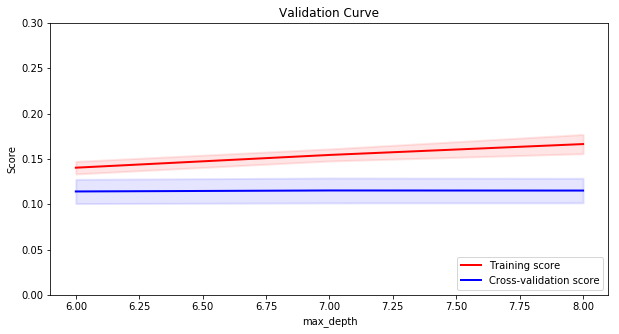

In [218]:
plot_grid_search_validation_curve(grid_search, "max_depth", ylim=(0.0,0.3))

In [220]:
#increasing the learning rate here to redcue time

param_grid = {
              "learning_rate": [.2],
              "n_estimators": [300],
              'max_depth': [7],
              'min_child_weight': [8],
              'gamma':[i/10.0 for i in range(0,5)]
}


fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0]	validation_0-rmse:5.87266	validation_1-rmse:5.86765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:4.73609	validation_1-rmse:4.73087
[2]	validation_0-rmse:3.83666	validation_1-rmse:3.83157
[3]	validation_0-rmse:3.12875	validation_1-rmse:3.12347
[4]	validation_0-rmse:2.57566	validation_1-rmse:2.57044
[5]	validation_0-rmse:2.14866	validation_1-rmse:2.14378
[6]	validation_0-rmse:1.82404	validation_1-rmse:1.81946
[7]	validation_0-rmse:1.58193	validation_1-rmse:1.5779
[8]	validation_0-rmse:1.40518	validation_1-rmse:1.40197
[9]	validation_0-rmse:1.27989	validation_1-rmse:1.27746
[10]	validation_0-rmse:1.19295	validation_1-rmse:1.19122
[11]	validation_0-rmse:1.1339	validation_1-rmse:1.13294
[12]	validation_0-rmse:1.09431	validation_1-rmse:1.09423
[13]	validation_0-rmse:1.06803	validation_1-rmse:1.06

[30]	validation_0-rmse:1.01421	validation_1-rmse:1.02143
[31]	validation_0-rmse:1.01378	validation_1-rmse:1.0214
[32]	validation_0-rmse:1.01358	validation_1-rmse:1.0214
[33]	validation_0-rmse:1.01324	validation_1-rmse:1.02138
[34]	validation_0-rmse:1.0128	validation_1-rmse:1.02122
[35]	validation_0-rmse:1.01242	validation_1-rmse:1.02119
[36]	validation_0-rmse:1.01229	validation_1-rmse:1.02114
[37]	validation_0-rmse:1.01203	validation_1-rmse:1.02103
[38]	validation_0-rmse:1.01191	validation_1-rmse:1.02104
[39]	validation_0-rmse:1.01161	validation_1-rmse:1.02103
[40]	validation_0-rmse:1.01157	validation_1-rmse:1.02106
[41]	validation_0-rmse:1.01141	validation_1-rmse:1.02112
[42]	validation_0-rmse:1.01122	validation_1-rmse:1.02112
Stopping. Best iteration:
[37]	validation_0-rmse:1.01203	validation_1-rmse:1.02103

[0]	validation_0-rmse:5.87266	validation_1-rmse:5.86765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_

[23]	validation_0-rmse:1.01827	validation_1-rmse:1.02354
[24]	validation_0-rmse:1.01739	validation_1-rmse:1.02312
[25]	validation_0-rmse:1.01667	validation_1-rmse:1.02268
[26]	validation_0-rmse:1.01618	validation_1-rmse:1.02246
[27]	validation_0-rmse:1.01548	validation_1-rmse:1.0221
[28]	validation_0-rmse:1.01483	validation_1-rmse:1.02179
[29]	validation_0-rmse:1.01447	validation_1-rmse:1.02163
[30]	validation_0-rmse:1.01421	validation_1-rmse:1.02143
[31]	validation_0-rmse:1.01378	validation_1-rmse:1.02141
[32]	validation_0-rmse:1.01359	validation_1-rmse:1.02141
[33]	validation_0-rmse:1.01325	validation_1-rmse:1.02139
[34]	validation_0-rmse:1.01281	validation_1-rmse:1.02123
[35]	validation_0-rmse:1.01243	validation_1-rmse:1.02122
[36]	validation_0-rmse:1.01229	validation_1-rmse:1.02117
[37]	validation_0-rmse:1.01204	validation_1-rmse:1.02106
[38]	validation_0-rmse:1.01191	validation_1-rmse:1.02107
[39]	validation_0-rmse:1.01162	validation_1-rmse:1.02107
[40]	validation_0-rmse:1.01158	v

[15]	validation_0-rmse:1.04719	validation_1-rmse:1.0487
[16]	validation_0-rmse:1.03845	validation_1-rmse:1.04049
[17]	validation_0-rmse:1.03217	validation_1-rmse:1.03464
[18]	validation_0-rmse:1.02788	validation_1-rmse:1.03093
[19]	validation_0-rmse:1.02474	validation_1-rmse:1.02828
[20]	validation_0-rmse:1.02249	validation_1-rmse:1.02658
[21]	validation_0-rmse:1.02072	validation_1-rmse:1.0252
[22]	validation_0-rmse:1.01958	validation_1-rmse:1.02431
[23]	validation_0-rmse:1.01859	validation_1-rmse:1.02377
[24]	validation_0-rmse:1.01772	validation_1-rmse:1.02317
[25]	validation_0-rmse:1.0171	validation_1-rmse:1.02297
[26]	validation_0-rmse:1.01623	validation_1-rmse:1.02245
[27]	validation_0-rmse:1.0157	validation_1-rmse:1.02209
[28]	validation_0-rmse:1.01542	validation_1-rmse:1.02205
[29]	validation_0-rmse:1.01485	validation_1-rmse:1.02162
[30]	validation_0-rmse:1.01462	validation_1-rmse:1.02154
[31]	validation_0-rmse:1.01402	validation_1-rmse:1.02116
[32]	validation_0-rmse:1.01377	vali

[46]	validation_0-rmse:1.01007	validation_1-rmse:1.02043
[47]	validation_0-rmse:1.00981	validation_1-rmse:1.0204
Stopping. Best iteration:
[42]	validation_0-rmse:1.01068	validation_1-rmse:1.02039

[0]	validation_0-rmse:5.88205	validation_1-rmse:5.87663
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:4.75279	validation_1-rmse:4.74723
[2]	validation_0-rmse:3.85885	validation_1-rmse:3.85295
[3]	validation_0-rmse:3.15442	validation_1-rmse:3.14852
[4]	validation_0-rmse:2.60428	validation_1-rmse:2.59862
[5]	validation_0-rmse:2.1785	validation_1-rmse:2.17302
[6]	validation_0-rmse:1.85413	validation_1-rmse:1.84911
[7]	validation_0-rmse:1.61118	validation_1-rmse:1.60657
[8]	validation_0-rmse:1.43221	validation_1-rmse:1.4283
[9]	validation_0-rmse:1.30393	validation_1-rmse:1.30081
[10]	validation_0-rmse:1.21418	validation_1-rmse:1.21189
[11]	validation_0-rmse:1.15175

[33]	validation_0-rmse:1.01337	validation_1-rmse:1.0209
[34]	validation_0-rmse:1.01328	validation_1-rmse:1.02087
[35]	validation_0-rmse:1.01277	validation_1-rmse:1.02062
[36]	validation_0-rmse:1.01244	validation_1-rmse:1.02063
[37]	validation_0-rmse:1.01214	validation_1-rmse:1.02068
[38]	validation_0-rmse:1.01193	validation_1-rmse:1.02058
[39]	validation_0-rmse:1.01177	validation_1-rmse:1.0206
[40]	validation_0-rmse:1.01121	validation_1-rmse:1.02037
[41]	validation_0-rmse:1.01111	validation_1-rmse:1.02038
[42]	validation_0-rmse:1.01086	validation_1-rmse:1.02031
[43]	validation_0-rmse:1.0104	validation_1-rmse:1.02031
[44]	validation_0-rmse:1.0102	validation_1-rmse:1.02035
[45]	validation_0-rmse:1.00999	validation_1-rmse:1.0203
[46]	validation_0-rmse:1.00971	validation_1-rmse:1.02029
[47]	validation_0-rmse:1.00947	validation_1-rmse:1.02031
[48]	validation_0-rmse:1.00936	validation_1-rmse:1.02034
[49]	validation_0-rmse:1.00907	validation_1-rmse:1.02025
[50]	validation_0-rmse:1.00895	valid

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.9min finished


[0]	validation_0-rmse:5.87651	validation_1-rmse:5.8712
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:4.74302	validation_1-rmse:4.73742
[2]	validation_0-rmse:3.84574	validation_1-rmse:3.84024
[3]	validation_0-rmse:3.13922	validation_1-rmse:3.1339
[4]	validation_0-rmse:2.58729	validation_1-rmse:2.58213
[5]	validation_0-rmse:2.16076	validation_1-rmse:2.15579
[6]	validation_0-rmse:1.83603	validation_1-rmse:1.83138
[7]	validation_0-rmse:1.59358	validation_1-rmse:1.58941
[8]	validation_0-rmse:1.41613	validation_1-rmse:1.41256
[9]	validation_0-rmse:1.2895	validation_1-rmse:1.28682
[10]	validation_0-rmse:1.20117	validation_1-rmse:1.19931
[11]	validation_0-rmse:1.14077	validation_1-rmse:1.13974
[12]	validation_0-rmse:1.09952	validation_1-rmse:1.09939
[13]	validation_0-rmse:1.07231	validation_1-rmse:1.07289
[14]	validation_0-rmse:1.05396	validation_1-rmse:1.05522


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 5, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2], 'n_estimators': [300], 'max_depth': [7], 'min_child_weight': [8], 'gamma': [0.

In [221]:
grid_search.best_params_

{'gamma': 0.4,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 300}

In [225]:
param_grid = {
              "learning_rate": [.3],
              "n_estimators": [300],
              'max_depth': [7],
              'min_child_weight': [8],
              'gamma':[0.4],
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(6,10)]
}


fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True,
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[0]	validation_0-rmse:5.16413	validation_1-rmse:5.15872
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.68986	validation_1-rmse:3.68424
[2]	validation_0-rmse:2.6825	validation_1-rmse:2.67701
[3]	validation_0-rmse:2.01584	validation_1-rmse:2.01066
[4]	validation_0-rmse:1.58887	validation_1-rmse:1.58449
[5]	validation_0-rmse:1.33092	validation_1-rmse:1.32725
[6]	validation_0-rmse:1.18449	validation_1-rmse:1.18186
[7]	validation_0-rmse:1.10699	validation_1-rmse:1.10529
[8]	validation_0-rmse:1.06559	validation_1-rmse:1.0652
[9]	validation_0-rmse:1.04383	validation_1-rmse:1.04415
[10]	validation_0-rmse:1.0327	validation_1-rmse:1.03343
[11]	validation_0-rmse:1.0274	validation_1-rmse:1.02871
[12]	validation_0-rmse:1.02455	validation_1-rmse:1.02634
[13]	validation_0-rmse:1.02293	validation_1-rmse:1.025

[23]	validation_0-rmse:1.01675	validation_1-rmse:1.02426
[24]	validation_0-rmse:1.01599	validation_1-rmse:1.02388
[25]	validation_0-rmse:1.0157	validation_1-rmse:1.02385
[26]	validation_0-rmse:1.01552	validation_1-rmse:1.02377
[27]	validation_0-rmse:1.01526	validation_1-rmse:1.02378
[28]	validation_0-rmse:1.01498	validation_1-rmse:1.02387
[29]	validation_0-rmse:1.01472	validation_1-rmse:1.02389
[30]	validation_0-rmse:1.01434	validation_1-rmse:1.02393
[31]	validation_0-rmse:1.01393	validation_1-rmse:1.02383
Stopping. Best iteration:
[26]	validation_0-rmse:1.01552	validation_1-rmse:1.02377

[0]	validation_0-rmse:5.16582	validation_1-rmse:5.16055
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69313	validation_1-rmse:3.68749
[2]	validation_0-rmse:2.6903	validation_1-rmse:2.68456
[3]	validation_0-rmse:2.02339	validation_1-rmse:2.01779
[4]	validation_0-rmse:1

[7]	validation_0-rmse:1.11187	validation_1-rmse:1.10964
[8]	validation_0-rmse:1.06902	validation_1-rmse:1.06777
[9]	validation_0-rmse:1.04638	validation_1-rmse:1.04596
[10]	validation_0-rmse:1.03449	validation_1-rmse:1.035
[11]	validation_0-rmse:1.02858	validation_1-rmse:1.02956
[12]	validation_0-rmse:1.02523	validation_1-rmse:1.02666
[13]	validation_0-rmse:1.02333	validation_1-rmse:1.02513
[14]	validation_0-rmse:1.02208	validation_1-rmse:1.02433
[15]	validation_0-rmse:1.02134	validation_1-rmse:1.02407
[16]	validation_0-rmse:1.02006	validation_1-rmse:1.02327
[17]	validation_0-rmse:1.01951	validation_1-rmse:1.02298
[18]	validation_0-rmse:1.01884	validation_1-rmse:1.02282
[19]	validation_0-rmse:1.01842	validation_1-rmse:1.0227
[20]	validation_0-rmse:1.01781	validation_1-rmse:1.02242
[21]	validation_0-rmse:1.01757	validation_1-rmse:1.02227
[22]	validation_0-rmse:1.01711	validation_1-rmse:1.02218
[23]	validation_0-rmse:1.01668	validation_1-rmse:1.02204
[24]	validation_0-rmse:1.01644	valida

[31]	validation_0-rmse:1.01327	validation_1-rmse:1.02245
[32]	validation_0-rmse:1.01304	validation_1-rmse:1.02253
[33]	validation_0-rmse:1.0119	validation_1-rmse:1.02202
[34]	validation_0-rmse:1.01181	validation_1-rmse:1.02203
[35]	validation_0-rmse:1.01144	validation_1-rmse:1.02198
[36]	validation_0-rmse:1.01118	validation_1-rmse:1.02207
[37]	validation_0-rmse:1.01085	validation_1-rmse:1.02182
[38]	validation_0-rmse:1.01073	validation_1-rmse:1.02181
[39]	validation_0-rmse:1.01033	validation_1-rmse:1.02182
[40]	validation_0-rmse:1.01019	validation_1-rmse:1.02181
[41]	validation_0-rmse:1.01003	validation_1-rmse:1.02181
[42]	validation_0-rmse:1.00972	validation_1-rmse:1.02188
[43]	validation_0-rmse:1.00917	validation_1-rmse:1.02194
[44]	validation_0-rmse:1.00899	validation_1-rmse:1.0221
[45]	validation_0-rmse:1.00889	validation_1-rmse:1.02219
Stopping. Best iteration:
[40]	validation_0-rmse:1.01019	validation_1-rmse:1.02181

[0]	validation_0-rmse:5.17514	validation_1-rmse:5.16964
Multipl

[3]	validation_0-rmse:2.04472	validation_1-rmse:2.03888
[4]	validation_0-rmse:1.61595	validation_1-rmse:1.61079
[5]	validation_0-rmse:1.35542	validation_1-rmse:1.35103
[6]	validation_0-rmse:1.20472	validation_1-rmse:1.20149
[7]	validation_0-rmse:1.12194	validation_1-rmse:1.11996
[8]	validation_0-rmse:1.07721	validation_1-rmse:1.07618
[9]	validation_0-rmse:1.0521	validation_1-rmse:1.05245
[10]	validation_0-rmse:1.03894	validation_1-rmse:1.03988
[11]	validation_0-rmse:1.03154	validation_1-rmse:1.03327
[12]	validation_0-rmse:1.02739	validation_1-rmse:1.02978
[13]	validation_0-rmse:1.02512	validation_1-rmse:1.02801
[14]	validation_0-rmse:1.02316	validation_1-rmse:1.02657
[15]	validation_0-rmse:1.02182	validation_1-rmse:1.02575
[16]	validation_0-rmse:1.02104	validation_1-rmse:1.02527
[17]	validation_0-rmse:1.02025	validation_1-rmse:1.02478
[18]	validation_0-rmse:1.0196	validation_1-rmse:1.02457
[19]	validation_0-rmse:1.01889	validation_1-rmse:1.02425
[20]	validation_0-rmse:1.01825	validatio

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.68582	validation_1-rmse:3.68048
[2]	validation_0-rmse:2.67939	validation_1-rmse:2.67372
[3]	validation_0-rmse:2.01165	validation_1-rmse:2.00601
[4]	validation_0-rmse:1.58535	validation_1-rmse:1.58057
[5]	validation_0-rmse:1.32736	validation_1-rmse:1.32352
[6]	validation_0-rmse:1.18142	validation_1-rmse:1.17851
[7]	validation_0-rmse:1.10321	validation_1-rmse:1.10135
[8]	validation_0-rmse:1.06255	validation_1-rmse:1.06199
[9]	validation_0-rmse:1.04105	validation_1-rmse:1.04138
[10]	validation_0-rmse:1.03063	validation_1-rmse:1.03172
[11]	validation_0-rmse:1.02534	validation_1-rmse:1.02714
[12]	validation_0-rmse:1.02253	validation_1-rmse:1.02509
[13]	validation_0-rmse:1.02101	validation_1-rmse:1.02409
[14]	validation_0-rmse:1.02003	validation_1-rmse:1.02342
[15]	validation_0-rmse:1.01942	validation_1-rmse:1.02325
[16]	validation_0-rmse:1.01843	validation_1-rmse:1.02287
[17]	validation_0-rmse:1.01791	va

[34]	validation_0-rmse:1.01107	validation_1-rmse:1.02293
[35]	validation_0-rmse:1.01083	validation_1-rmse:1.0229
[36]	validation_0-rmse:1.01076	validation_1-rmse:1.02291
Stopping. Best iteration:
[31]	validation_0-rmse:1.0119	validation_1-rmse:1.02283

[0]	validation_0-rmse:5.16562	validation_1-rmse:5.16029
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69093	validation_1-rmse:3.6856
[2]	validation_0-rmse:2.68746	validation_1-rmse:2.68197
[3]	validation_0-rmse:2.01993	validation_1-rmse:2.01495
[4]	validation_0-rmse:1.59366	validation_1-rmse:1.58931
[5]	validation_0-rmse:1.33535	validation_1-rmse:1.33168
[6]	validation_0-rmse:1.18791	validation_1-rmse:1.18524
[7]	validation_0-rmse:1.10862	validation_1-rmse:1.10688
[8]	validation_0-rmse:1.06627	validation_1-rmse:1.06551
[9]	validation_0-rmse:1.04361	validation_1-rmse:1.04408
[10]	validation_0-rmse:1.03231

[21]	validation_0-rmse:1.01795	validation_1-rmse:1.02367
[22]	validation_0-rmse:1.0172	validation_1-rmse:1.02344
[23]	validation_0-rmse:1.01689	validation_1-rmse:1.02347
[24]	validation_0-rmse:1.01674	validation_1-rmse:1.02337
[25]	validation_0-rmse:1.01659	validation_1-rmse:1.02345
[26]	validation_0-rmse:1.01633	validation_1-rmse:1.02331
[27]	validation_0-rmse:1.01608	validation_1-rmse:1.02348
[28]	validation_0-rmse:1.01599	validation_1-rmse:1.02355
[29]	validation_0-rmse:1.01557	validation_1-rmse:1.02336
[30]	validation_0-rmse:1.0154	validation_1-rmse:1.0234
[31]	validation_0-rmse:1.01527	validation_1-rmse:1.02334
Stopping. Best iteration:
[26]	validation_0-rmse:1.01633	validation_1-rmse:1.02331

[0]	validation_0-rmse:5.17509	validation_1-rmse:5.16962
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.70902	validation_1-rmse:3.70323
[2]	validation_0-rmse:

[26]	validation_0-rmse:1.01552	validation_1-rmse:1.02255
[27]	validation_0-rmse:1.01552	validation_1-rmse:1.02253
[28]	validation_0-rmse:1.01522	validation_1-rmse:1.02257
[29]	validation_0-rmse:1.01484	validation_1-rmse:1.02241
Stopping. Best iteration:
[24]	validation_0-rmse:1.01626	validation_1-rmse:1.0224

[0]	validation_0-rmse:5.1633	validation_1-rmse:5.15799
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.68593	validation_1-rmse:3.68047
[2]	validation_0-rmse:2.67927	validation_1-rmse:2.67347
[3]	validation_0-rmse:2.01146	validation_1-rmse:2.00599
[4]	validation_0-rmse:1.58605	validation_1-rmse:1.58128
[5]	validation_0-rmse:1.328	validation_1-rmse:1.32424
[6]	validation_0-rmse:1.18198	validation_1-rmse:1.17917
[7]	validation_0-rmse:1.10412	validation_1-rmse:1.10233
[8]	validation_0-rmse:1.0636	validation_1-rmse:1.0629
[9]	validation_0-rmse:1.04211	va

[27]	validation_0-rmse:1.01331	validation_1-rmse:1.02235
Stopping. Best iteration:
[22]	validation_0-rmse:1.0149	validation_1-rmse:1.02199

[0]	validation_0-rmse:5.16571	validation_1-rmse:5.1604
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69105	validation_1-rmse:3.68562
[2]	validation_0-rmse:2.6872	validation_1-rmse:2.68138
[3]	validation_0-rmse:2.01981	validation_1-rmse:2.01428
[4]	validation_0-rmse:1.594	validation_1-rmse:1.58911
[5]	validation_0-rmse:1.33542	validation_1-rmse:1.33115
[6]	validation_0-rmse:1.18803	validation_1-rmse:1.18478
[7]	validation_0-rmse:1.10872	validation_1-rmse:1.10655
[8]	validation_0-rmse:1.06691	validation_1-rmse:1.066
[9]	validation_0-rmse:1.04449	validation_1-rmse:1.04472
[10]	validation_0-rmse:1.03273	validation_1-rmse:1.03397
[11]	validation_0-rmse:1.02675	validation_1-rmse:1.02874
[12]	validation_0-rmse:1.02322	val

[5]	validation_0-rmse:1.35369	validation_1-rmse:1.34995
[6]	validation_0-rmse:1.20309	validation_1-rmse:1.20031
[7]	validation_0-rmse:1.1202	validation_1-rmse:1.11835
[8]	validation_0-rmse:1.07524	validation_1-rmse:1.07425
[9]	validation_0-rmse:1.05065	validation_1-rmse:1.0509
[10]	validation_0-rmse:1.03762	validation_1-rmse:1.03852
[11]	validation_0-rmse:1.03054	validation_1-rmse:1.03246
[12]	validation_0-rmse:1.02649	validation_1-rmse:1.02897
[13]	validation_0-rmse:1.02405	validation_1-rmse:1.0268
[14]	validation_0-rmse:1.02211	validation_1-rmse:1.02557
[15]	validation_0-rmse:1.02056	validation_1-rmse:1.02472
[16]	validation_0-rmse:1.01973	validation_1-rmse:1.02429
[17]	validation_0-rmse:1.01916	validation_1-rmse:1.02399
[18]	validation_0-rmse:1.01853	validation_1-rmse:1.02413
[19]	validation_0-rmse:1.01776	validation_1-rmse:1.02367
[20]	validation_0-rmse:1.01736	validation_1-rmse:1.02364
[21]	validation_0-rmse:1.01669	validation_1-rmse:1.02356
[22]	validation_0-rmse:1.01619	validati

[7]	validation_0-rmse:1.10239	validation_1-rmse:1.10123
[8]	validation_0-rmse:1.06149	validation_1-rmse:1.06155
[9]	validation_0-rmse:1.04052	validation_1-rmse:1.04158
[10]	validation_0-rmse:1.03009	validation_1-rmse:1.03222
[11]	validation_0-rmse:1.02452	validation_1-rmse:1.02757
[12]	validation_0-rmse:1.02182	validation_1-rmse:1.02532
[13]	validation_0-rmse:1.02015	validation_1-rmse:1.02429
[14]	validation_0-rmse:1.01904	validation_1-rmse:1.0239
[15]	validation_0-rmse:1.01827	validation_1-rmse:1.02339
[16]	validation_0-rmse:1.01744	validation_1-rmse:1.02316
[17]	validation_0-rmse:1.01712	validation_1-rmse:1.0231
[18]	validation_0-rmse:1.01671	validation_1-rmse:1.02301
[19]	validation_0-rmse:1.01608	validation_1-rmse:1.02279
[20]	validation_0-rmse:1.01566	validation_1-rmse:1.02266
[21]	validation_0-rmse:1.015	validation_1-rmse:1.0226
[22]	validation_0-rmse:1.0145	validation_1-rmse:1.0224
[23]	validation_0-rmse:1.01411	validation_1-rmse:1.02257
[24]	validation_0-rmse:1.01367	validation

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69039	validation_1-rmse:3.68527
[2]	validation_0-rmse:2.68683	validation_1-rmse:2.68155
[3]	validation_0-rmse:2.01907	validation_1-rmse:2.01427
[4]	validation_0-rmse:1.59239	validation_1-rmse:1.58845
[5]	validation_0-rmse:1.33461	validation_1-rmse:1.33188
[6]	validation_0-rmse:1.18737	validation_1-rmse:1.18581
[7]	validation_0-rmse:1.10787	validation_1-rmse:1.10759
[8]	validation_0-rmse:1.06603	validation_1-rmse:1.06672
[9]	validation_0-rmse:1.04391	validation_1-rmse:1.04548
[10]	validation_0-rmse:1.03275	validation_1-rmse:1.03522
[11]	validation_0-rmse:1.02668	validation_1-rmse:1.03014
[12]	validation_0-rmse:1.02316	validation_1-rmse:1.02761
[13]	validation_0-rmse:1.02141	validation_1-rmse:1.02646
[14]	validation_0-rmse:1.02015	validation_1-rmse:1.02564
[15]	validation_0-rmse:1.01854	validation_1-rmse:1.02455
[16]	validation_0-rmse:1.01785	validation_1-rmse:1.02425
[17]	validation_0-rmse:1.01719	va

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.9min finished


[0]	validation_0-rmse:5.16833	validation_1-rmse:5.16266
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69404	validation_1-rmse:3.68827
[2]	validation_0-rmse:2.69116	validation_1-rmse:2.6855
[3]	validation_0-rmse:2.02505	validation_1-rmse:2.01941
[4]	validation_0-rmse:1.59817	validation_1-rmse:1.59335
[5]	validation_0-rmse:1.33979	validation_1-rmse:1.33574
[6]	validation_0-rmse:1.19197	validation_1-rmse:1.18905
[7]	validation_0-rmse:1.11179	validation_1-rmse:1.11001
[8]	validation_0-rmse:1.06917	validation_1-rmse:1.06849
[9]	validation_0-rmse:1.04644	validation_1-rmse:1.04698
[10]	validation_0-rmse:1.03485	validation_1-rmse:1.03617
[11]	validation_0-rmse:1.02825	validation_1-rmse:1.03038
[12]	validation_0-rmse:1.02434	validation_1-rmse:1.02714
[13]	validation_0-rmse:1.02141	validation_1-rmse:1.02482
[14]	validation_0-rmse:1.01991	validation_1-rmse:1.0238

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 5, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.3], 'n_estimators': [300], 'max_depth': [7], 'min_child_weight': [8], 'gamma': [0.

In [226]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 300,
 'subsample': 0.9}

In [227]:
grid_search.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([  9.6507767 ,   9.43762819,   9.54947941,  12.55837536,
          9.90433931,  12.89943886,  10.64027143,  13.0934662 ,
         10.26886749,  10.10917385,  11.12550203,  12.04136904,
         10.78065308,  12.57038411,  11.99438898,  16.95520091]),
 'mean_score_time': array([ 0.32334431,  0.31772868,  0.32429139,  0.41424362,  0.28795958,
         0.34810313,  0.30520225,  0.33790541,  0.25656152,  0.26700576,
         0.29926236,  0.28594375,  0.2690711 ,  0.28818027,  0.28537107,
         0.36605374]),
 'mean_test_score': array([ 0.10829171,  0.10896872,  0.11053604,  0.11253466,  0.10948066,
         0.10927146,  0.11195653,  0.11179375,  0.10863963,  0.10984927,
         0.11065031,  0.11203026,  0.10818037,  0.10931583,  0.10977869,
         0.11043631]),
 'mean_train_score': array([ 0.14680982,  0.14798222,  0.14886087,  0.15869864,  0.14553631,
         0.14944247,  0.15089583,  0.1537429 ,  0.14563519,  0.14760278,
         0.15076218,  0.14899246,  0.

In [228]:
param_grid = {
              "learning_rate": [.3],
              "n_estimators": [300],
              'max_depth': [7],
              'min_child_weight': [8],
              'gamma':[0.4],
              'subsample':[0.9],
              'colsample_bytree':[0.6],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}


fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True,
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0]	validation_0-rmse:5.16353	validation_1-rmse:5.15819
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.68803	validation_1-rmse:3.68272
[2]	validation_0-rmse:2.68121	validation_1-rmse:2.67583
[3]	validation_0-rmse:2.01387	validation_1-rmse:2.00883
[4]	validation_0-rmse:1.58752	validation_1-rmse:1.58291
[5]	validation_0-rmse:1.32967	validation_1-rmse:1.32582
[6]	validation_0-rmse:1.18341	validation_1-rmse:1.18053
[7]	validation_0-rmse:1.10571	validation_1-rmse:1.10389
[8]	validation_0-rmse:1.06468	validation_1-rmse:1.06402
[9]	validation_0-rmse:1.04278	validation_1-rmse:1.0429
[10]	validation_0-rmse:1.03176	validation_1-rmse:1.03277
[11]	validation_0-rmse:1.02651	validation_1-rmse:1.02818
[12]	validation_0-rmse:1.02354	validation_1-rmse:1.02612
[13]	validation_0-rmse:1.02202	validation_1-rmse:1.0

[47]	validation_0-rmse:1.00841	validation_1-rmse:1.02165
[48]	validation_0-rmse:1.00821	validation_1-rmse:1.02179
Stopping. Best iteration:
[43]	validation_0-rmse:1.00922	validation_1-rmse:1.02147

[0]	validation_0-rmse:5.16353	validation_1-rmse:5.15819
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.68803	validation_1-rmse:3.68272
[2]	validation_0-rmse:2.68121	validation_1-rmse:2.67584
[3]	validation_0-rmse:2.01388	validation_1-rmse:2.00883
[4]	validation_0-rmse:1.58753	validation_1-rmse:1.58291
[5]	validation_0-rmse:1.32967	validation_1-rmse:1.32582
[6]	validation_0-rmse:1.18341	validation_1-rmse:1.18053
[7]	validation_0-rmse:1.10571	validation_1-rmse:1.10389
[8]	validation_0-rmse:1.06468	validation_1-rmse:1.06402
[9]	validation_0-rmse:1.04279	validation_1-rmse:1.0429
[10]	validation_0-rmse:1.03176	validation_1-rmse:1.03277
[11]	validation_0-rmse:1.026

[21]	validation_0-rmse:1.01657	validation_1-rmse:1.02295
[22]	validation_0-rmse:1.0164	validation_1-rmse:1.02295
[23]	validation_0-rmse:1.016	validation_1-rmse:1.02287
[24]	validation_0-rmse:1.01565	validation_1-rmse:1.02254
[25]	validation_0-rmse:1.01533	validation_1-rmse:1.02253
[26]	validation_0-rmse:1.01474	validation_1-rmse:1.02236
[27]	validation_0-rmse:1.01453	validation_1-rmse:1.02231
[28]	validation_0-rmse:1.01421	validation_1-rmse:1.0224
[29]	validation_0-rmse:1.01395	validation_1-rmse:1.02242
[30]	validation_0-rmse:1.01378	validation_1-rmse:1.02238
[31]	validation_0-rmse:1.01341	validation_1-rmse:1.02216
[32]	validation_0-rmse:1.01311	validation_1-rmse:1.02225
[33]	validation_0-rmse:1.0128	validation_1-rmse:1.02236
[34]	validation_0-rmse:1.01246	validation_1-rmse:1.02236
[35]	validation_0-rmse:1.01213	validation_1-rmse:1.02229
[36]	validation_0-rmse:1.01208	validation_1-rmse:1.02228
Stopping. Best iteration:
[31]	validation_0-rmse:1.01341	validation_1-rmse:1.02216

[0]	valid

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.69276	validation_1-rmse:3.6873
[2]	validation_0-rmse:2.68939	validation_1-rmse:2.68391
[3]	validation_0-rmse:2.02229	validation_1-rmse:2.0169
[4]	validation_0-rmse:1.59589	validation_1-rmse:1.59093
[5]	validation_0-rmse:1.33815	validation_1-rmse:1.33386
[6]	validation_0-rmse:1.19055	validation_1-rmse:1.18703
[7]	validation_0-rmse:1.11142	validation_1-rmse:1.10875
[8]	validation_0-rmse:1.06911	validation_1-rmse:1.06754
[9]	validation_0-rmse:1.04633	validation_1-rmse:1.04563
[10]	validation_0-rmse:1.03446	validation_1-rmse:1.03464
[11]	validation_0-rmse:1.02851	validation_1-rmse:1.02938
[12]	validation_0-rmse:1.02508	validation_1-rmse:1.02656
[13]	validation_0-rmse:1.02317	validation_1-rmse:1.02504
[14]	validation_0-rmse:1.022	validation_1-rmse:1.02417
[15]	validation_0-rmse:1.02119	validation_1-rmse:1.0239
[

[66]	validation_0-rmse:1.01924	validation_1-rmse:1.0197
[67]	validation_0-rmse:1.01917	validation_1-rmse:1.01971
[68]	validation_0-rmse:1.01904	validation_1-rmse:1.01967
[69]	validation_0-rmse:1.01899	validation_1-rmse:1.01962
[70]	validation_0-rmse:1.01894	validation_1-rmse:1.0196
[71]	validation_0-rmse:1.01891	validation_1-rmse:1.01956
[72]	validation_0-rmse:1.01884	validation_1-rmse:1.01956
[73]	validation_0-rmse:1.01877	validation_1-rmse:1.01954
[74]	validation_0-rmse:1.01874	validation_1-rmse:1.0195
[75]	validation_0-rmse:1.01872	validation_1-rmse:1.01949
[76]	validation_0-rmse:1.01867	validation_1-rmse:1.01946
[77]	validation_0-rmse:1.01867	validation_1-rmse:1.01947
[78]	validation_0-rmse:1.01851	validation_1-rmse:1.01939
[79]	validation_0-rmse:1.0185	validation_1-rmse:1.01939
[80]	validation_0-rmse:1.01845	validation_1-rmse:1.01941
[81]	validation_0-rmse:1.01839	validation_1-rmse:1.01941
[82]	validation_0-rmse:1.01835	validation_1-rmse:1.01938
[83]	validation_0-rmse:1.01822	vali

[94]	validation_0-rmse:1.01777	validation_1-rmse:1.01862
[95]	validation_0-rmse:1.01771	validation_1-rmse:1.01865
[96]	validation_0-rmse:1.01768	validation_1-rmse:1.01864
[97]	validation_0-rmse:1.01764	validation_1-rmse:1.0186
[98]	validation_0-rmse:1.01761	validation_1-rmse:1.0186
[99]	validation_0-rmse:1.01754	validation_1-rmse:1.01857
[100]	validation_0-rmse:1.01754	validation_1-rmse:1.01858
[101]	validation_0-rmse:1.0175	validation_1-rmse:1.01853
[102]	validation_0-rmse:1.01746	validation_1-rmse:1.01851
[103]	validation_0-rmse:1.0174	validation_1-rmse:1.01847
[104]	validation_0-rmse:1.01735	validation_1-rmse:1.01842
[105]	validation_0-rmse:1.01732	validation_1-rmse:1.01841
[106]	validation_0-rmse:1.01726	validation_1-rmse:1.01843
[107]	validation_0-rmse:1.01723	validation_1-rmse:1.01842
[108]	validation_0-rmse:1.01722	validation_1-rmse:1.01841
[109]	validation_0-rmse:1.0172	validation_1-rmse:1.01842
[110]	validation_0-rmse:1.01718	validation_1-rmse:1.01842
Stopping. Best iteration:

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.7min finished


[0]	validation_0-rmse:5.16997	validation_1-rmse:5.16455
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:3.6978	validation_1-rmse:3.69244
[2]	validation_0-rmse:2.69765	validation_1-rmse:2.69255
[3]	validation_0-rmse:2.03417	validation_1-rmse:2.02885
[4]	validation_0-rmse:1.61007	validation_1-rmse:1.60501
[5]	validation_0-rmse:1.35392	validation_1-rmse:1.34913
[6]	validation_0-rmse:1.20733	validation_1-rmse:1.2028
[7]	validation_0-rmse:1.12797	validation_1-rmse:1.12385
[8]	validation_0-rmse:1.08499	validation_1-rmse:1.08142
[9]	validation_0-rmse:1.06174	validation_1-rmse:1.05855
[10]	validation_0-rmse:1.04883	validation_1-rmse:1.04603
[11]	validation_0-rmse:1.04191	validation_1-rmse:1.03939
[12]	validation_0-rmse:1.03673	validation_1-rmse:1.03452
[13]	validation_0-rmse:1.03344	validation_1-rmse:1.03149
[14]	validation_0-rmse:1.0314	validation_1-rmse:1.02958


[142]	validation_0-rmse:1.01321	validation_1-rmse:1.01678
Stopping. Best iteration:
[137]	validation_0-rmse:1.01338	validation_1-rmse:1.01677



GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 5, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.3], 'n_estimators': [300], 'max_depth': [7], 'min_child_weight': [8], 'gamma': [0.

In [229]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 300,
 'reg_alpha': 100,
 'subsample': 0.9}

In [233]:
#reducing learning rate, increasing estimators and devreasing early_stopping_rounds
param_grid = {
              "learning_rate": [.1],
              "n_estimators": [300, 400, 500, 600],
              'max_depth': [7],
              'min_child_weight': [8],
              'gamma':[0.4],
              'subsample':[0.9],
              'colsample_bytree':[0.6],
              
}


fit_params={"early_stopping_rounds":3, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True,
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[0]	validation_0-rmse:6.58766	validation_1-rmse:6.58247
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94534	validation_1-rmse:5.94006
[2]	validation_0-rmse:5.36819	validation_1-rmse:5.36287
[3]	validation_0-rmse:4.8511	validation_1-rmse:4.84593
[4]	validation_0-rmse:4.38828	validation_1-rmse:4.38302
[5]	validation_0-rmse:3.97364	validation_1-rmse:3.96834
[6]	validation_0-rmse:3.60319	validation_1-rmse:3.59792
[7]	validation_0-rmse:3.27288	validation_1-rmse:3.26755
[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.93

[50]	validation_0-rmse:1.01788	validation_1-rmse:1.02154
[51]	validation_0-rmse:1.01763	validation_1-rmse:1.02136
[52]	validation_0-rmse:1.01723	validation_1-rmse:1.02114
[53]	validation_0-rmse:1.01697	validation_1-rmse:1.02102
[54]	validation_0-rmse:1.01677	validation_1-rmse:1.02096
[55]	validation_0-rmse:1.01658	validation_1-rmse:1.02086
[56]	validation_0-rmse:1.01642	validation_1-rmse:1.02082
[57]	validation_0-rmse:1.01602	validation_1-rmse:1.02059
[58]	validation_0-rmse:1.01567	validation_1-rmse:1.02038
[59]	validation_0-rmse:1.01544	validation_1-rmse:1.02031
[60]	validation_0-rmse:1.0153	validation_1-rmse:1.02023
[61]	validation_0-rmse:1.01502	validation_1-rmse:1.02009
[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	va

[2]	validation_0-rmse:5.36819	validation_1-rmse:5.36287
[3]	validation_0-rmse:4.8511	validation_1-rmse:4.84593
[4]	validation_0-rmse:4.38828	validation_1-rmse:4.38302
[5]	validation_0-rmse:3.97364	validation_1-rmse:3.96834
[6]	validation_0-rmse:3.60319	validation_1-rmse:3.59792
[7]	validation_0-rmse:3.27288	validation_1-rmse:3.26755
[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.93599
[14]	validation_0-rmse:1.80212	validation_1-rmse:1.79753
[15]	validation_0-rmse:1.68176	validation_1-rmse:1.67745
[16]	validation_0-rmse:1.57729	validation_1-rmse:1.57328
[17]	validation_0-rmse:1.4874	validation_1-rmse:1.48362
[18]	validation_0-rmse:1.41048	validation_1-rmse:1.407
[19]	validation_0-rmse:1.34519	validation_1-

[56]	validation_0-rmse:1.01642	validation_1-rmse:1.02082
[57]	validation_0-rmse:1.01602	validation_1-rmse:1.02059
[58]	validation_0-rmse:1.01567	validation_1-rmse:1.02038
[59]	validation_0-rmse:1.01544	validation_1-rmse:1.02031
[60]	validation_0-rmse:1.0153	validation_1-rmse:1.02023
[61]	validation_0-rmse:1.01502	validation_1-rmse:1.02009
[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	validation_1-rmse:1.01986
[68]	validation_0-rmse:1.01408	validation_1-rmse:1.01979
[69]	validation_0-rmse:1.01399	validation_1-rmse:1.01978
[70]	validation_0-rmse:1.01385	validation_1-rmse:1.01979
[71]	validation_0-rmse:1.01376	validation_1-rmse:1.01979
[72]	validation_0-rmse:1.01367	validation_1-rmse:1.01977
[73]	validation_0-rmse:1.01359	va

[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.93599
[14]	validation_0-rmse:1.80212	validation_1-rmse:1.79753
[15]	validation_0-rmse:1.68176	validation_1-rmse:1.67745
[16]	validation_0-rmse:1.57729	validation_1-rmse:1.57328
[17]	validation_0-rmse:1.4874	validation_1-rmse:1.48362
[18]	validation_0-rmse:1.41048	validation_1-rmse:1.407
[19]	validation_0-rmse:1.34519	validation_1-rmse:1.34191
[20]	validation_0-rmse:1.28977	validation_1-rmse:1.28676
[21]	validation_0-rmse:1.24333	validation_1-rmse:1.2406
[22]	validation_0-rmse:1.2041	validation_1-rmse:1.20174
[23]	validation_0-rmse:1.1713	validation_1-rmse:1.1693
[24]	validation_0-rmse:1.14388	validation_1-rmse:1.14221
[25]	validation_0-rmse:1.12136	validation

[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	validation_1-rmse:1.01986
[68]	validation_0-rmse:1.01408	validation_1-rmse:1.01979
[69]	validation_0-rmse:1.01399	validation_1-rmse:1.01978
[70]	validation_0-rmse:1.01385	validation_1-rmse:1.01979
[71]	validation_0-rmse:1.01376	validation_1-rmse:1.01979
[72]	validation_0-rmse:1.01367	validation_1-rmse:1.01977
[73]	validation_0-rmse:1.01359	validation_1-rmse:1.01977
[74]	validation_0-rmse:1.01349	validation_1-rmse:1.01975
[75]	validation_0-rmse:1.0133	validation_1-rmse:1.01975
[76]	validation_0-rmse:1.01302	validation_1-rmse:1.01958
[77]	validation_0-rmse:1.01289	validation_1-rmse:1.01955
[78]	validation_0-rmse:1.01278	validation_1-rmse:1.0195
[79]	validation_0-rmse:1.0127	vali

[14]	validation_0-rmse:1.80212	validation_1-rmse:1.79753
[15]	validation_0-rmse:1.68176	validation_1-rmse:1.67745
[16]	validation_0-rmse:1.57729	validation_1-rmse:1.57328
[17]	validation_0-rmse:1.4874	validation_1-rmse:1.48362
[18]	validation_0-rmse:1.41048	validation_1-rmse:1.407
[19]	validation_0-rmse:1.34519	validation_1-rmse:1.34191
[20]	validation_0-rmse:1.28977	validation_1-rmse:1.28676
[21]	validation_0-rmse:1.24333	validation_1-rmse:1.2406
[22]	validation_0-rmse:1.2041	validation_1-rmse:1.20174
[23]	validation_0-rmse:1.1713	validation_1-rmse:1.1693
[24]	validation_0-rmse:1.14388	validation_1-rmse:1.14221
[25]	validation_0-rmse:1.12136	validation_1-rmse:1.12003
[26]	validation_0-rmse:1.10298	validation_1-rmse:1.10201
[27]	validation_0-rmse:1.08759	validation_1-rmse:1.08694
[28]	validation_0-rmse:1.07506	validation_1-rmse:1.07473
[29]	validation_0-rmse:1.0648	validation_1-rmse:1.06471
[30]	validation_0-rmse:1.05638	validation_1-rmse:1.05661
[31]	validation_0-rmse:1.04932	validati

[68]	validation_0-rmse:1.01408	validation_1-rmse:1.01979
[69]	validation_0-rmse:1.01399	validation_1-rmse:1.01978
[70]	validation_0-rmse:1.01385	validation_1-rmse:1.01979
[71]	validation_0-rmse:1.01376	validation_1-rmse:1.01979
[72]	validation_0-rmse:1.01367	validation_1-rmse:1.01977
[73]	validation_0-rmse:1.01359	validation_1-rmse:1.01977
[74]	validation_0-rmse:1.01349	validation_1-rmse:1.01975
[75]	validation_0-rmse:1.0133	validation_1-rmse:1.01975
[76]	validation_0-rmse:1.01302	validation_1-rmse:1.01958
[77]	validation_0-rmse:1.01289	validation_1-rmse:1.01955
[78]	validation_0-rmse:1.01278	validation_1-rmse:1.0195
[79]	validation_0-rmse:1.0127	validation_1-rmse:1.01953
[80]	validation_0-rmse:1.01265	validation_1-rmse:1.01952
[81]	validation_0-rmse:1.01245	validation_1-rmse:1.01944
[82]	validation_0-rmse:1.01234	validation_1-rmse:1.01939
[83]	validation_0-rmse:1.01219	validation_1-rmse:1.01925
[84]	validation_0-rmse:1.01202	validation_1-rmse:1.01916
[85]	validation_0-rmse:1.01194	val

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.8min finished


[0]	validation_0-rmse:6.58926	validation_1-rmse:6.58395
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94799	validation_1-rmse:5.94268
[2]	validation_0-rmse:5.3729	validation_1-rmse:5.36762
[3]	validation_0-rmse:4.85747	validation_1-rmse:4.8522
[4]	validation_0-rmse:4.39548	validation_1-rmse:4.39021
[5]	validation_0-rmse:3.98214	validation_1-rmse:3.9768
[6]	validation_0-rmse:3.61283	validation_1-rmse:3.60735
[7]	validation_0-rmse:3.28342	validation_1-rmse:3.27788
[8]	validation_0-rmse:2.98964	validation_1-rmse:2.98405
[9]	validation_0-rmse:2.72858	validation_1-rmse:2.72306
[10]	validation_0-rmse:2.4969	validation_1-rmse:2.49143
[11]	validation_0-rmse:2.29219	validation_1-rmse:2.28689
[12]	validation_0-rmse:2.1118	validation_1-rmse:2.1065
[13]	validation_0-rmse:1.95305	validation_1-rmse:1.94787
[14]	validation_0-rmse:1.81448	validation_1-rmse:1.80952
[15

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 3, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'n_estimators': [300, 400, 500, 600], 'max_depth': [7], 'min_child_weight': [8

In [235]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 300,
 'subsample': 0.9}

Trying again with lower trees.

In [236]:
#reducing learning rate, increasing estimators and devreasing early_stopping_rounds
param_grid = {
              "learning_rate": [.1],
              "n_estimators": [100, 200, 300],
              'max_depth': [7],
              'min_child_weight': [8],
              'gamma':[0.4],
              'subsample':[0.9],
              'colsample_bytree':[0.6],
              
}


c


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[0]	validation_0-rmse:6.58766	validation_1-rmse:6.58247
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94534	validation_1-rmse:5.94006
[2]	validation_0-rmse:5.36819	validation_1-rmse:5.36287
[3]	validation_0-rmse:4.8511	validation_1-rmse:4.84593
[4]	validation_0-rmse:4.38828	validation_1-rmse:4.38302
[5]	validation_0-rmse:3.97364	validation_1-rmse:3.96834
[6]	validation_0-rmse:3.60319	validation_1-rmse:3.59792
[7]	validation_0-rmse:3.27288	validation_1-rmse:3.26755
[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.935

[50]	validation_0-rmse:1.01788	validation_1-rmse:1.02154
[51]	validation_0-rmse:1.01763	validation_1-rmse:1.02136
[52]	validation_0-rmse:1.01723	validation_1-rmse:1.02114
[53]	validation_0-rmse:1.01697	validation_1-rmse:1.02102
[54]	validation_0-rmse:1.01677	validation_1-rmse:1.02096
[55]	validation_0-rmse:1.01658	validation_1-rmse:1.02086
[56]	validation_0-rmse:1.01642	validation_1-rmse:1.02082
[57]	validation_0-rmse:1.01602	validation_1-rmse:1.02059
[58]	validation_0-rmse:1.01567	validation_1-rmse:1.02038
[59]	validation_0-rmse:1.01544	validation_1-rmse:1.02031
[60]	validation_0-rmse:1.0153	validation_1-rmse:1.02023
[61]	validation_0-rmse:1.01502	validation_1-rmse:1.02009
[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	va

[2]	validation_0-rmse:5.36819	validation_1-rmse:5.36287
[3]	validation_0-rmse:4.8511	validation_1-rmse:4.84593
[4]	validation_0-rmse:4.38828	validation_1-rmse:4.38302
[5]	validation_0-rmse:3.97364	validation_1-rmse:3.96834
[6]	validation_0-rmse:3.60319	validation_1-rmse:3.59792
[7]	validation_0-rmse:3.27288	validation_1-rmse:3.26755
[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.93599
[14]	validation_0-rmse:1.80212	validation_1-rmse:1.79753
[15]	validation_0-rmse:1.68176	validation_1-rmse:1.67745
[16]	validation_0-rmse:1.57729	validation_1-rmse:1.57328
[17]	validation_0-rmse:1.4874	validation_1-rmse:1.48362
[18]	validation_0-rmse:1.41048	validation_1-rmse:1.407
[19]	validation_0-rmse:1.34519	validation_1-

[56]	validation_0-rmse:1.01642	validation_1-rmse:1.02082
[57]	validation_0-rmse:1.01602	validation_1-rmse:1.02059
[58]	validation_0-rmse:1.01567	validation_1-rmse:1.02038
[59]	validation_0-rmse:1.01544	validation_1-rmse:1.02031
[60]	validation_0-rmse:1.0153	validation_1-rmse:1.02023
[61]	validation_0-rmse:1.01502	validation_1-rmse:1.02009
[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	validation_1-rmse:1.01986
[68]	validation_0-rmse:1.01408	validation_1-rmse:1.01979
[69]	validation_0-rmse:1.01399	validation_1-rmse:1.01978
[70]	validation_0-rmse:1.01385	validation_1-rmse:1.01979
[71]	validation_0-rmse:1.01376	validation_1-rmse:1.01979
[72]	validation_0-rmse:1.01367	validation_1-rmse:1.01977
[73]	validation_0-rmse:1.01359	va

[8]	validation_0-rmse:2.97875	validation_1-rmse:2.97347
[9]	validation_0-rmse:2.71698	validation_1-rmse:2.71176
[10]	validation_0-rmse:2.48485	validation_1-rmse:2.4798
[11]	validation_0-rmse:2.27971	validation_1-rmse:2.27475
[12]	validation_0-rmse:2.09924	validation_1-rmse:2.09435
[13]	validation_0-rmse:1.94075	validation_1-rmse:1.93599
[14]	validation_0-rmse:1.80212	validation_1-rmse:1.79753
[15]	validation_0-rmse:1.68176	validation_1-rmse:1.67745
[16]	validation_0-rmse:1.57729	validation_1-rmse:1.57328
[17]	validation_0-rmse:1.4874	validation_1-rmse:1.48362
[18]	validation_0-rmse:1.41048	validation_1-rmse:1.407
[19]	validation_0-rmse:1.34519	validation_1-rmse:1.34191
[20]	validation_0-rmse:1.28977	validation_1-rmse:1.28676
[21]	validation_0-rmse:1.24333	validation_1-rmse:1.2406
[22]	validation_0-rmse:1.2041	validation_1-rmse:1.20174
[23]	validation_0-rmse:1.1713	validation_1-rmse:1.1693
[24]	validation_0-rmse:1.14388	validation_1-rmse:1.14221
[25]	validation_0-rmse:1.12136	validation

[62]	validation_0-rmse:1.01481	validation_1-rmse:1.02003
[63]	validation_0-rmse:1.01467	validation_1-rmse:1.02002
[64]	validation_0-rmse:1.01456	validation_1-rmse:1.01999
[65]	validation_0-rmse:1.01444	validation_1-rmse:1.01995
[66]	validation_0-rmse:1.01436	validation_1-rmse:1.0199
[67]	validation_0-rmse:1.01422	validation_1-rmse:1.01986
[68]	validation_0-rmse:1.01408	validation_1-rmse:1.01979
[69]	validation_0-rmse:1.01399	validation_1-rmse:1.01978
[70]	validation_0-rmse:1.01385	validation_1-rmse:1.01979
[71]	validation_0-rmse:1.01376	validation_1-rmse:1.01979
[72]	validation_0-rmse:1.01367	validation_1-rmse:1.01977
[73]	validation_0-rmse:1.01359	validation_1-rmse:1.01977
[74]	validation_0-rmse:1.01349	validation_1-rmse:1.01975
[75]	validation_0-rmse:1.0133	validation_1-rmse:1.01975
[76]	validation_0-rmse:1.01302	validation_1-rmse:1.01958
[77]	validation_0-rmse:1.01289	validation_1-rmse:1.01955
[78]	validation_0-rmse:1.01278	validation_1-rmse:1.0195
[79]	validation_0-rmse:1.0127	vali

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min finished


[0]	validation_0-rmse:6.58926	validation_1-rmse:6.58395
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94799	validation_1-rmse:5.94268
[2]	validation_0-rmse:5.3729	validation_1-rmse:5.36762
[3]	validation_0-rmse:4.85747	validation_1-rmse:4.8522
[4]	validation_0-rmse:4.39548	validation_1-rmse:4.39021
[5]	validation_0-rmse:3.98214	validation_1-rmse:3.9768
[6]	validation_0-rmse:3.61283	validation_1-rmse:3.60735
[7]	validation_0-rmse:3.28342	validation_1-rmse:3.27788
[8]	validation_0-rmse:2.98964	validation_1-rmse:2.98405
[9]	validation_0-rmse:2.72858	validation_1-rmse:2.72306
[10]	validation_0-rmse:2.4969	validation_1-rmse:2.49143
[11]	validation_0-rmse:2.29219	validation_1-rmse:2.28689
[12]	validation_0-rmse:2.1118	validation_1-rmse:2.1065
[13]	validation_0-rmse:1.95305	validation_1-rmse:1.94787
[14]	validation_0-rmse:1.81448	validation_1-rmse:1.80952
[15

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 3, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'n_estimators': [100, 200, 300], 'max_depth': [7], 'min_child_weight': [8], 'g

In [237]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 100,
 'subsample': 0.9}

In [239]:
#final tuning

param_grid = {
              "learning_rate": [0.1, 0.2],
              "n_estimators": [100, 200],
              'max_depth': [6, 7, 8],
              'min_child_weight': [8],
              'gamma':[0.4],
              'subsample':[0.9],
              'colsample_bytree':[0.6],
              
}

fit_params={"early_stopping_rounds":3, 
            "eval_metric" : "rmse", 
            "eval_set" : [(X_train, y_train), (X_valid, y_valid)],
            "verbose": True,
           }
grid_search = GridSearchCV(model_tuned, param_grid, verbose=1 ,fit_params=fit_params)
grid_search.fit(X_train, y_train)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[0]	validation_0-rmse:6.58767	validation_1-rmse:6.58246
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94536	validation_1-rmse:5.9401
[2]	validation_0-rmse:5.36823	validation_1-rmse:5.36284
[3]	validation_0-rmse:4.8512	validation_1-rmse:4.84588
[4]	validation_0-rmse:4.38837	validation_1-rmse:4.38298
[5]	validation_0-rmse:3.97381	validation_1-rmse:3.9683
[6]	validation_0-rmse:3.60344	validation_1-rmse:3.59797
[7]	validation_0-rmse:3.27316	validation_1-rmse:3.26757
[8]	validation_0-rmse:2.97912	validation_1-rmse:2.97357
[9]	validation_0-rmse:2.71753	validation_1-rmse:2.71209
[10]	validation_0-rmse:2.48552	validation_1-rmse:2.48029
[11]	validation_0-rmse:2.2806	validation_1-rmse:2.27543
[12]	validation_0-rmse:2.10022	validation_1-rmse:2.09504
[13]	validation_0-rmse:1.94186	validation_1-rmse:1.936

[46]	validation_0-rmse:1.02432	validation_1-rmse:1.0245
[47]	validation_0-rmse:1.02375	validation_1-rmse:1.02405
[48]	validation_0-rmse:1.02331	validation_1-rmse:1.02368
[49]	validation_0-rmse:1.02295	validation_1-rmse:1.02343
[50]	validation_0-rmse:1.02264	validation_1-rmse:1.02317
[51]	validation_0-rmse:1.02235	validation_1-rmse:1.02295
[52]	validation_0-rmse:1.02208	validation_1-rmse:1.02278
[53]	validation_0-rmse:1.02188	validation_1-rmse:1.02264
[54]	validation_0-rmse:1.02172	validation_1-rmse:1.02253
[55]	validation_0-rmse:1.0215	validation_1-rmse:1.02242
[56]	validation_0-rmse:1.02135	validation_1-rmse:1.02231
[57]	validation_0-rmse:1.02093	validation_1-rmse:1.02201
[58]	validation_0-rmse:1.02054	validation_1-rmse:1.02172
[59]	validation_0-rmse:1.02031	validation_1-rmse:1.02158
[60]	validation_0-rmse:1.0202	validation_1-rmse:1.02152
[61]	validation_0-rmse:1.0199	validation_1-rmse:1.02136
[62]	validation_0-rmse:1.01974	validation_1-rmse:1.02133
[63]	validation_0-rmse:1.01955	vali

[95]	validation_0-rmse:1.0167	validation_1-rmse:1.02033
[96]	validation_0-rmse:1.01655	validation_1-rmse:1.02032
[97]	validation_0-rmse:1.01646	validation_1-rmse:1.02027
[98]	validation_0-rmse:1.0164	validation_1-rmse:1.02026
[99]	validation_0-rmse:1.01634	validation_1-rmse:1.02027
[0]	validation_0-rmse:6.58767	validation_1-rmse:6.58246
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94536	validation_1-rmse:5.9401
[2]	validation_0-rmse:5.36823	validation_1-rmse:5.36284
[3]	validation_0-rmse:4.8512	validation_1-rmse:4.84588
[4]	validation_0-rmse:4.38837	validation_1-rmse:4.38298
[5]	validation_0-rmse:3.97381	validation_1-rmse:3.9683
[6]	validation_0-rmse:3.60344	validation_1-rmse:3.59797
[7]	validation_0-rmse:3.27316	validation_1-rmse:3.26757
[8]	validation_0-rmse:2.97912	validation_1-rmse:2.97357
[9]	validation_0-rmse:2.71753	validation_1-rmse:2.71209
[1

[42]	validation_0-rmse:1.02736	validation_1-rmse:1.02703
[43]	validation_0-rmse:1.02641	validation_1-rmse:1.02622
[44]	validation_0-rmse:1.02564	validation_1-rmse:1.02554
[45]	validation_0-rmse:1.0248	validation_1-rmse:1.02486
[46]	validation_0-rmse:1.02432	validation_1-rmse:1.0245
[47]	validation_0-rmse:1.02375	validation_1-rmse:1.02405
[48]	validation_0-rmse:1.02331	validation_1-rmse:1.02368
[49]	validation_0-rmse:1.02295	validation_1-rmse:1.02343
[50]	validation_0-rmse:1.02264	validation_1-rmse:1.02317
[51]	validation_0-rmse:1.02235	validation_1-rmse:1.02295
[52]	validation_0-rmse:1.02208	validation_1-rmse:1.02278
[53]	validation_0-rmse:1.02188	validation_1-rmse:1.02264
[54]	validation_0-rmse:1.02172	validation_1-rmse:1.02253
[55]	validation_0-rmse:1.0215	validation_1-rmse:1.02242
[56]	validation_0-rmse:1.02135	validation_1-rmse:1.02231
[57]	validation_0-rmse:1.02093	validation_1-rmse:1.02201
[58]	validation_0-rmse:1.02054	validation_1-rmse:1.02172
[59]	validation_0-rmse:1.02031	val

[91]	validation_0-rmse:1.01705	validation_1-rmse:1.02048
[92]	validation_0-rmse:1.01701	validation_1-rmse:1.02047
[93]	validation_0-rmse:1.01695	validation_1-rmse:1.02045
[94]	validation_0-rmse:1.01679	validation_1-rmse:1.02034
[95]	validation_0-rmse:1.0167	validation_1-rmse:1.02033
[96]	validation_0-rmse:1.01655	validation_1-rmse:1.02032
[97]	validation_0-rmse:1.01646	validation_1-rmse:1.02027
[98]	validation_0-rmse:1.0164	validation_1-rmse:1.02026
[99]	validation_0-rmse:1.01634	validation_1-rmse:1.02027
[100]	validation_0-rmse:1.01632	validation_1-rmse:1.02027
[101]	validation_0-rmse:1.01625	validation_1-rmse:1.02025
[102]	validation_0-rmse:1.01622	validation_1-rmse:1.02025
[103]	validation_0-rmse:1.01615	validation_1-rmse:1.02026
[104]	validation_0-rmse:1.01602	validation_1-rmse:1.02019
[105]	validation_0-rmse:1.01591	validation_1-rmse:1.02022
[106]	validation_0-rmse:1.01589	validation_1-rmse:1.02023
[107]	validation_0-rmse:1.01586	validation_1-rmse:1.02024
Stopping. Best iteration:

[32]	validation_0-rmse:1.04682	validation_1-rmse:1.04703
[33]	validation_0-rmse:1.04172	validation_1-rmse:1.0422
[34]	validation_0-rmse:1.03777	validation_1-rmse:1.03843
[35]	validation_0-rmse:1.03439	validation_1-rmse:1.0352
[36]	validation_0-rmse:1.03163	validation_1-rmse:1.03273
[37]	validation_0-rmse:1.02938	validation_1-rmse:1.03066
[38]	validation_0-rmse:1.02758	validation_1-rmse:1.02905
[39]	validation_0-rmse:1.02607	validation_1-rmse:1.02769
[40]	validation_0-rmse:1.02476	validation_1-rmse:1.02657
[41]	validation_0-rmse:1.0236	validation_1-rmse:1.02558
[42]	validation_0-rmse:1.02274	validation_1-rmse:1.02487
[43]	validation_0-rmse:1.02165	validation_1-rmse:1.02402
[44]	validation_0-rmse:1.02089	validation_1-rmse:1.02349
[45]	validation_0-rmse:1.02004	validation_1-rmse:1.02283
[46]	validation_0-rmse:1.01954	validation_1-rmse:1.02256
[47]	validation_0-rmse:1.01901	validation_1-rmse:1.0222
[48]	validation_0-rmse:1.01859	validation_1-rmse:1.0219
[49]	validation_0-rmse:1.01819	valid

[82]	validation_0-rmse:1.01273	validation_1-rmse:1.01978
[83]	validation_0-rmse:1.01261	validation_1-rmse:1.01971
[84]	validation_0-rmse:1.01254	validation_1-rmse:1.01972
[85]	validation_0-rmse:1.01248	validation_1-rmse:1.01969
[86]	validation_0-rmse:1.01233	validation_1-rmse:1.01976
[87]	validation_0-rmse:1.01219	validation_1-rmse:1.01972
[88]	validation_0-rmse:1.01204	validation_1-rmse:1.01969
[89]	validation_0-rmse:1.01194	validation_1-rmse:1.01968
[90]	validation_0-rmse:1.01185	validation_1-rmse:1.01969
[91]	validation_0-rmse:1.0118	validation_1-rmse:1.0197
[92]	validation_0-rmse:1.01172	validation_1-rmse:1.01971
Stopping. Best iteration:
[89]	validation_0-rmse:1.01194	validation_1-rmse:1.01968

[0]	validation_0-rmse:6.58766	validation_1-rmse:6.58247
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94534	validation_1-rmse:5.94006
[2]	validation_0-rmse

[39]	validation_0-rmse:1.02607	validation_1-rmse:1.02769
[40]	validation_0-rmse:1.02476	validation_1-rmse:1.02657
[41]	validation_0-rmse:1.0236	validation_1-rmse:1.02558
[42]	validation_0-rmse:1.02274	validation_1-rmse:1.02487
[43]	validation_0-rmse:1.02165	validation_1-rmse:1.02402
[44]	validation_0-rmse:1.02089	validation_1-rmse:1.02349
[45]	validation_0-rmse:1.02004	validation_1-rmse:1.02283
[46]	validation_0-rmse:1.01954	validation_1-rmse:1.02256
[47]	validation_0-rmse:1.01901	validation_1-rmse:1.0222
[48]	validation_0-rmse:1.01859	validation_1-rmse:1.0219
[49]	validation_0-rmse:1.01819	validation_1-rmse:1.02165
[50]	validation_0-rmse:1.01788	validation_1-rmse:1.02154
[51]	validation_0-rmse:1.01763	validation_1-rmse:1.02136
[52]	validation_0-rmse:1.01723	validation_1-rmse:1.02114
[53]	validation_0-rmse:1.01697	validation_1-rmse:1.02102
[54]	validation_0-rmse:1.01677	validation_1-rmse:1.02096
[55]	validation_0-rmse:1.01658	validation_1-rmse:1.02086
[56]	validation_0-rmse:1.01642	val

[89]	validation_0-rmse:1.01194	validation_1-rmse:1.01968
[90]	validation_0-rmse:1.01185	validation_1-rmse:1.01969
[91]	validation_0-rmse:1.0118	validation_1-rmse:1.0197
[92]	validation_0-rmse:1.01172	validation_1-rmse:1.01971
Stopping. Best iteration:
[89]	validation_0-rmse:1.01194	validation_1-rmse:1.01968

[0]	validation_0-rmse:6.58768	validation_1-rmse:6.58247
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94536	validation_1-rmse:5.94008
[2]	validation_0-rmse:5.36824	validation_1-rmse:5.36292
[3]	validation_0-rmse:4.85118	validation_1-rmse:4.84601
[4]	validation_0-rmse:4.38829	validation_1-rmse:4.38304
[5]	validation_0-rmse:3.97361	validation_1-rmse:3.96833
[6]	validation_0-rmse:3.60308	validation_1-rmse:3.59784
[7]	validation_0-rmse:3.27274	validation_1-rmse:3.26742
[8]	validation_0-rmse:2.97857	validation_1-rmse:2.97338
[9]	validation_0-rmse:2.7167

[58]	validation_0-rmse:1.01028	validation_1-rmse:1.01994
[59]	validation_0-rmse:1.00997	validation_1-rmse:1.01988
[60]	validation_0-rmse:1.0098	validation_1-rmse:1.01984
[61]	validation_0-rmse:1.00961	validation_1-rmse:1.01979
[62]	validation_0-rmse:1.00934	validation_1-rmse:1.01974
[63]	validation_0-rmse:1.00911	validation_1-rmse:1.0197
[64]	validation_0-rmse:1.00898	validation_1-rmse:1.01967
[65]	validation_0-rmse:1.0088	validation_1-rmse:1.01961
[66]	validation_0-rmse:1.00874	validation_1-rmse:1.0196
[67]	validation_0-rmse:1.00865	validation_1-rmse:1.01957
[68]	validation_0-rmse:1.00847	validation_1-rmse:1.01955
[69]	validation_0-rmse:1.00834	validation_1-rmse:1.0195
[70]	validation_0-rmse:1.00822	validation_1-rmse:1.01951
[71]	validation_0-rmse:1.0081	validation_1-rmse:1.01946
[72]	validation_0-rmse:1.00797	validation_1-rmse:1.01943
[73]	validation_0-rmse:1.00781	validation_1-rmse:1.0194
[74]	validation_0-rmse:1.00772	validation_1-rmse:1.01939
[75]	validation_0-rmse:1.00744	validat

[39]	validation_0-rmse:1.01982	validation_1-rmse:1.02619
[40]	validation_0-rmse:1.01858	validation_1-rmse:1.02519
[41]	validation_0-rmse:1.01749	validation_1-rmse:1.02434
[42]	validation_0-rmse:1.01664	validation_1-rmse:1.02377
[43]	validation_0-rmse:1.01555	validation_1-rmse:1.02291
[44]	validation_0-rmse:1.01487	validation_1-rmse:1.02248
[45]	validation_0-rmse:1.01419	validation_1-rmse:1.02198
[46]	validation_0-rmse:1.01369	validation_1-rmse:1.0217
[47]	validation_0-rmse:1.01306	validation_1-rmse:1.02134
[48]	validation_0-rmse:1.01269	validation_1-rmse:1.02121
[49]	validation_0-rmse:1.01226	validation_1-rmse:1.02107
[50]	validation_0-rmse:1.01184	validation_1-rmse:1.02093
[51]	validation_0-rmse:1.01156	validation_1-rmse:1.02076
[52]	validation_0-rmse:1.01113	validation_1-rmse:1.02064
[53]	validation_0-rmse:1.01085	validation_1-rmse:1.02055
[54]	validation_0-rmse:1.01063	validation_1-rmse:1.02046
[55]	validation_0-rmse:1.01031	validation_1-rmse:1.02042
[56]	validation_0-rmse:1.01013	v

[13]	validation_0-rmse:1.97092	validation_1-rmse:1.96622
[14]	validation_0-rmse:1.83221	validation_1-rmse:1.82767
[15]	validation_0-rmse:1.71112	validation_1-rmse:1.70683
[16]	validation_0-rmse:1.60567	validation_1-rmse:1.60179
[17]	validation_0-rmse:1.51481	validation_1-rmse:1.5113
[18]	validation_0-rmse:1.43692	validation_1-rmse:1.43375
[19]	validation_0-rmse:1.36959	validation_1-rmse:1.36687
[20]	validation_0-rmse:1.3125	validation_1-rmse:1.31025
[21]	validation_0-rmse:1.26419	validation_1-rmse:1.26246
[22]	validation_0-rmse:1.22352	validation_1-rmse:1.22226
[23]	validation_0-rmse:1.1895	validation_1-rmse:1.18867
[24]	validation_0-rmse:1.16021	validation_1-rmse:1.15974
[25]	validation_0-rmse:1.13624	validation_1-rmse:1.13628
[26]	validation_0-rmse:1.11601	validation_1-rmse:1.11644
[27]	validation_0-rmse:1.09938	validation_1-rmse:1.10021
[28]	validation_0-rmse:1.08558	validation_1-rmse:1.08686
[29]	validation_0-rmse:1.07409	validation_1-rmse:1.07576
[30]	validation_0-rmse:1.06454	val

[32]	validation_0-rmse:1.02044	validation_1-rmse:1.02163
[33]	validation_0-rmse:1.02004	validation_1-rmse:1.02142
[34]	validation_0-rmse:1.01986	validation_1-rmse:1.02137
[35]	validation_0-rmse:1.01954	validation_1-rmse:1.02117
[36]	validation_0-rmse:1.01944	validation_1-rmse:1.02111
[37]	validation_0-rmse:1.01918	validation_1-rmse:1.02097
[38]	validation_0-rmse:1.01898	validation_1-rmse:1.02083
[39]	validation_0-rmse:1.01875	validation_1-rmse:1.02073
[40]	validation_0-rmse:1.0184	validation_1-rmse:1.02059
[41]	validation_0-rmse:1.01806	validation_1-rmse:1.02043
[42]	validation_0-rmse:1.01795	validation_1-rmse:1.0204
[43]	validation_0-rmse:1.01782	validation_1-rmse:1.02043
[44]	validation_0-rmse:1.01763	validation_1-rmse:1.02037
[45]	validation_0-rmse:1.01725	validation_1-rmse:1.02011
[46]	validation_0-rmse:1.01713	validation_1-rmse:1.0201
[47]	validation_0-rmse:1.01698	validation_1-rmse:1.02002
[48]	validation_0-rmse:1.01679	validation_1-rmse:1.01992
[49]	validation_0-rmse:1.01659	val

[0]	validation_0-rmse:5.87554	validation_1-rmse:5.87031
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:4.74223	validation_1-rmse:4.73675
[2]	validation_0-rmse:3.84508	validation_1-rmse:3.83941
[3]	validation_0-rmse:3.13818	validation_1-rmse:3.13258
[4]	validation_0-rmse:2.58642	validation_1-rmse:2.58074
[5]	validation_0-rmse:2.16074	validation_1-rmse:2.15498
[6]	validation_0-rmse:1.83639	validation_1-rmse:1.83067
[7]	validation_0-rmse:1.59528	validation_1-rmse:1.58965
[8]	validation_0-rmse:1.41882	validation_1-rmse:1.41369
[9]	validation_0-rmse:1.29218	validation_1-rmse:1.28754
[10]	validation_0-rmse:1.20399	validation_1-rmse:1.19971
[11]	validation_0-rmse:1.14417	validation_1-rmse:1.14047
[12]	validation_0-rmse:1.10396	validation_1-rmse:1.10073
[13]	validation_0-rmse:1.07743	validation_1-rmse:1.07463
[14]	validation_0-rmse:1.05974	validation_1-rmse:1.057

[16]	validation_0-rmse:1.03381	validation_1-rmse:1.03489
[17]	validation_0-rmse:1.02882	validation_1-rmse:1.03041
[18]	validation_0-rmse:1.02561	validation_1-rmse:1.02765
[19]	validation_0-rmse:1.02319	validation_1-rmse:1.02596
[20]	validation_0-rmse:1.02177	validation_1-rmse:1.02505
[21]	validation_0-rmse:1.02079	validation_1-rmse:1.02441
[22]	validation_0-rmse:1.01975	validation_1-rmse:1.02354
[23]	validation_0-rmse:1.01908	validation_1-rmse:1.02319
[24]	validation_0-rmse:1.0181	validation_1-rmse:1.02252
[25]	validation_0-rmse:1.01767	validation_1-rmse:1.02243
[26]	validation_0-rmse:1.01736	validation_1-rmse:1.02244
[27]	validation_0-rmse:1.01696	validation_1-rmse:1.02226
[28]	validation_0-rmse:1.01659	validation_1-rmse:1.02211
[29]	validation_0-rmse:1.01629	validation_1-rmse:1.02202
[30]	validation_0-rmse:1.01599	validation_1-rmse:1.02198
[31]	validation_0-rmse:1.01569	validation_1-rmse:1.02198
[32]	validation_0-rmse:1.01531	validation_1-rmse:1.02181
[33]	validation_0-rmse:1.01459	v

[0]	validation_0-rmse:5.87413	validation_1-rmse:5.86887
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:4.73886	validation_1-rmse:4.73339
[2]	validation_0-rmse:3.83859	validation_1-rmse:3.83305
[3]	validation_0-rmse:3.1307	validation_1-rmse:3.12522
[4]	validation_0-rmse:2.57819	validation_1-rmse:2.57285
[5]	validation_0-rmse:2.15092	validation_1-rmse:2.14564
[6]	validation_0-rmse:1.82605	validation_1-rmse:1.82098
[7]	validation_0-rmse:1.58461	validation_1-rmse:1.57983
[8]	validation_0-rmse:1.4083	validation_1-rmse:1.40418
[9]	validation_0-rmse:1.28216	validation_1-rmse:1.27855
[10]	validation_0-rmse:1.19455	validation_1-rmse:1.19156
[11]	validation_0-rmse:1.13536	validation_1-rmse:1.13321
[12]	validation_0-rmse:1.09581	validation_1-rmse:1.09448
[13]	validation_0-rmse:1.0699	validation_1-rmse:1.06921
[14]	validation_0-rmse:1.05275	validation_1-rmse:1.05262


[34]	validation_0-rmse:1.01554	validation_1-rmse:1.02168
[35]	validation_0-rmse:1.01513	validation_1-rmse:1.02166
[36]	validation_0-rmse:1.01474	validation_1-rmse:1.02165
[37]	validation_0-rmse:1.01456	validation_1-rmse:1.02164
[38]	validation_0-rmse:1.01415	validation_1-rmse:1.02157
[39]	validation_0-rmse:1.01392	validation_1-rmse:1.02156
[40]	validation_0-rmse:1.01374	validation_1-rmse:1.02154
[41]	validation_0-rmse:1.01343	validation_1-rmse:1.02141
[42]	validation_0-rmse:1.01322	validation_1-rmse:1.0215
[43]	validation_0-rmse:1.01291	validation_1-rmse:1.02151
[44]	validation_0-rmse:1.01254	validation_1-rmse:1.02131
[45]	validation_0-rmse:1.01228	validation_1-rmse:1.02125
[46]	validation_0-rmse:1.01208	validation_1-rmse:1.02126
[47]	validation_0-rmse:1.01196	validation_1-rmse:1.02129
[48]	validation_0-rmse:1.01178	validation_1-rmse:1.02121
[49]	validation_0-rmse:1.01166	validation_1-rmse:1.02121
[50]	validation_0-rmse:1.01137	validation_1-rmse:1.02122
[51]	validation_0-rmse:1.01134	v

[40]	validation_0-rmse:1.00772	validation_1-rmse:1.02094
[41]	validation_0-rmse:1.00738	validation_1-rmse:1.02071
[42]	validation_0-rmse:1.00723	validation_1-rmse:1.02066
[43]	validation_0-rmse:1.00656	validation_1-rmse:1.02049
[44]	validation_0-rmse:1.00612	validation_1-rmse:1.02036
[45]	validation_0-rmse:1.00574	validation_1-rmse:1.02027
[46]	validation_0-rmse:1.00534	validation_1-rmse:1.02026
[47]	validation_0-rmse:1.00525	validation_1-rmse:1.0203
[48]	validation_0-rmse:1.00518	validation_1-rmse:1.02022
[49]	validation_0-rmse:1.00491	validation_1-rmse:1.02021
[50]	validation_0-rmse:1.00473	validation_1-rmse:1.02031
[51]	validation_0-rmse:1.00415	validation_1-rmse:1.02003
[52]	validation_0-rmse:1.00403	validation_1-rmse:1.02015
[53]	validation_0-rmse:1.00379	validation_1-rmse:1.02028
[54]	validation_0-rmse:1.00361	validation_1-rmse:1.02046
Stopping. Best iteration:
[51]	validation_0-rmse:1.00415	validation_1-rmse:1.02003

[0]	validation_0-rmse:5.87416	validation_1-rmse:5.86887
Multip

[43]	validation_0-rmse:1.00656	validation_1-rmse:1.02049
[44]	validation_0-rmse:1.00612	validation_1-rmse:1.02036
[45]	validation_0-rmse:1.00574	validation_1-rmse:1.02027
[46]	validation_0-rmse:1.00534	validation_1-rmse:1.02026
[47]	validation_0-rmse:1.00525	validation_1-rmse:1.0203
[48]	validation_0-rmse:1.00518	validation_1-rmse:1.02022
[49]	validation_0-rmse:1.00491	validation_1-rmse:1.02021
[50]	validation_0-rmse:1.00473	validation_1-rmse:1.02031
[51]	validation_0-rmse:1.00415	validation_1-rmse:1.02003
[52]	validation_0-rmse:1.00403	validation_1-rmse:1.02015
[53]	validation_0-rmse:1.00379	validation_1-rmse:1.02028
[54]	validation_0-rmse:1.00361	validation_1-rmse:1.02046
Stopping. Best iteration:
[51]	validation_0-rmse:1.00415	validation_1-rmse:1.02003



[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 12.9min finished


[0]	validation_0-rmse:6.58926	validation_1-rmse:6.58395
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94799	validation_1-rmse:5.94268
[2]	validation_0-rmse:5.3729	validation_1-rmse:5.36762
[3]	validation_0-rmse:4.85747	validation_1-rmse:4.8522
[4]	validation_0-rmse:4.39548	validation_1-rmse:4.39021
[5]	validation_0-rmse:3.98214	validation_1-rmse:3.9768
[6]	validation_0-rmse:3.61283	validation_1-rmse:3.60735
[7]	validation_0-rmse:3.28342	validation_1-rmse:3.27788
[8]	validation_0-rmse:2.98964	validation_1-rmse:2.98405
[9]	validation_0-rmse:2.72858	validation_1-rmse:2.72306
[10]	validation_0-rmse:2.4969	validation_1-rmse:2.49143
[11]	validation_0-rmse:2.29219	validation_1-rmse:2.28689
[12]	validation_0-rmse:2.1118	validation_1-rmse:2.1065
[13]	validation_0-rmse:1.95305	validation_1-rmse:1.94787
[14]	validation_0-rmse:1.81448	validation_1-rmse:1.80952
[15

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={'early_stopping_rounds': 3, 'eval_metric': 'rmse', 'eval_set': [(        channel_code  main_product_code  numberofadults  numberofchildren  \
2                  1                  1               2                 0
3                  1                  1               2              ...7.551745
Name: amount_spent_per_room_night_scaled, Length: 42678, dtype: float64)], 'verbose': True},
       iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [100, 200], 'max_depth': [6, 7, 8], 'min_child_weight': [

In [240]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 100,
 'subsample': 0.9}

In [258]:
model = XGBRegressor(
    max_depth=7,
    n_estimators=100,
    min_child_weight=8, 
    colsample_bytree=0.6, 
    subsample=0.9, 
    gamma= 0.4,
    learning_rate= 0.1,
    seed=7)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 3)

[0]	validation_0-rmse:6.58939	validation_1-rmse:6.5842
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:5.94824	validation_1-rmse:5.94314
[2]	validation_0-rmse:5.37311	validation_1-rmse:5.36798
[3]	validation_0-rmse:4.85734	validation_1-rmse:4.85221
[4]	validation_0-rmse:4.39532	validation_1-rmse:4.3903
[5]	validation_0-rmse:3.98197	validation_1-rmse:3.977
[6]	validation_0-rmse:3.61232	validation_1-rmse:3.60731
[7]	validation_0-rmse:3.28249	validation_1-rmse:3.27738
[8]	validation_0-rmse:2.98901	validation_1-rmse:2.98389
[9]	validation_0-rmse:2.72776	validation_1-rmse:2.72275
[10]	validation_0-rmse:2.49646	validation_1-rmse:2.49148
[11]	validation_0-rmse:2.2918	validation_1-rmse:2.28681
[12]	validation_0-rmse:2.11147	validation_1-rmse:2.10659
[13]	validation_0-rmse:1.95314	validation_1-rmse:1.94836
[14]	validation_0-rmse:1.81453	validation_1-rmse:1.80988
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=8, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=7, silent=True, subsample=0.9)

In [259]:
Y_test = model.predict(test.drop('reservation_id', axis =1))


submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('tuned_xgb_club_mahindra.csv', index=False)

## Stacking and Ensembling

In [22]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


Defining a validation method

In [23]:


X_train['season_holidayed_code'].fillna(X_train['season_holidayed_code'].mode()[0], inplace=True)
X_train['state_code_residence'].fillna(X_train['state_code_residence'].mode()[0], inplace=True)


X_train.isnull().sum()

channel_code                 0
main_product_code            0
numberofadults               0
numberofchildren             0
persontravellingid           0
resort_region_code           0
resort_type_code             0
room_type_booked_code        0
roomnights                   0
season_holidayed_code        0
state_code_residence         0
state_code_resort            0
total_pax                    0
member_age_buckets           0
booking_type_code            0
cluster_code                 0
reservationstatusid_code     0
no_of_days_before_checkin    0
dtype: int64

In [24]:
X_train.dtypes

channel_code                   int64
main_product_code              int64
numberofadults                 int64
numberofchildren               int64
persontravellingid             int64
resort_region_code             int64
resort_type_code               int64
room_type_booked_code          int64
roomnights                     int64
season_holidayed_code        float64
state_code_residence         float64
state_code_resort              int64
total_pax                      int64
member_age_buckets             int64
booking_type_code              int64
cluster_code                   int64
reservationstatusid_code       int64
no_of_days_before_checkin      int64
dtype: object

In [25]:

def rmse_cv(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Training a Lasso model while putting a check on outliers

In [26]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Training ElasticNet model

In [27]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


Kernel Ridge Regression



In [28]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


Gradient Boosting Regressor

In [29]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

XGB Regressor

In [30]:
{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 100,
 'subsample': 0.9}
model_xgb = XGBRegressor(colsample_bytree=0.6, gamma=0.4, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=2, n_estimators=2000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)

LightGBM

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Checking Individual score performances

In [59]:
rmse_cv(lasso).mean()

1.0529948081171869

In [31]:

print("\nLasso score: {:.4f} ({:.4f})\n".format(rmse_cv(lasso).mean(), rmse_cv(lasso).std()))
#print("LGBM score: {:.4f} ({:.4f})\n" .format(rmse_cv(model_lgb).mean(), rmse_cv(model_lgb).std()))



Lasso score: 1.0530 (0.0339)



In [32]:

print("ElasticNet score: {:.4f} ({:.4f})\n".format(rmse_cv(ENet).mean(), rmse_cv(ENet).std()))


ElasticNet score: 1.0530 (0.0339)



In [ ]:
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(rmse_cv(KRR).mean(), rmse_cv(KRR).std()))


In [33]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(rmse_cv(GBoost).mean(), rmse_cv(GBoost).std()))
    

Gradient Boosting score: 1.0229 (0.0327)



In [35]:
print("Xgboost score: {:.4f} ({:.4f})\n".format(rmse_cv(model_xgb).mean(), rmse_cv(model_xgb).std()))

### Averaging the models

In [3]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

NameError: name 'BaseEstimator' is not defined

Averaging four models

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaging all models

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, model_xgb, model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

### Using the meta-model concept

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

### Ensembling stacked models, xgb and lgb

Stacked Models

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.drop('reservation_id', axis =1).values))
print(rmsle(y_train, stacked_train_pred))
Y_test = stacked_pred

In [ ]:
submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('stacked_meta_model_club_mahindra.csv', index=False)

XGBoost

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test.drop('reservation_id', axis =1)))
print(rmsle(y_train, xgb_train_pred))
Y_test = xgb_pred

In [ ]:
submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('xgboost_club_mahindra.csv', index=False)

LightGBM

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.drop('reservation_id', axis =1).values))
print(rmsle(y_train, lgb_train_pred))
Y_test = lgb_pred

In [ ]:
submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('lgb_club_mahindra.csv', index=False)

Ensemble of these

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))
Y_test = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
submission = pd.DataFrame({
    "reservation_id": test.reservation_id, 
    "amount_spent_per_room_night_scaled": Y_test
})
submission.to_csv('ensembled_club_mahindra.csv', index=False)